In [1]:
import numpy as np
import pandas as pd
from functools import reduce
from scipy.stats import ortho_group
import copy
from itertools import product
import datetime
from ast import literal_eval
from scipy import linalg
from scipy.stats import ortho_group
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import plotly.express as px
import plotly
import datetime
np.set_printoptions(precision=8, suppress=True)
import random
from sklearn.ensemble import RandomForestRegressor
from MPS_functions import *

#import os 
#os.environ['R_HOME'] = '/gpfs/sharedfs1/admin/hpc2.0/apps/r/4.2.2/lib64/R'
#os.environ['LD_LIBRARY_PATH'] = '/gpfs/sharedfs1/admin/hpc2.0/apps/r/4.2.2/lib64/R/library' 

# module load r/4.2.2
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [177]:
NVDA = pd.read_csv('NVDA_daily_data.csv').iloc[2:, :]

In [180]:
date = NVDA['Price'].to_numpy()

In [222]:
date.shape

(1258,)

In [2]:
df = pd.read_csv('NVDA_daily_data.csv').to_numpy()[2:, 5]
df = df.astype(np.float64) 
df = np.log(df[1:]/df[:-1])
#df = df[1:]- df[:-1]
df = (df-np.mean(df))/np.std(df)

In [5]:
np.savetxt('NVDA.csv', df, delimiter=',') 

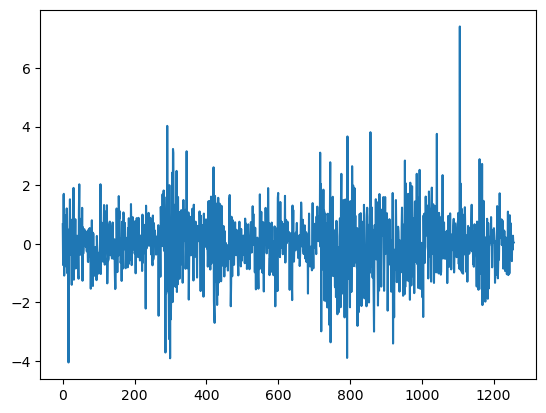

In [4]:
plt.plot(df)
plt.savefig('NVDA.png')

In [18]:
TSA = importr('TSA')
tsDyn = importr('tsDyn')
robjects.r.assign('Tr', len(df))
dfr = robjects.FloatVector(df)
robjects.r.assign('yr', dfr)
robjects.r('''
library(TSA)
library(tsDyn)
models <- c('ARIMA100', 'ARIMA101', 'ARIMA011', 'ARIMA110', 'TAR', 'STAR')
loss_matrix_R <- data.frame(matrix(ncol = length(models), nrow = 0))
colnames(loss_matrix_R) <- models

for (t in 100:(Tr-1)){
  print(t)
  ARIMA100 <- arima(yr[1:t], order = c(1,0,0), include.mean=FALSE, method='CSS')
  ARIMA100_p <- as.numeric(predict(ARIMA100, se.fit = FALSE))

  ARIMA101 <- arima(yr[1:t], order = c(1,0,1), include.mean=FALSE, method='CSS')
  ARIMA101_p <- as.numeric(predict(ARIMA101, se.fit = FALSE))

  ARIMA011 <- arima(yr[1:t], order = c(0,1,1), include.mean=FALSE, method='CSS')
  ARIMA011_p <- as.numeric(predict(ARIMA011, se.fit = FALSE))

  ARIMA110 <- arima(yr[1:t], order = c(1,1,0), include.mean=FALSE, method='CSS')
  ARIMA110_p <- as.numeric(predict(ARIMA110, se.fit = FALSE))
  
  TAR <- tar(yr[1:t], p1=1, p2=1, d=2)
  TAR_p <- predict(TAR)$fit
  
  STAR <- star(yr[1:t], m=1, d=2, steps=1, control=list(maxit=50), trace=FALSE)
  STAR_p <- as.numeric(predict(STAR))

  newrow <- data.frame(ARIMA100 = (ARIMA100_p-yr[t+1])^2,
  ARIMA101 = (ARIMA101_p-yr[t+1])^2,
  ARIMA011 = (ARIMA011_p-yr[t+1])^2,
  ARIMA110 = (ARIMA110_p-yr[t+1])^2,
  TAR = (TAR_p-yr[t+1])^2,
  STAR = (STAR_p-yr[t+1])^2
  )
  loss_matrix_R = rbind(loss_matrix_R, newrow)

}

''')
Loss_matrix_R = pandas2ri.rpy2py(robjects.r['loss_matrix_R'])

[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 139
[1] 140
[1] 141
[1] 142
[1] 143
[1] 144
[1] 145
[1] 146
[1] 147
[1] 148
[1] 149
[1] 150
[1] 151
[1] 152
[1] 153
[1] 154
[1] 155
[1] 156
[1] 157
[1] 158
[1] 159
[1] 160
[1] 161
[1] 162
[1] 163
[1] 164
[1] 165
[1] 166
[1] 167
[1] 168
[1] 169
[1] 170
[1] 171
[1] 172
[1] 173
[1] 174
[1] 175
[1] 176
[1] 177
[1] 178
[1] 179
[1] 180
[1] 181
[1] 182
[1] 183
[1] 184
[1] 185
[1] 186
[1] 187
[1] 188
[1] 189
[1] 190
[1] 191
[1] 192
[1] 193
[1] 194
[1] 195
[1] 196
[1] 197
[1] 198
[1] 199
[1] 200
[1] 201
[1] 202
[1] 203
[1] 204
[1] 205
[1] 206
[1] 207
[1] 208
[1] 209
[1] 210
[1] 211
[1] 212
[1] 213
[1] 214
[1] 215
[1] 216
[1] 217
[1] 218
[1] 219
[1] 220
[1] 221
[1] 222
[1] 223
[1] 224


R[write to console]: In addition: 
R[write to console]: There were 34 warnings (use warnings() to see them)
R[write to console]: 



In [19]:
Loss_matrix_R.to_csv('Loss_matrix_R.csv')

In [20]:
x_train, y_train = create_sequences(df.reshape((-1, 1)), 10)

In [22]:
y_train.shape

(1247,)

In [144]:
x_train, y_train = create_sequences(df.reshape((-1, 1)), 10)
file_path = 'Loss_matrix_py.csv'
column_names = ['RF', 'NN', 'LSTM', 'Transformer']
Loss_matrix = pd.DataFrame(columns=column_names)
Loss_matrix.to_csv(file_path, index=False)
for t in range(100, y_train.shape[0]):
    errors = []
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(x_train[:t, :], y_train[:t])
    errors+= [(rf_model.predict(x_train[t:t+1, :])[0]-y_train[t])**2]
    
    
    NN = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    NN.compile(optimizer='adam', loss='mean_squared_error')
    NN.fit(x_train[:t, :], y_train[:t, ], epochs=3)
    errors += [(NN.predict(x_train[[t-1], :])[0][0] - y_train[t])**2]
    
    
    LSTM_mod = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)),
        tf.keras.layers.Dense(units=1)
    ])
    LSTM_mod.compile(optimizer='adam', loss='mean_squared_error')
    LSTM_mod.fit(x_train[:t, :], y_train[:t], epochs=3)
    errors += [(LSTM_mod.predict(x_train[[t-1], :])[0][0] - y_train[t])**2]
    
    Transformer = build_decoder_only_transformer(input_shape=(10, 1), ff_dim=16)
    Transformer.compile(optimizer='adam', loss='mse', metrics=['mae'])
    Transformer.fit(x_train[:t, :], y_train[:t], epochs=3, batch_size=32)
    errors += [(forecast(Transformer, x_train[t, :], n_steps=1)[0][0][0] - y_train[t])**2]

    new_row = pd.DataFrame({ k:[v] for (k,v) in zip(column_names, errors)}, )
    new_row.to_csv(file_path, mode='a', index=False, header=False)


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 1.0479
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 1.1607
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 1.1774


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7792  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6491
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3673 - mae: 1.3319
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1400 - mae: 0.8628
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9757 - mae: 0.7517
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 1.5617
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 1.3559
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 1.2245
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6648  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8037
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6948
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8555 - mae: 1.1147
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4405 - mae: 0.9887
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9279 - mae: 0.7092
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - loss: 0.9928
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.7816
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.9543


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7993  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5795
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.6625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1789 - mae: 0.8741
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9172 - mae: 0.6977
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7566 - mae: 0.6040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 0.9690
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.9961
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 1.1212


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6896  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7159
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.8770
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9755 - mae: 1.8563
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7129 - mae: 1.0238
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9335 - mae: 0.7156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 1.1308
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 1.3072
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 1.1857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5902  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6919
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.6231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3872 - mae: 1.3086
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8788 - mae: 0.7282
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8214 - mae: 0.6776
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 1.1672
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.0254
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.9867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7687  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6701
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6718
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5505 - mae: 0.9958
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7956 - mae: 0.6947
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7907 - mae: 0.6287
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 1.0022
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 1.0041
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 1.1698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5764  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6850
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6517
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6550 - mae: 1.3396
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1680 - mae: 0.8007
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7492 - mae: 0.6528
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - loss: 1.0037
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.8184
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.9328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7989  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7660
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.3310 - mae: 0.9702
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7663 - mae: 0.6672
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6923 - mae: 0.6109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 1.0503
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.8591
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.8575


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7829  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7442
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1181 - mae: 1.1172
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1986 - mae: 0.8678
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8821 - mae: 0.6840
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.9118
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 1.0190
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.9371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8005  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6948
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2580 - mae: 0.8755
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8185 - mae: 0.7007
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6659 - mae: 0.6139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.9038
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.9787
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 1.0053


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7556  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7134
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0664 - mae: 1.1188
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8255 - mae: 0.7213
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7857 - mae: 0.6382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.7338
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.6663
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.8246


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5968  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5486
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9623 - mae: 1.1172
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5028 - mae: 1.0318
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9371 - mae: 0.7301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 1.0307
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.8921
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.8643


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6178  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6154
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1473 - mae: 1.2383
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0167 - mae: 0.7958
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8066 - mae: 0.6488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.7561
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.9992
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 0.9704


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7515  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6338
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6435 - mae: 1.3834
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7934 - mae: 0.6766
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0692 - mae: 0.7664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 1.0595
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 1.2007
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 1.2752


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6758  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7948
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7657 - mae: 1.1119
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9627 - mae: 0.7271
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9897 - mae: 0.7273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.9085
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 1.0002
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.8084


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6463  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6487
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7612
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0704 - mae: 0.8110
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0790 - mae: 0.7747
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7435 - mae: 0.6353
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.9332
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.8387
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.7662


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7240  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6989
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3707 - mae: 1.5534
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8333 - mae: 0.7107
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7875 - mae: 0.6606
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 0.9451
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 1.2955
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 1.0274


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7642  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6568
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9887 - mae: 1.1749
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7146 - mae: 0.6560
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9061 - mae: 0.7121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.9378
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.8667
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 1.0309


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5371  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6918
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9964 - mae: 0.7663
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6889 - mae: 0.6266
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6516 - mae: 0.5939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 0.8785
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.0552
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.8848


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8026  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7562
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7534
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.6703 - mae: 1.7195
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6548 - mae: 0.6076
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0967 - mae: 0.7953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.8302
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.9143
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.8774


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6444  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7239
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7543
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6007 - mae: 1.0234
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0339 - mae: 0.7954
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6587 - mae: 0.6186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 0.9438
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.9901
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 1.0126


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6834  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7441
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7833
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6345 - mae: 0.9699
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0344 - mae: 0.8175
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9308 - mae: 0.6980
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 1.1350
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.9516
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 1.1523


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6470  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7566
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4627 - mae: 1.0258
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8666 - mae: 0.6856
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9703 - mae: 0.7140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 0.9016
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.9556
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 1.1609


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8179  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6576
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3711 - mae: 1.5376
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2535 - mae: 0.8942
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7051 - mae: 0.6518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.8993
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.8943
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.7976


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7373  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4989
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0061 - mae: 1.4571
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1080 - mae: 0.8244
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6375 - mae: 0.6192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 1.0019
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.8739
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.9928


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7647  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5939
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6872
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1955 - mae: 1.2078
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8207 - mae: 0.7059
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0350 - mae: 0.8041
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.7072
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.8618
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.7064


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5616  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6302
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1649 - mae: 0.8684
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6197 - mae: 0.6166
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8601 - mae: 0.6568
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - loss: 0.9465
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - loss: 0.7474
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.7358


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5664  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7360
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7034
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3301 - mae: 0.8736
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7973 - mae: 0.7063
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6548 - mae: 0.6298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 0.9136
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.9716
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.8345
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6651  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7501
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.6019
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1338 - mae: 0.8727
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8681 - mae: 0.7139
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6245 - mae: 0.5860
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 0.8922
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 0.9131
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.8263


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6167  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5922
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0917 - mae: 0.8065
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9536 - mae: 0.7706
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7970 - mae: 0.6392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.9759
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.7858
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.9972


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5716  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6213
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1280 - mae: 1.1312
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3897 - mae: 0.9226
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6240 - mae: 0.6093
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.8021
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 0.7634
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 0.7838


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5186  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6975
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.6690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9653 - mae: 0.7418
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6482 - mae: 0.6082
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5532 - mae: 0.5659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 0.8204
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.8933
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.7875


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7205  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5397
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.6125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2277 - mae: 0.9338
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9349 - mae: 0.7413
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7222 - mae: 0.6320
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - loss: 1.1223
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 1.0986
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 1.2343


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5421  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7930
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.6517
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2884 - mae: 1.2003
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2528 - mae: 0.9007
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7874 - mae: 0.6649
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - loss: 1.0227
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 1.1562
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 1.0036


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6678  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5643
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.5935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2626 - mae: 0.8818
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3295 - mae: 0.9027
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6106 - mae: 0.5839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.8289
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.7450
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.7269


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6122  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6218
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7706 - mae: 1.4248
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9465 - mae: 0.7376
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9149 - mae: 0.7612
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 1.1873
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 0.9922
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.8844


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5254  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5935
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.5752
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6322 - mae: 0.9887
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8509 - mae: 0.7170
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7392 - mae: 0.6106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 1.0719
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 0.9730
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.7803


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6088  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6307
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.7802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1916 - mae: 0.8762
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7159 - mae: 0.6401
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7230 - mae: 0.6500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 1.0786
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 1.0603
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.9040


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6055  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5642
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6407
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2305 - mae: 1.5184
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8386 - mae: 0.7223
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7259 - mae: 0.6600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.9880
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.8623
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.8496


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5322  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6439
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1559 - mae: 1.1966
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5976 - mae: 0.5872
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6201 - mae: 0.5952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.8992
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 1.0453
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.8142


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6013
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6852
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5862 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9588 - mae: 0.7244
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6657 - mae: 0.6329
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7190 - mae: 0.6343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 1.0940
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 1.0876
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.9986


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6834  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5997
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4715 - mae: 0.9718
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8877 - mae: 0.7325
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6190 - mae: 0.6050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - loss: 0.8465
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.9897
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.0368


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6529  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5899
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.7263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9054 - mae: 0.7105
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7662 - mae: 0.6411
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6337 - mae: 0.6085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 1.2585
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.9134
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.1129


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6059  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6989
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.7397
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7817 - mae: 1.3677
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6153 - mae: 0.5935
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6581 - mae: 0.6366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - loss: 1.2631
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.3854
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.1071


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6346  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6216
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6584
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1520 - mae: 0.7906
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8081 - mae: 0.6791
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8648 - mae: 0.6690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - loss: 0.9694
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.8294
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.8758


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5755  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8225
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8364 - mae: 1.4247
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8609 - mae: 0.7134
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9772 - mae: 0.7317
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 1.0920
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.9947
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 1.3441


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5944  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7519
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5045 - mae: 1.7713
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8789 - mae: 0.7308
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7847 - mae: 0.7020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.8828
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 1.0900
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.8449


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6283  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6133
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.5778
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1178 - mae: 1.1142
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3092 - mae: 0.8746
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6283 - mae: 0.6017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 603us/step - loss: 0.9678
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 1.0500
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 1.1657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7010  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6376
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9207 - mae: 1.3787
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8395 - mae: 0.7071
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6649 - mae: 0.6179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 0.9589
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.8845
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.7938


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6478  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6639
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6466
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6645 - mae: 1.5640
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8428 - mae: 0.7276
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0096 - mae: 0.7614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.9632
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 0.8444
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.0401


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5574  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7093
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5942
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0779 - mae: 1.3787
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2060 - mae: 0.8754
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8362 - mae: 0.6720
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.9499
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 0.9693
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 1.0078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6576  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5219
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5580
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2735 - mae: 0.9024
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6189 - mae: 0.6118
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5448 - mae: 0.5633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 1.1170
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.8794
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.8695


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5834  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6629
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6194
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5587 - mae: 0.9821
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7608 - mae: 0.6671
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7001 - mae: 0.6449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.8263
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.7996
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.8403


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6333  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5635
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4807 - mae: 1.2214
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8464 - mae: 0.7198
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6538 - mae: 0.6013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.8846
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 0.7875
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 1.0265


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5879  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6535
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.5686
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2891 - mae: 0.9448
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7115 - mae: 0.6296
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7720 - mae: 0.6495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.8173
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 0.8189
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 1.0186


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7751  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7118
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0957 - mae: 0.8234
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0304 - mae: 0.7544
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7268 - mae: 0.6478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 0.8561
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 0.7358
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.7396


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7701
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6054
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.7273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4713 - mae: 0.9835
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7681 - mae: 0.6655
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8133 - mae: 0.6640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 1.0500
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.7872
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.7617


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5560  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6109
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7312
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6552 - mae: 1.0143
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8710 - mae: 0.6868
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9178 - mae: 0.7130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.9027
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.9035
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.8780


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6488  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7727
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5419
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6373 - mae: 1.3105
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0159 - mae: 0.7443
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8543 - mae: 0.6760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 1.0770
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 1.1152
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.9825


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5792  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6133
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5972
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8046 - mae: 1.1104
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9086 - mae: 0.7682
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7975 - mae: 0.6841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 1.2891
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.9411
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 0.8795
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6829  
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5573
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.6080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0744 - mae: 0.8352
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7935 - mae: 0.6946
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6661 - mae: 0.6279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 1.0457
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 1.0647
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - loss: 1.1082


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5467  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6383
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.5829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1400 - mae: 0.8300
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9363 - mae: 0.7558
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7263 - mae: 0.6615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 1.0207
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.9143
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.9246


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6705  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5879
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5742
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7921 - mae: 1.2532
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5993 - mae: 1.0626
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8823 - mae: 0.7037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 1.1445
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.9108
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.9020


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6709  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6080
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.6190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8762 - mae: 1.1082
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7810 - mae: 0.6747
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7449 - mae: 0.6503 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 0.9948
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: 0.9148
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.9105


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6301  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6180
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.6134
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0461 - mae: 1.2353
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8273 - mae: 0.6685
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7473 - mae: 0.6722
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - loss: 0.8995
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.0071
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.9308


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6037
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5587
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.6041
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1388 - mae: 0.8200
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6826 - mae: 0.6490
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7226 - mae: 0.6223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.9314
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.0682
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.8297


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6386  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5589
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6855
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1230 - mae: 1.1842
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8778 - mae: 0.7410
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7096 - mae: 0.6484
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.9284
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.0465
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.9638


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6345  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7453
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0229 - mae: 0.8054
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7540 - mae: 0.6851
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7075 - mae: 0.6160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 1.1328
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 1.0366
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 1.1176


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5703  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6882
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5795 - mae: 0.9349
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8896 - mae: 0.7584
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6583 - mae: 0.6314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 0.6956
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.7747
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.7603


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6546  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7617
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.5770
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3151 - mae: 0.8877
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8601 - mae: 0.6872
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7405 - mae: 0.6405
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.8529
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 1.0223
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.8759


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7230  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5435
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.5715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0178 - mae: 1.1699
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6956 - mae: 0.6235
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7306 - mae: 0.6705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - loss: 1.0667
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.8195
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 0.7662


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5717  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6939
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7865 - mae: 1.3532
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8005 - mae: 0.7107
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7436 - mae: 0.6609
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.9572
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.8507
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.9487


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5492  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6181
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.5648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7631 - mae: 1.1070
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7943 - mae: 0.6603
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6808 - mae: 0.6460
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 1.0834
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.9736
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.0241


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5446  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5935
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0887 - mae: 0.8239
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7082 - mae: 0.6551
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5851 - mae: 0.5896
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.8217
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.7739
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.8592


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6328  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7211
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.6001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1957 - mae: 0.9003
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6036 - mae: 0.5939
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5856 - mae: 0.5839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - loss: 1.1188
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.1141
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 1.0650


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6100  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5311
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7459 - mae: 1.0705
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9180 - mae: 0.7523 
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9228 - mae: 0.7202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - loss: 0.8934
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 1.0045
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.9824


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6004  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5602
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.6240
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6712 - mae: 1.3520
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7704 - mae: 0.6757
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8468 - mae: 0.6900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 1.0517
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.0209
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 1.0293


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5802  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6077
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1928 - mae: 1.2382
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5853 - mae: 0.5915
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8392 - mae: 0.6807
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.8218
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.8386
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.7535


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5242  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5454
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5237
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0707 - mae: 0.8270
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6181 - mae: 0.5958
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5738 - mae: 0.5798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - loss: 0.9923
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.9448
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.9839


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5964  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5461
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2137 - mae: 0.8974
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6925 - mae: 0.6506
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7177 - mae: 0.6502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.7583
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.0304
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.7324


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7385  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6903
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2123 - mae: 1.2350
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9921 - mae: 0.7887
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5606 - mae: 0.5839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 1.1541
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 1.2375
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 1.1147


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6003  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5585
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.6413
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9437 - mae: 1.0854
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0514 - mae: 0.8115
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6675 - mae: 0.6337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.9086
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.8801
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.8852


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5718  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5944
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.6157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9122 - mae: 1.1191
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0523 - mae: 0.7756
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6664 - mae: 0.6267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - loss: 1.0467
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.7703
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.8562


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6288  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5880
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5884
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9513 - mae: 1.1365
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8107 - mae: 0.6745
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6086 - mae: 0.6103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 0.7194
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.8048
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.9741


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6300
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5394
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5730
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1450 - mae: 1.2360
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6841 - mae: 0.6425
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7741 - mae: 0.6736
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 1.0354
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 1.1854
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.9173


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5816  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5723
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5212
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6667 - mae: 1.0237
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7557 - mae: 0.6477
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7251 - mae: 0.6525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 0.8490
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.8424
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.7948


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5196  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5799
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5969 - mae: 0.9377
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8832 - mae: 0.7125
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7689 - mae: 0.6409
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.7832
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.8465
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 0.8667


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5199  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6511
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5357 - mae: 1.0022
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8642 - mae: 0.6803
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8129 - mae: 0.6801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 1.1053
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.9064
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.9591


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6186  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5993
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0528 - mae: 0.8214
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6482 - mae: 0.6038
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5918 - mae: 0.6057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.8387
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.7928
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.8158


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5548  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5996
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8467 - mae: 1.1099
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8293 - mae: 0.6926
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6587 - mae: 0.6373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 0.8320
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.8753
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.7202


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6840  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5743
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0081 - mae: 0.8227
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7721 - mae: 0.6381
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5584 - mae: 0.5983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.9560
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.8387
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.1229


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5756  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5176
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7771 - mae: 1.0565
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6964 - mae: 0.6545
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7705 - mae: 0.6401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.7969
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 0.8946
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.7999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5602  
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5680
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3561 - mae: 0.9173
Epoch 2/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7074 - mae: 0.6408
Epoch 3/3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6870 - mae: 0.6161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.8194
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.7866
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.8036


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6945  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5554
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.6099
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2081 - mae: 0.8456
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7597 - mae: 0.6864
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6244 - mae: 0.6188
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.0535
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.2182
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 1.0303


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5346  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6623
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.6639
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4006 - mae: 0.9096
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6929 - mae: 0.6450
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6339 - mae: 0.6085 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.9207
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.9881
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.9556


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5406  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5653
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7649 - mae: 1.0974
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9296 - mae: 0.7463
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5774 - mae: 0.5926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 0.8630
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.9991
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.7540


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6376  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5845
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6377 - mae: 0.9626
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6192 - mae: 0.6166
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6844 - mae: 0.6352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.9711
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.8196
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.7516


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5977  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5839
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.5786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8934 - mae: 0.7564
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6509 - mae: 0.6186
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7559 - mae: 0.6440
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 1.0024
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.0148
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.9647


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7096  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5188
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.6721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4218 - mae: 1.3241
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8145 - mae: 0.7052
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6946 - mae: 0.6487
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.8300
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 0.7431
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 0.6663


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5175  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6724
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9208 - mae: 1.0706
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6858 - mae: 0.6509
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8687 - mae: 0.7374
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.8086
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.7371
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.9646


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5622  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5249
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.5753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4788 - mae: 0.9613
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7589 - mae: 0.6758
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6706 - mae: 0.6563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.0681
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.9106
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.8012


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5466  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6060
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.5351
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4324 - mae: 1.7277
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8689 - mae: 0.6865
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8950 - mae: 0.7065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 0.7578
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.7801
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.8276


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5341  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6229
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4342 - mae: 0.9543
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5651 - mae: 0.5854
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6202 - mae: 0.6096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 0.9174
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.7074
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.8153


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6127  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6315
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4059 - mae: 1.2186
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0770 - mae: 0.8232
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5786 - mae: 0.6073
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.7963
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.8810
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.8714


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5189  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5539
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.5374
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3050 - mae: 0.9058
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7884 - mae: 0.6926
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6752 - mae: 0.6246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.8336
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.7346
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.7432


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5102  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5465
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.5377
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7211 - mae: 0.6647
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7400 - mae: 0.6643
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6100 - mae: 0.6007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.8619
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.8533
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.9975


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5437  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5521
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8877 - mae: 1.3439
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6944 - mae: 0.6424
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5385 - mae: 0.5812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.7226
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.7282
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.7263


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5251  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6709
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5075
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3514 - mae: 0.9619
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8330 - mae: 0.6864
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5938 - mae: 0.5803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.7409
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.8161
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.7025


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5396  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5448
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.5179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0676 - mae: 1.1930
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6388 - mae: 0.6432
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6682 - mae: 0.6175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.7179
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.6419
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.6080


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6697  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5183
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.6026
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4541 - mae: 1.3497
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1108 - mae: 0.8421
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5982 - mae: 0.6187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 1.0428
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.1769
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 0.9869


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6369  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5154
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3576 - mae: 0.9104
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7312 - mae: 0.6425
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5409 - mae: 0.5749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - loss: 0.9011
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 1.1265
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.9118


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6420  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5219
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.5588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7529 - mae: 1.0651
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8624 - mae: 0.7092
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7155 - mae: 0.6402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 0.9917
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.8667
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.8510


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5373  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6331
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.5520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2954 - mae: 0.8740
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5323 - mae: 0.5730
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5626 - mae: 0.5842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.8042
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.8771
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.8733


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4944  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4904
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.5700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5524 - mae: 0.9723
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7234 - mae: 0.6474
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6247 - mae: 0.6293
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.7498
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 0.8719
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.8463


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5188  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5424
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3869 - mae: 0.9719
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7801 - mae: 0.6820
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7775 - mae: 0.6564
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 0.9952
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 0.8278
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.9517


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5856  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6746
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3883 - mae: 0.9539
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7984 - mae: 0.6887
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5681 - mae: 0.5873
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.6362
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.7598
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.6418


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5353  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5467
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0047 - mae: 0.7739
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6441 - mae: 0.6188
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6079 - mae: 0.6030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 0.7249
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.7946
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.6361


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6411
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7136
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9627 - mae: 0.7889
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6736 - mae: 0.6291
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5643 - mae: 0.5961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.9583
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.8831
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.8889


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5939  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5069
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7938 - mae: 1.0831
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6091 - mae: 0.6079
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5829 - mae: 0.6036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.7021
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.7899
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.7386


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5559  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5676
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3456 - mae: 1.7167
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8621 - mae: 0.7044
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6588 - mae: 0.6428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 0.7346
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.7212
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.6962


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5568  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5416
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3563 - mae: 1.2165
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8628 - mae: 0.7182
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5664 - mae: 0.5966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.8318
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.8975
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.8981


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6358  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4752
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5171
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7153 - mae: 1.0178
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5892 - mae: 0.5897
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6631 - mae: 0.5996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.7957
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.7754
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.8606


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5120  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7276
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5317
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4136 - mae: 0.9019
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7805 - mae: 0.6893
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7472 - mae: 0.6370
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - loss: 0.7495
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.7788
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.7270


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5413  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5074
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6293 - mae: 1.0461
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7209 - mae: 0.6633
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5234 - mae: 0.5590
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.7755
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.8341
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.6519


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4883  
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.4614
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.4633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6437 - mae: 1.0470
Epoch 2/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7601 - mae: 0.7127
Epoch 3/3
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6099 - mae: 0.6046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.8114
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.7854
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.7035


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4997  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6356
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4385 - mae: 0.9299
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6337 - mae: 0.6182
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5557 - mae: 0.5700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.8778
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.9804
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.8160


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5058  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5477
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.5933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3561 - mae: 0.9435
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5772 - mae: 0.5915
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6290 - mae: 0.6135
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.9014
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.9449
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 1.0321


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5401  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.5268
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8253 - mae: 1.1511
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0791 - mae: 0.8262
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6308 - mae: 0.6177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.7672
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.9332
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.8312


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5230  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5766
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0047 - mae: 0.7979
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5307 - mae: 0.5744
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5543 - mae: 0.5677
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.8936
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.9212
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.9455


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5291  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5777
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.6046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5065 - mae: 0.9947
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7067 - mae: 0.6388
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6962 - mae: 0.6045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.8688
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.9239
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.7245


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5204  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5413
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4893
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3219 - mae: 0.9174
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6534 - mae: 0.6245
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5522 - mae: 0.5763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 1.0382
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.7696
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.9907
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5260  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5306
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5860
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4362 - mae: 1.2706
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6487 - mae: 0.6208
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7533 - mae: 0.6607
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.8518
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.7669
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.8491


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5946  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6045
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.5313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0073 - mae: 0.7622
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5791 - mae: 0.5870
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5820 - mae: 0.5868
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 0.9319
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.7969
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.9029


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5764  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5815
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4830
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3442 - mae: 0.9407
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8180 - mae: 0.6909
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6513 - mae: 0.5895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.8404
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.7476
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.7742


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6878  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5862
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0039 - mae: 0.8121
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7549 - mae: 0.6668
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5524 - mae: 0.5708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.8055
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.9889
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.9614


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5599  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5564
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.5108
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6168 - mae: 0.9843
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8509 - mae: 0.6835
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5984 - mae: 0.5877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.8558
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.9536
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.9058


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4964  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5269
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3498 - mae: 0.8750
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6219 - mae: 0.6233
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5982 - mae: 0.6057
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.7519
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 0.7884
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.7244


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5774  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5657
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5717
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5783 - mae: 0.9733
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6289 - mae: 0.6101
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6585 - mae: 0.6088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.7255
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.8350
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 0.6804


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6848  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5383
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9969 - mae: 0.7986
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6598 - mae: 0.6473
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7884 - mae: 0.6628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.7948
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.8892
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.7630


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5786  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6615
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.5972
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2236 - mae: 0.8922
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5930 - mae: 0.5842 
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5812 - mae: 0.5916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.8164
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.8988
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.7445


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5813  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.5276
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1374 - mae: 0.8258
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6526 - mae: 0.6167
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6580 - mae: 0.6062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.7915
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.7991
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.7038


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5514  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5465
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8618 - mae: 0.7489
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5863 - mae: 0.5861
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5580 - mae: 0.5749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.7397
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.7083
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.8754


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4810  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5326
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0374 - mae: 1.1677
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5799 - mae: 0.5902
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5196 - mae: 0.5625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step - loss: 0.8668
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.7596
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 0.7506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5711  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6254
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5904
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9433 - mae: 0.7574
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6077 - mae: 0.6081
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5451 - mae: 0.5726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 0.9320
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.9051
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0069


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5589  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6072
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.4994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8027 - mae: 0.7075
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5918 - mae: 0.5880
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5642 - mae: 0.5771
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.6247
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.6931
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 0.7181


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4971  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4595
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2785 - mae: 1.2373
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6470 - mae: 0.6346
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6284 - mae: 0.6033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 0.8336
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.7148
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.7847


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4593  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6240
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5818
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9197 - mae: 0.7460
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7158 - mae: 0.6259
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5334 - mae: 0.5767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.6783
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.8110
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.6649


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4643  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6098
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5253 - mae: 0.9967
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7019 - mae: 0.6404
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6077 - mae: 0.5683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.7942
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.7660
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 0.7737


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5455  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5014
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6567
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3596 - mae: 1.7013
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6675 - mae: 0.6433
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5753 - mae: 0.5656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.8264
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.7946
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 0.8409


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5694  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6114
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3245 - mae: 0.9187
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6009 - mae: 0.6194
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5645 - mae: 0.5791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 0.9854
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.9284
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.8734


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5669  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4404
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6868 - mae: 1.0298
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6136 - mae: 0.6152
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6694 - mae: 0.6221
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 0.9223
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.6958
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.9070


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4994  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5451
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1305 - mae: 0.8271
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6375 - mae: 0.6038
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5288 - mae: 0.5505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.7022
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.6325
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.6122


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6372  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4874
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4456 - mae: 0.9744
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6166 - mae: 0.6164
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5701 - mae: 0.5837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 0.8019
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.7136
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.8930


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5603  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5383
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4983 - mae: 0.9640
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5061 - mae: 0.5597
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5478 - mae: 0.5754 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.7571
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.6832
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 0.6527


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6257  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4876
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5375 - mae: 1.0009
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6975 - mae: 0.6445
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6176 - mae: 0.6152
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.6892
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.5860
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.5477


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4628  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4627
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8971 - mae: 0.7218
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5635 - mae: 0.5882
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5542 - mae: 0.5751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 0.7022
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.7076
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.7394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5001  
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.5027
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6063 - mae: 1.0286
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6793 - mae: 0.6032
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6417 - mae: 0.6017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 0.7982
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.8175
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.8426


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5318
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4627
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5317
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5028 - mae: 0.9957
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6477 - mae: 0.6235
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6490 - mae: 0.5861
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.6885
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.5869
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.5659


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6075  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.5619
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6002 - mae: 1.0321
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6352 - mae: 0.6224
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6077 - mae: 0.5854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.7890
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.9195
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 0.7148


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5120  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5203
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1449 - mae: 0.8236
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6462 - mae: 0.6174
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5856 - mae: 0.5657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 0.8134
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.7904
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.8409


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4819  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5446
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.6787
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1007 - mae: 0.7948
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5418 - mae: 0.5622
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5513 - mae: 0.5625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 0.7089
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.6839
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.6791


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5016  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5634
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9605 - mae: 0.7790
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6226 - mae: 0.6114
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5083 - mae: 0.5525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 0.7873
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.7546
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.6257


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6777  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5479
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5498
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8617 - mae: 0.7269
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6093 - mae: 0.5993
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5618 - mae: 0.5808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.8450
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.9177
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.8114


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5928  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4585
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3411 - mae: 0.9413
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7334 - mae: 0.6353
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5016 - mae: 0.5479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.7453
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.7628
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.8126


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5545  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5733
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5630
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1559 - mae: 1.1494
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6804 - mae: 0.6427
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5102 - mae: 0.5525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 0.6292
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.5925
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 0.7396


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5518  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5083
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5973
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6182 - mae: 1.0254
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6959 - mae: 0.6532
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5465 - mae: 0.5661
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 0.7946
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.7264
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.7477


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5681  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4866
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4499 - mae: 0.9506
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5903 - mae: 0.5839
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5924 - mae: 0.5839 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 0.6788
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.6297
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.6837


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4547  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5439
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3077 - mae: 0.9373
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6065 - mae: 0.5934
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5608 - mae: 0.5716
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.6611
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.6567
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.6145


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5253  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5244
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1156 - mae: 1.5802
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6613 - mae: 0.6076
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5462 - mae: 0.5778
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.7265
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.8262
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.7460


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6233  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5460
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4932
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0314 - mae: 0.8325
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6275 - mae: 0.6116
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5896 - mae: 0.5997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 0.9222
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.8724
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 0.8642


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5862  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.5439
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2680 - mae: 1.1473
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6061 - mae: 0.6007
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7453 - mae: 0.6384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 0.7543
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.9656
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.8157


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5203  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6762
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4770
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8642 - mae: 0.7427
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5065 - mae: 0.5570
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6407 - mae: 0.5779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.8135
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.7565
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - loss: 0.7509


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5352  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5769
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5629
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2601 - mae: 0.8902
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6196 - mae: 0.6133
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6035 - mae: 0.5857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.8854
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.8690
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.9078


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5430  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4704
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2004 - mae: 1.2089
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6289 - mae: 0.5821
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6120 - mae: 0.5933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.9582
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.8432
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.9778


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5712  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5120
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5565
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7251 - mae: 1.0166
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5881 - mae: 0.5986
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6030 - mae: 0.5959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.7617
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.6823
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.7610


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5580  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5190
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5404
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5977 - mae: 1.2911
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6978 - mae: 0.6367
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5591 - mae: 0.5658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 0.9856
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.8416
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 0.9152


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5192  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5599
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3264 - mae: 0.8912
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5416 - mae: 0.5747
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5723 - mae: 0.5728
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.8515
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 0.9899
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.9366


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6323  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6400
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2506 - mae: 0.9318
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7354 - mae: 0.6241
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6733 - mae: 0.6099
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.0439
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.9240
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.9905


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5740  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5424
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6543
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1692 - mae: 0.8471
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6513 - mae: 0.6075
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7738 - mae: 0.6201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.7911
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.8855
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.8652


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5945  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5729
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6321
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8975 - mae: 1.0994
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0207 - mae: 0.7650
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6375 - mae: 0.6116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 0.7536
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.7953
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.7893


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6349  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5614
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8316 - mae: 1.0734
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5888 - mae: 0.5913
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5925 - mae: 0.5845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.7739
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.8134
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.9052


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6784  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6652
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6610
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1240 - mae: 1.1721
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6255 - mae: 0.6044
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6506 - mae: 0.6096 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.8342
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.9261
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.0399


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6261  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5249
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.5700
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1148 - mae: 1.1681
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9057 - mae: 0.7108
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7804 - mae: 0.6655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 0.8039
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 0.8353
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.7050


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6891  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.6697
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0411 - mae: 1.1441
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8318 - mae: 0.6790
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8229 - mae: 0.6575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 1.0707
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 1.0599
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.0195


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5587  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.6285
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4665 - mae: 0.9638
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7615 - mae: 0.6425
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7744 - mae: 0.6436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.9372
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.9308
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.8958


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6891  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7365
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0430 - mae: 0.7943
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6918 - mae: 0.6197
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6368 - mae: 0.6116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 1.0842
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.9309
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.0433


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6058  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7281
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1307 - mae: 0.8520
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7650 - mae: 0.6463
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7255 - mae: 0.6100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 1.0550
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.1480
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 1.0001


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7537  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6373
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.6456 - mae: 1.0375
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7841 - mae: 0.6773 
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9268 - mae: 0.6857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.0560
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.8708
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.0735


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6513  
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.6987
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.6165
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9028 - mae: 0.6909
Epoch 2/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8208 - mae: 0.6435
Epoch 3/3
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7853 - mae: 0.6376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 1.0917
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0177
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 0.9453


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8311  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8157
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9979 - mae: 1.1523
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8550 - mae: 0.6771
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7568 - mae: 0.6231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.9538
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 0.9599
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 1.0574


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7729  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.7945
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1934 - mae: 0.8294
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0288 - mae: 0.7141
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8430 - mae: 0.6496
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.9835
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.0148
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.9839


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7547  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.7222
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9268 - mae: 0.7286
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6767 - mae: 0.6017
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7864 - mae: 0.5968
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 1.2351
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.5172
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.0540


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8200  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6470
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6415 - mae: 1.0066
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8579 - mae: 0.6556
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7235 - mae: 0.6268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.9011
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1567
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 0.8520


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6840  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.8435
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6843 - mae: 0.9901
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8887 - mae: 0.6735
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7553 - mae: 0.6301 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.9287
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.1011
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 1.2695


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8144  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7227
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7411 - mae: 1.3602
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9390 - mae: 0.7152
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7324 - mae: 0.6191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 1.3051
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.1780
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.0205


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7395  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7099
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8430
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5222 - mae: 1.2345
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1166 - mae: 0.7601 
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7145 - mae: 0.6220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 1.1801
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.3255
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.2195


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7298  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.9041
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7546 - mae: 1.0480
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8351 - mae: 0.6669
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8986 - mae: 0.6697
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 1.1349
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 1.1125
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 1.1730


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9114  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8239
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6811 - mae: 0.9930
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0106 - mae: 0.7305
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7768 - mae: 0.6205
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 1.1790
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.1784
Epoch 3/3
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3414

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 1.1654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8117  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8595
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5210 - mae: 1.2766
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0764 - mae: 0.7695 
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0110 - mae: 0.7088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 1.4547
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 1.3699
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 1.4189
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0484  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7312
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8251
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7992 - mae: 1.3065
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9406 - mae: 0.7059
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8513 - mae: 0.6506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 1.1871
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.2142
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 1.2957


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7562  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8305
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9853
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3846 - mae: 0.8797
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0362 - mae: 0.7031
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8224 - mae: 0.6420
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.3242
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1.4258
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 1.4031


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9081  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8256
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5157 - mae: 1.2063
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8856 - mae: 0.6620
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9427 - mae: 0.6726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 1.1139
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 1.0373
Epoch 3/3
 2/10 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.9605

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 1.1343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7891  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9148
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9854 - mae: 1.0841
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9367 - mae: 0.6871
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0372 - mae: 0.7096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.9840
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.9802
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 1.1959


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9472  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8568
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9105
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1634 - mae: 1.1510
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9757 - mae: 0.7199
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9178 - mae: 0.6734
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 1.0695
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.9519
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.2090


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8435  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.8403
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4513 - mae: 0.9478
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0206 - mae: 0.7203
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0670 - mae: 0.7201 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 1.2112
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1671
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 1.3113


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8987  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0181
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6136 - mae: 0.9586
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9433 - mae: 0.6941
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9166 - mae: 0.6886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 1.0981
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1177
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 1.1383


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8259  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7676
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8237
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9685 - mae: 1.0633
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1309 - mae: 0.7508
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9856 - mae: 0.6994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.3783
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.2792
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1.0938


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7762  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6778
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8669
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0259 - mae: 0.7298
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1222 - mae: 0.7539
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0188 - mae: 0.6991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 1.1263
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.0149
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.0252


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9283  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8836
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4482 - mae: 0.9442
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8493 - mae: 0.6367
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9202 - mae: 0.6787
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 1.2714
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.0516
Epoch 3/3
 2/10 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 1.1954

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 1.1767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0038  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.0079
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5231 - mae: 0.9933
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1539 - mae: 0.7690
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8587 - mae: 0.6863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 1.0482
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.3963
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.2886


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8777  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7125
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4921 - mae: 1.2634
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8973 - mae: 0.6896
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0514 - mae: 0.7316
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 1.2442
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.2876
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.4361


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1219  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7592
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2318 - mae: 1.1647
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0904 - mae: 0.7633
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9220 - mae: 0.6541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 1.2178
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.2329
Epoch 3/3
 3/10 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.5664

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 1.3262
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9753  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2002
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7872
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4077 - mae: 1.2580
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0857 - mae: 0.7716
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9831 - mae: 0.7253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 1.0112
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1823
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 1.1451


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8670  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9085
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5294 - mae: 0.9947
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9932 - mae: 0.7014
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8822 - mae: 0.6631
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 1.1561
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1.3044
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.1018


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9896  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9261
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4034 - mae: 1.1359
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2161 - mae: 0.7594
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9262 - mae: 0.7205
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 1.1495
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.9288
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 1.0096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1283  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8991
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9406 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4352 - mae: 0.8950
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9657 - mae: 0.6908 
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0989 - mae: 0.7132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 1.0713
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.1621
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 1.0730


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9056  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9642
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8239 - mae: 1.0436
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9129 - mae: 0.7234
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8233 - mae: 0.6602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 1.0605
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.2243
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 1.0723


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9682  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0166
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6595 - mae: 0.9876
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0146 - mae: 0.7364
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1511 - mae: 0.7775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.0017
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.5538
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.0987


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8813  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8195
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5683 - mae: 0.9310
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1209 - mae: 0.7666
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7899 - mae: 0.6624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 1.1909
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.3640
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.1822


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8836  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8762
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9686 - mae: 1.1573
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9799 - mae: 0.7169
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9830 - mae: 0.6993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - loss: 1.1139
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 1.0332
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 1.0216


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9012  
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.8826
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5875 - mae: 0.9474
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9843 - mae: 0.7091
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0115 - mae: 0.7200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 1.1233
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.4048
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 1.1332


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8435  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9147
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6203 - mae: 1.0080
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2680 - mae: 0.8058
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9287 - mae: 0.6836
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 1.2751
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 1.2864
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 1.2218


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.9428
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9091
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0931 - mae: 0.7898
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9400 - mae: 0.6959
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9347 - mae: 0.6970
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 1.1690
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.4156
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 1.2063


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8618  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8998
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6863 - mae: 1.0333
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9958 - mae: 0.7746 
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8188 - mae: 0.6711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.4324
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.1624
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 1.3194


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9610  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9200
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8940
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7038 - mae: 0.9984
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9241 - mae: 0.6833
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0994 - mae: 0.7673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 1.1193
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.2870
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 1.2207


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8410  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9514
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9758
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2246 - mae: 0.8644
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9593 - mae: 0.7158 
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8979 - mae: 0.6753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 1.1158
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.2463
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.0865


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8414  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9072
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3424 - mae: 0.9102
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9415 - mae: 0.7069
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0344 - mae: 0.7145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 1.2098
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.2497
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 1.1191


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8303  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0495
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4310 - mae: 0.9370
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0017 - mae: 0.7231
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9566 - mae: 0.7111
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.2242
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.1222
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 1.2112


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8651  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9858
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9908
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5204 - mae: 0.9650
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0431 - mae: 0.7482
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9957 - mae: 0.6959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - loss: 1.0601
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0003
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.9969


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8256  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7815
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5206 - mae: 0.9721
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0109 - mae: 0.6896
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9348 - mae: 0.6813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 1.2883
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.2450
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 1.2215


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8452  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7695
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9232
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5335 - mae: 0.9793
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0075 - mae: 0.7516
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9433 - mae: 0.7060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.0441
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.0085
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 0.9506


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8337  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9443
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2385 - mae: 0.8310
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7841 - mae: 0.6488
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9215 - mae: 0.6788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 1.1566
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.2118
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 1.2753


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8250  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7230
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0252
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3874 - mae: 0.8895
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9918 - mae: 0.7252
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8528 - mae: 0.6866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 1.5098
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.7226
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.4785


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9629  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0498
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9466
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6224 - mae: 0.9824
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2157 - mae: 0.7880
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9669 - mae: 0.7045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 1.0738
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 1.2769
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.9208


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9194  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9484
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8868
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5220 - mae: 0.9501
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9973 - mae: 0.7589
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9374 - mae: 0.6830
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 1.4123
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.2299
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.2188


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9825  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8812
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7865 - mae: 1.5492
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9887 - mae: 0.7366
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9134 - mae: 0.6902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 1.4305
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.3498
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 1.2639


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0092  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9320
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6462 - mae: 1.0540
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0495 - mae: 0.7676
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0364 - mae: 0.7261
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - loss: 1.1643
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1.0829
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.1929


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9616  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8430
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0027
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1218 - mae: 0.8074
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9541 - mae: 0.7266
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0858 - mae: 0.7490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.1405
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.1304
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 1.1103


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9078  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9322
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9886
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9339 - mae: 1.0602
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9454 - mae: 0.7032
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0437 - mae: 0.7426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 1.0422
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0068
Epoch 3/3
 4/11 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 1.1737

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 1.1659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9854  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0066
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6542 - mae: 1.2786
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9167 - mae: 0.6918
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9808 - mae: 0.6953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 1.1633
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 1.1479
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.1848


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8584  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1706
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5312 - mae: 0.9870
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9499 - mae: 0.7236
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8953 - mae: 0.6888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 464us/step - loss: 1.3262
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.0892
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.1159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8770  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8211
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8907
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8989 - mae: 1.2985
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0612 - mae: 0.7573
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0011 - mae: 0.7015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 1.1409
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.3351
Epoch 3/3
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2267

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 1.3456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9692  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9260
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9126
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7594 - mae: 1.2861
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9837 - mae: 0.7479
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8799 - mae: 0.6935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 1.3332
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 1.2484
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 1.1348


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1464  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9088
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8285 - mae: 1.0589
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1229 - mae: 0.7772
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9014 - mae: 0.7091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.4123
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.2087
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 1.4143


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0695  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7891
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1976 - mae: 0.8475
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9319 - mae: 0.7032 
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0479 - mae: 0.7378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.9715
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.1308
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.0301


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1663  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0468
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8530
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6031 - mae: 1.2894
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0297 - mae: 0.7286
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9314 - mae: 0.7123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.0621
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.9314
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8346  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0484
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8199
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5118 - mae: 0.9373
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7939 - mae: 0.6654
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8362 - mae: 0.6506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 1.2020
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.1310
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 1.1812


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8496  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0913
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9329
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1918 - mae: 1.4320
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9865 - mae: 0.7574
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9175 - mae: 0.6949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.1890
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.1396
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.0867


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9566  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0883
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7176 - mae: 1.0438
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8589 - mae: 0.6829
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9283 - mae: 0.6826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 1.2601
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.1957
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 1.2177


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1167  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0042
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0891
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1144 - mae: 0.7787
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8384 - mae: 0.6352
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9023 - mae: 0.6953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.0957
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.0653
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.1228


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8460  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8765
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9832
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4757 - mae: 1.2326
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0591 - mae: 0.7783
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1809 - mae: 0.7800
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 1.1264
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2684
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.1984


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9084  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0832
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8236 - mae: 1.0267
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9300 - mae: 0.6698
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8660 - mae: 0.6820
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 1.1245
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 1.0853
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 528us/step - loss: 1.0700


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7627  
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0677
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.7993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5534 - mae: 0.9611
Epoch 2/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9251 - mae: 0.6858
Epoch 3/3
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9546 - mae: 0.6927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.0570
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.9901
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 1.0154


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9669  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8316
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2888 - mae: 1.1465
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0943 - mae: 0.7445
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0390 - mae: 0.7085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 1.1546
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.2174
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 1.2070


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0184  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.9483
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8891
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9052 - mae: 1.0751
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2336 - mae: 0.8220
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0827 - mae: 0.7531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 0.9353
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.0982
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.9862


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8575  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0034
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1782 - mae: 0.8519
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9381 - mae: 0.7035
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0804 - mae: 0.7369
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 1.3803
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.2068
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.2518


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9060  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8863
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7352 - mae: 1.0333
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0304 - mae: 0.7247
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0416 - mae: 0.7596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.0928
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.1503
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.1665


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8964  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8810
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4158 - mae: 0.9153
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9385 - mae: 0.6815
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9376 - mae: 0.7084
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.2176
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.2669
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.9751


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7165  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9984
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8735
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1480 - mae: 0.7668
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9373 - mae: 0.6985
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8276 - mae: 0.6636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 1.0575
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.8974
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.0832


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7506  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0427
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9246
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3466 - mae: 0.8666
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0855 - mae: 0.7764
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8579 - mae: 0.6898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 1.0779
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.2697
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.2415


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9104  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9095
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7380 - mae: 1.0635
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8219 - mae: 0.6414
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8088 - mae: 0.6419
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 1.3168
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0432
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 1.0498
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9110  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8591
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2331 - mae: 1.1205
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0287 - mae: 0.7533
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8294 - mae: 0.6598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.0046
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 1.0792
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.0395


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8344  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7689
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2969 - mae: 1.1488
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0719 - mae: 0.7755
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1242 - mae: 0.7518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 1.3625
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.1957
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.2554


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8574  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7977
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3712 - mae: 0.8779
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9109 - mae: 0.6716
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8826 - mae: 0.6762
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.0932
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.1413
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 1.2765


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0200  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8474
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0026
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3399 - mae: 0.8822
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9113 - mae: 0.7056 
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9264 - mae: 0.6907
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 1.2384
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.0798
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.9169


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8765  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9072
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4679 - mae: 0.9213
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0026 - mae: 0.7037
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9000 - mae: 0.6763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 1.1064
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0090
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 1.2654


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8357  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8163
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5207 - mae: 0.9056
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0710 - mae: 0.7245
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8811 - mae: 0.6779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 1.1788
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.1138
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - loss: 1.0055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8477  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9345
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7748
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6410 - mae: 1.0292
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8109 - mae: 0.6619
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0811 - mae: 0.7492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 1.1388
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0540
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.1042


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9874  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8862
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4048 - mae: 0.9346
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8887 - mae: 0.6880 
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9035 - mae: 0.6782
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 1.1478
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.2495
Epoch 3/3
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5482

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.1506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9900  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7122
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8850 - mae: 1.0217
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8392 - mae: 0.6685
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0138 - mae: 0.7327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.3946
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.1470
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 1.1247


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9131  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9198 
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1092 - mae: 0.8081
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9562 - mae: 0.7020
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9535 - mae: 0.7014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.3642
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.2860
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 1.2062


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0056  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8566
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6955 - mae: 1.0052
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7983 - mae: 0.6723
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8494 - mae: 0.6714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 1.2506
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.9557
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.9262


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8330  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8457
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0148 - mae: 1.1164
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9808 - mae: 0.7154
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7951 - mae: 0.6384
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 0.8907
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 1.0960
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.0275


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8348  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0767
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7919
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0393 - mae: 1.1243
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0381 - mae: 0.7315
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0820 - mae: 0.7355
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 1.1986
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 1.2146
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 0.9954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9865  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8321
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9530
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5353 - mae: 0.9486
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2365 - mae: 0.7626
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8095 - mae: 0.6524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 0.9709
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.8698
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 0.9162


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9789  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0163
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4381 - mae: 0.9128
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9894 - mae: 0.7028
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8521 - mae: 0.6737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 1.4759
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.3149
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.0597


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0708  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8446
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8193
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7263 - mae: 1.3005
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9412 - mae: 0.7044
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8202 - mae: 0.6742
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.2837
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.3164
Epoch 3/3
 5/12 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - loss: 1.1358

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 1.1220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8298  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9481
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9293
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3505 - mae: 0.8868
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8243 - mae: 0.6833
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9323 - mae: 0.6959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 1.2099
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.2655
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.1604


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8344  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9047
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9319
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2752 - mae: 0.8331
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9200 - mae: 0.6893
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8596 - mae: 0.6931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 1.2960
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.2410
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.1538


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9973  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9568
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8754 - mae: 1.0587
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9228 - mae: 0.7043
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9395 - mae: 0.6693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 1.1102
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.9540
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 1.0076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9282  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8393
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3936 - mae: 0.8882
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0296 - mae: 0.7275
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9577 - mae: 0.6810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 1.1286
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.0568
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.1970
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8677  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9554
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0085
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9134 - mae: 1.0691
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9881 - mae: 0.7147
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9509 - mae: 0.7025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.4039
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 1.2623
Epoch 3/3
 2/12 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.9192

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 1.0748
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 1.0417
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8605
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7887 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4798 - mae: 0.9161
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8955 - mae: 0.6936
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8861 - mae: 0.6836
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - loss: 1.3093
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 1.2044
Epoch 3/3
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3092

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 1.0552
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9062  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9238
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9038 - mae: 1.0188
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7258 - mae: 0.6248
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9311 - mae: 0.6803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.1801
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3890
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.2189


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0311  
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8360
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.8636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0462 - mae: 1.0987
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7954 - mae: 0.6684
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8736 - mae: 0.6751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 0.9884
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.9886
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 1.0201


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9097  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0124
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9308
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3502 - mae: 0.9056
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8535 - mae: 0.6791
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0616 - mae: 0.7274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.8966
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.0437
Epoch 3/3
 5/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 1.1774

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 1.1424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9581  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7952
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6295 - mae: 1.0084
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0036 - mae: 0.7400
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0461 - mae: 0.7357
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 1.1772
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.0496
Epoch 3/3
 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - loss: 1.6601

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 1.3150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7788  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8862
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9390
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0567 - mae: 0.7552
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0899 - mae: 0.7286
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0046 - mae: 0.7164
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.0319
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.0097
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.0700


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9826  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8720
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3135 - mae: 0.8472
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7899 - mae: 0.6518
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9625 - mae: 0.7020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 1.0637
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0460
Epoch 3/3
 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 0.9847

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.0026
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8940  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0222
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3859 - mae: 0.8828
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9532 - mae: 0.6995
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9364 - mae: 0.6907
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.2126
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.0525
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 1.0944


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9044  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8761
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7835
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0799 - mae: 1.1040
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0159 - mae: 0.7351
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8867 - mae: 0.6806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.2285
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.0001
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 1.1319


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7766  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8410
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8411
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9936 - mae: 0.7237
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7442 - mae: 0.6341
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0311 - mae: 0.7381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.1933
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.1118
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.1581


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8281  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8958
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0936 - mae: 1.1400
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9906 - mae: 0.6960
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1770 - mae: 0.7576
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.0605
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.9613
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 0.9376


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9036  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9213
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7770
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5065 - mae: 0.9915
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8965 - mae: 0.6912
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8024 - mae: 0.6539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 1.1321
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.1053
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.9231


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8140  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8192
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6410 - mae: 0.9945
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9994 - mae: 0.7164
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9602 - mae: 0.6943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 1.0837
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.1249
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - loss: 1.1463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9376  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8469
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7612 - mae: 1.0631
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0519 - mae: 0.7396
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9118 - mae: 0.6812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 1.1376
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.1195
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.2330


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8695  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9979
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7400 - mae: 1.0182
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9751 - mae: 0.7072
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9250 - mae: 0.6945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 1.5526
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.1392
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.2137


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0530  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7653
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9970
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6416 - mae: 0.9895
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9709 - mae: 0.7122
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8154 - mae: 0.6624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 1.3020
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.2494
Epoch 3/3
 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 1.4467

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.3824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9822  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8383
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1204 - mae: 1.1162
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8066 - mae: 0.6602
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9244 - mae: 0.6874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1.2870
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2230
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.1336


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7664  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8422
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2203 - mae: 0.8476
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9299 - mae: 0.6924
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9137 - mae: 0.6962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 1.0890
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.0865
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.2029


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9891  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8775
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8320
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6813 - mae: 0.9913
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9476 - mae: 0.7222
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8650 - mae: 0.6648 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.1648
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.1048
Epoch 3/3
 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 1.2278

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 1.0906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0377  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9140
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0446 - mae: 0.7465
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9217 - mae: 0.6877
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9909 - mae: 0.7150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 1.1514
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0957
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.9796


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8436  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9570
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8682 - mae: 1.0304
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8616 - mae: 0.6700
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9805 - mae: 0.7125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 1.2853
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 1.3425
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.1667


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9229  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9687
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7553
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8220 - mae: 1.0560
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9985 - mae: 0.7263
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7268 - mae: 0.6373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.3481
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.3286
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 1.2013


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7864  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0198
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.9162 - mae: 1.0785 
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8687 - mae: 0.6762 
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8827 - mae: 0.6850 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 1.1740
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.1420
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.2364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8990  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8778 
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0746 - mae: 1.1742
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8778 - mae: 0.6935
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8846 - mae: 0.6843
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.2642
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.2849
Epoch 3/3
 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 1.8294

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 1.3889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8290  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8671
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7582 - mae: 1.0330
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9004 - mae: 0.6985 
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9379 - mae: 0.7273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 1.1332
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.0155
Epoch 3/3
 4/13 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 1.5178

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 1.1821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8507  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8365
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0940 - mae: 0.7998
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9991 - mae: 0.7011
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8094 - mae: 0.6542
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 1.1435
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 1.0378
Epoch 3/3
 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.5302

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.2302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7857  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8982
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9489 - mae: 1.3333
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8919 - mae: 0.7180
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9698 - mae: 0.6996 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 1.1084
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 1.0486
Epoch 3/3
 3/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.7529

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 0.9862
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8341  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9927
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1631 - mae: 0.8136
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7412 - mae: 0.6460
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9456 - mae: 0.6865
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.9450
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.0766


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 0.9676
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7970  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8196
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9475
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3866 - mae: 0.9496
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9298 - mae: 0.7162
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7964 - mae: 0.6452
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.0775
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.1516
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.3242


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8684  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9255
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5951 - mae: 0.9598
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8749 - mae: 0.6724
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9293 - mae: 0.6894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 1.0204
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.9812
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.9721


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9483  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9319
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6631 - mae: 1.0377
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0836 - mae: 0.7400
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9180 - mae: 0.7060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.1308
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0122
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.1117


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7495  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9953
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1496 - mae: 0.8162
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0450 - mae: 0.7357
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8701 - mae: 0.6857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.2130
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0965
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.1215


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9461  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7866
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8137 - mae: 1.3515
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1163 - mae: 0.7599 
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8651 - mae: 0.6805
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 1.5652
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.4129
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 1.5011


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8088  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9793
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8545
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5578 - mae: 0.9322
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7797 - mae: 0.6447
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8083 - mae: 0.6582
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.2373
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.2775
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.2785


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8158  
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9813
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.8911
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6099 - mae: 0.9627
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0024 - mae: 0.7176
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9809 - mae: 0.7010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.2438
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0426
Epoch 3/3
 2/14 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 1.0379

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8289  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8615
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9803 - mae: 1.1103
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9908 - mae: 0.7305 
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0078 - mae: 0.7256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.9641
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0770
Epoch 3/3
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - loss: 0.9546

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 1.0199
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8657  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9797
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8791 - mae: 1.0552
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1041 - mae: 0.7348
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0376 - mae: 0.7361
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.0953
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0117
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.1829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8899  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0849
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0601 - mae: 1.3236
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1995 - mae: 0.8052
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9558 - mae: 0.7063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 1.3115
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1699
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 1.1249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0675  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8771
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8123 - mae: 1.3117
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0037 - mae: 0.7400
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8858 - mae: 0.6927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1.0373
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.0835
Epoch 3/3
 5/14 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.1619

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 1.1928
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8688  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9824
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8188 - mae: 1.0709
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8239 - mae: 0.6833
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9085 - mae: 0.7041
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.1705
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.1986
Epoch 3/3
 4/14 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 0.9282

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 1.0378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8899  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8931
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1830 - mae: 1.1572
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9891 - mae: 0.7122
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8866 - mae: 0.6719
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.3938
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.2919
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.3487


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9808  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2221
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9414
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7900 - mae: 1.0544
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0627 - mae: 0.7604
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9274 - mae: 0.6870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.2248
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.0901
Epoch 3/3
 5/14 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 1.1173

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 1.0873
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0808  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7473
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8703
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8189 - mae: 1.0420
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0174 - mae: 0.7349
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0637 - mae: 0.7735
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.1465
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.9915
Epoch 3/3
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.0322

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.0544
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9680  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9452
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8427 - mae: 1.0393
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9667 - mae: 0.7150
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0447 - mae: 0.7429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 1.1108
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.9620
Epoch 3/3
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 1.3450

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - loss: 1.1975
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9974  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9519
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8814
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2063 - mae: 0.8096
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9850 - mae: 0.7408
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8583 - mae: 0.6729
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.0692
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.0266
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.1850


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9432
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8634
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8823 - mae: 1.1086
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0318 - mae: 0.7703
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9230 - mae: 0.7116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.2182
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1686
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1.2494


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8916  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8607
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.7561 - mae: 1.0240 
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0104 - mae: 0.7361 
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9841 - mae: 0.7152 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.0703
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.2623
Epoch 3/3
 4/14 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 1.0882

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 1.1677
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9739  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9683
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7720 - mae: 1.0210
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9715 - mae: 0.7128
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0490 - mae: 0.7437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 1.1810
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.9758
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 1.1377


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9718  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8126
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6407 - mae: 1.0023
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9769 - mae: 0.7208
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8799 - mae: 0.7036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1.3592
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2513
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 1.2325


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0266  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9991
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8309
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2360 - mae: 1.1817
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9484 - mae: 0.7177 
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0509 - mae: 0.7541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.3789
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0787
Epoch 3/3
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 1.1380

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 1.0998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8813  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0761
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5781 - mae: 1.2644
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1534 - mae: 0.7933
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9174 - mae: 0.7049
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.1477
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.2634
Epoch 3/3
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - loss: 1.5491

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.2792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9753  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1246
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6612 - mae: 1.0247
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9688 - mae: 0.7499
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9782 - mae: 0.7405
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.1536
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.2178
Epoch 3/3
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 1.4385

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - loss: 1.2379
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9101  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9362
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9011 - mae: 1.1081
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9576 - mae: 0.7207
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0780 - mae: 0.7387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.3201
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.4260
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.4161


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8954  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9537
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9331
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7087 - mae: 1.0036
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9491 - mae: 0.7158
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0293 - mae: 0.7409
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - loss: 1.1739
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.0879
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.9268


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9646  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8576
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1727 - mae: 0.8286
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0718 - mae: 0.7397
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8976 - mae: 0.6867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 1.2789
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.2068
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 1.0795
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7649  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8667
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3937 - mae: 1.2168
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9885 - mae: 0.7313
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1392 - mae: 0.7793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1238
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1577
Epoch 3/3
 3/14 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 1.3399

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.0912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9675  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8734
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4697 - mae: 0.9100
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0058 - mae: 0.7301
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0987 - mae: 0.7512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1.2700
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1425
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1.2284


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9512  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0299
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8526 - mae: 1.0328
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9374 - mae: 0.7079
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9282 - mae: 0.6921
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.2979
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1811
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 1.1579


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9457  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8224
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8951
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3783 - mae: 0.9008
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8187 - mae: 0.6846
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9899 - mae: 0.7147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1556
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.1287
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0280


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9465  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9398
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9105
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3045 - mae: 1.2130
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1072 - mae: 0.7761
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9547 - mae: 0.7098
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.1374
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.1529
Epoch 3/3
 4/14 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.1072

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 1.1437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9343  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7977
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9930
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4311 - mae: 1.2346
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0644 - mae: 0.7608
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9579 - mae: 0.7260
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.2970
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0943
Epoch 3/3
 2/14 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 1.6185

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 1.3103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9251  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8671
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8897
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6230 - mae: 1.2325
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1568 - mae: 0.7740
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8748 - mae: 0.6869
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.0208
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.0127
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 1.0437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9243  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0377
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3002 - mae: 0.8479
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7870 - mae: 0.6702
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8121 - mae: 0.6518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.1377
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.1701
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0288


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1008s 2ms/step - loss: 0.8616    
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9075
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0407
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2858 - mae: 1.1612
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0748 - mae: 0.7561
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0885 - mae: 0.7606
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1.4259
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.3205
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.4688


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8327  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9809
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2121 - mae: 1.3562
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9868 - mae: 0.7364
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8229 - mae: 0.6801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.1086
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.2894
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.1642


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9409  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9596
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6854 - mae: 1.0130
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8423 - mae: 0.6907
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0296 - mae: 0.7059
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.9621
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.9639
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.9618
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9678  
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 0.9151
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.8536
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4999 - mae: 0.9840
Epoch 2/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9053 - mae: 0.7038
Epoch 3/3
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9535 - mae: 0.7058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.0279
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.0391
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.0133


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9476  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.9578
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8772
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6746 - mae: 1.0113
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0603 - mae: 0.7439
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8667 - mae: 0.6774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 1.0212
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0450
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.0724


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0173  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9340
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2066 - mae: 0.8476
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9091 - mae: 0.6874
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9339 - mae: 0.7051
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.2541
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3401
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1495


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8600  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0134
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5575 - mae: 1.2147
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9924 - mae: 0.7291
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9665 - mae: 0.7179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1.3348
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.0990
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.2785


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0298  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9985
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8577
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6719 - mae: 1.0289
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1186 - mae: 0.7681
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9613 - mae: 0.7056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.1097
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.0899
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1524


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8311  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9125
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9759
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.8633 - mae: 1.0242 
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0989 - mae: 0.7705
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9766 - mae: 0.7243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.0991
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.1869
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.1801


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9483  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.9229
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.8740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5190 - mae: 0.9496
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9284 - mae: 0.7014
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8390 - mae: 0.6929
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 0.8917
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0311
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.1309


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9400  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9297
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.0082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2922 - mae: 0.8774
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0085 - mae: 0.7279
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9191 - mae: 0.7210
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.1632
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1038
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1702


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9460  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9104
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.8754
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8023 - mae: 1.0047
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9883 - mae: 0.7484
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9780 - mae: 0.7255
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.3471
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.0921
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.1056


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0495  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9500
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 1.0042
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5480 - mae: 1.2036
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9353 - mae: 0.7064
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9594 - mae: 0.7107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.1519
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 1.1236
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9556


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9381  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8552
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.0479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6377 - mae: 1.0300
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0618 - mae: 0.7650
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9477 - mae: 0.6995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 1.0738
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1835
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.2281


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9684  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.8956
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.9349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5384 - mae: 0.9892
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0280 - mae: 0.7467
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8966 - mae: 0.6911
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 1.2357
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.3268
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2979


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9894  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9319
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2180 - mae: 1.1683
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0563 - mae: 0.7622
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0184 - mae: 0.7189
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 1.0398
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.0889
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0415


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0414  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9067
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2811 - mae: 0.8543
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0700 - mae: 0.7453
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0546 - mae: 0.7653
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.2695
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0462
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.0472


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9808  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.8616
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.9159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3294 - mae: 1.1769
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9402 - mae: 0.7285
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9431 - mae: 0.7065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 1.2621
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.3073
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1718


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0162  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8554
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.9249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6438 - mae: 0.9752
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9498 - mae: 0.7225
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9419 - mae: 0.7047
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.2840
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1954
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.1959


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 278s 1ms/step - loss: 0.8792    
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0053
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5988 - mae: 0.9962
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9282 - mae: 0.7025
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9394 - mae: 0.7125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.2331
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.2277
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1648


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8610  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8326
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2440 - mae: 1.1513
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0003 - mae: 0.7387
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9707 - mae: 0.7095
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 1.1821
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1734
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0440


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0120  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8730
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9659 - mae: 1.0369
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0965 - mae: 0.7624
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0447 - mae: 0.7262
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.2322
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0531
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0544


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8697  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9702
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.8092
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0968 - mae: 0.8050
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9766 - mae: 0.7430
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9875 - mae: 0.7067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.1034
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0154
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.0189


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8659  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0425
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6037 - mae: 0.9983
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0251 - mae: 0.7512
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9748 - mae: 0.7108
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.0746
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0905
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0363


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9682  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7854
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6387 - mae: 1.0344
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9066 - mae: 0.6968
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0286 - mae: 0.7145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.2556
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.3249
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.2606


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8747  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8759
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7375 - mae: 1.0347
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9229 - mae: 0.7264
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8623 - mae: 0.6907
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 1.1650
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.8897
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 0.9931


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8244  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7972
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9111
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1408 - mae: 1.1215
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0920 - mae: 0.7867
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8414 - mae: 0.6836
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.0701
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0915
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0186


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9607  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9218
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4139 - mae: 0.8998
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8132 - mae: 0.6763
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8632 - mae: 0.6692
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.1135
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2470
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.9045


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7765  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0725
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3942 - mae: 0.8959
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8580 - mae: 0.6819 
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0097 - mae: 0.7443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.2102
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.2767
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0298


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9282  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9430
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.8350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2722 - mae: 0.8406
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0641 - mae: 0.7494
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8766 - mae: 0.6969
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.2034
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1333
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1436


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0279  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9653
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1416 - mae: 1.1285
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8947 - mae: 0.7191
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9144 - mae: 0.7062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.1517
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0904
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0742


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8586  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9036
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4733 - mae: 0.9398
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9844 - mae: 0.7259
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0220 - mae: 0.7497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.9871
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0717
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0335


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8920  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9382
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 1.0971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3501 - mae: 0.8836
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9466 - mae: 0.6942
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9303 - mae: 0.7029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.1282
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.9922
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.0132


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7704  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8406
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8411
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3819 - mae: 0.9326
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9591 - mae: 0.7170
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9973 - mae: 0.7260
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 0.9753
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0060
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 0.8778


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9610  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0193
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2879 - mae: 0.8550
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8976 - mae: 0.7018
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0054 - mae: 0.7473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 1.1564
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.3334
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.2304
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0187  
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.8384
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.9983
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.9883 - mae: 1.0710 
Epoch 2/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8961 - mae: 0.6955
Epoch 3/3
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9164 - mae: 0.7126 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.2374
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1978
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.1564


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9753  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8513
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.8273
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4813 - mae: 0.9220
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8885 - mae: 0.6870
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8657 - mae: 0.6691
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.2909
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.3433
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.3133


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8126  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8345
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 255s 2ms/step - loss: 1.7933 - mae: 1.0147    
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9602 - mae: 0.7328
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9009 - mae: 0.6899
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.3269
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2442
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.1812


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8742  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8777
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.8641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5015 - mae: 0.9711
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8023 - mae: 0.6739
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9161 - mae: 0.7035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.1996
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.1008
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.3467


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8641  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9512
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.8846
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3053 - mae: 0.8786
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8327 - mae: 0.6783
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8997 - mae: 0.6791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.9629
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.0939
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.1341


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8638  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.8703
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.8998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2922 - mae: 0.8656
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8510 - mae: 0.6787
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9836 - mae: 0.7122
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0866
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.1969
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1428


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8573  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8379
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.9204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5500 - mae: 0.9708
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9081 - mae: 0.7042
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8676 - mae: 0.6893
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 1.0633
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.1184
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1378


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9106  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8941
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.8167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9112 - mae: 1.0395
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9268 - mae: 0.7174
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8214 - mae: 0.6696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.3338
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1697
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.2245


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8541  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7686
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.8476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9616 - mae: 1.0594
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8469 - mae: 0.6796
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9243 - mae: 0.7043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.1304
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.1372
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1441


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8990  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.9673
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.8666
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4837 - mae: 1.2624
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9673 - mae: 0.7149
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8862 - mae: 0.6847
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0230
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.9782
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.9709


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8776  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8723
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.8978
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3114 - mae: 0.8902
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9033 - mae: 0.7012
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8269 - mae: 0.6690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 1.0959
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0124
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0846


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9440  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.8438
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.7617
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8285 - mae: 1.0460
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7834 - mae: 0.6658
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9408 - mae: 0.7223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.9859
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0619
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0294


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8642  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8292
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.9364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2390 - mae: 0.8409
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8539 - mae: 0.6858
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9064 - mae: 0.6937
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.4992
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.2036
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.2472


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0663  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.9124
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.8698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9233 - mae: 1.0962
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0102 - mae: 0.7455
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9382 - mae: 0.6872
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.0268
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.0666
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.9481


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7554  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.8734
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.7749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2133 - mae: 0.8366
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0001 - mae: 0.7218
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8329 - mae: 0.6516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 1.3593
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.4086
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1560


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0549  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.8425
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.8895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9499 - mae: 1.0856
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9576 - mae: 0.7235
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9332 - mae: 0.7038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1299
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1087
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9912


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9336  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.7930
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9790
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6920 - mae: 1.0081
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1137 - mae: 0.7660
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9680 - mae: 0.7187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.1788
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1403
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.2151


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8149  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7774
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5284 - mae: 0.9634
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9944 - mae: 0.7455
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8814 - mae: 0.6849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.0160
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0766
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0046


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8305  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.8579
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3376 - mae: 1.2102
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1300 - mae: 0.7894
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8619 - mae: 0.6668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.2238
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.9242
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0722


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9602  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8002
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7595
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3150 - mae: 1.1486
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9156 - mae: 0.7067
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8992 - mae: 0.6985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 1.5032
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.3474
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.2624


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7332  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.8439
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.7934
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0294 - mae: 0.7661
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0188 - mae: 0.7290
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7831 - mae: 0.6429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.2461
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.1123
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1032


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8911  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9353
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1999 - mae: 0.8170
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8840 - mae: 0.6804
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7414 - mae: 0.6412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.0628
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.9251
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.9199


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8727  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8475
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9666 - mae: 1.0950
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9183 - mae: 0.7245
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9185 - mae: 0.6990
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.1628
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.9795
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1782


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7954  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9448
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.8031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.4047 - mae: 0.8784 
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9036 - mae: 0.7070
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8314 - mae: 0.6756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.1038
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9532
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0534


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0122  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9496
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1586 - mae: 0.8050
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8404 - mae: 0.6905
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9277 - mae: 0.6902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 1.2120
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.1859
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1903


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8839  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.8716
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.8446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9058 - mae: 1.0853
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9365 - mae: 0.7166
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7381 - mae: 0.6393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.0892
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.0000
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.0097


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9317  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9588
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2989 - mae: 1.1519
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8322 - mae: 0.6806
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8580 - mae: 0.6810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.0719
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 1.0347
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9967


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8430  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9275
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.8294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7360 - mae: 0.9966
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7774 - mae: 0.6672
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7816 - mae: 0.6465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.9310
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0594
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.0509


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9824  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8447
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 1.7362 - mae: 0.9855 
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9030 - mae: 0.6886
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9804 - mae: 0.7164
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1132
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.2021
Epoch 3/3
 2/16 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 0.8464

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 0.9241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8465  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.8315
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.8690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2264 - mae: 1.1939
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0090 - mae: 0.7537
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9368 - mae: 0.7120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0835
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0860
Epoch 3/3
 3/16 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0583

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.1067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9847  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8230
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.8456
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6167 - mae: 1.0102
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8690 - mae: 0.6877
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7507 - mae: 0.6488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.0385
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0529
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.0468


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8732  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9628
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7975
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6097 - mae: 0.9716
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0055 - mae: 0.7348
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9203 - mae: 0.7062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.1060
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.1188
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1171


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8262  
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.7835
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.9152
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6679 - mae: 1.0275
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0373 - mae: 0.7377
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8459 - mae: 0.6751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.0367
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 1.0999
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1705


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8414  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.7312
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.8876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0131 - mae: 1.1033
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8219 - mae: 0.6744
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8646 - mae: 0.6635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 1.0911
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1840
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.1151


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8918  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9230
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.7933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5466 - mae: 1.2221
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8860 - mae: 0.6999
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7896 - mae: 0.6500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 1.3403
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.1065
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.2095
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7741  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.7316
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.9072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4956 - mae: 0.9485
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8480 - mae: 0.6726
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8562 - mae: 0.6811
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.0853
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.0482
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1388


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7760  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.8152
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.8279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3024 - mae: 0.8676
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9873 - mae: 0.7436
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8191 - mae: 0.6604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.0868
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0861
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1504


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7999  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8771
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.8741
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3345 - mae: 0.8954
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0212 - mae: 0.7337
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6558 - mae: 0.6060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.1938
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1757
Epoch 3/3
 3/17 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.2347

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.2385
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8671  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8222
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9168 - mae: 1.0785
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9444 - mae: 0.7137
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8533 - mae: 0.6793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.1508
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.1935
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.1589


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8371  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.8883
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.8702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3848 - mae: 0.8914
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8738 - mae: 0.6871
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9185 - mae: 0.6757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.1662
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.1762
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.0925


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9610  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9269
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8048
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6736 - mae: 1.0098
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8673 - mae: 0.6975
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9304 - mae: 0.7165
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.1300
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1511
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.2116


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 60s 1ms/step - loss: 0.7617  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8333
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.8200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7609 - mae: 1.0126
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9301 - mae: 0.6960
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9343 - mae: 0.7027
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1.0544
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.1312
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1340


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7794  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8064
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.7760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0668 - mae: 1.1175
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8112 - mae: 0.6445
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8408 - mae: 0.6901
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.0952
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.1113
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.9951


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7488  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.8431
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.8097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3216 - mae: 0.8706
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9716 - mae: 0.7205
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9570 - mae: 0.6884
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.1385
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.1865
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.9732


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7589  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8643
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.7845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1957 - mae: 0.8193
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7463 - mae: 0.6444
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9516 - mae: 0.6992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.0583
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.1440
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.8920


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9975  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8789
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8441
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3028 - mae: 1.1527
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7919 - mae: 0.6441
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8068 - mae: 0.6627
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 1.2866
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.9449
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.1678


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8147  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.9869
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.8765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7601 - mae: 1.0504
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9890 - mae: 0.7118
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8288 - mae: 0.6702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.0498
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1339
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.9843


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8223  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9870
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.8308
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5874 - mae: 0.9647
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7891 - mae: 0.6587
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8777 - mae: 0.6867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1737
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.0946
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0811


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7246  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8000
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.9371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3447 - mae: 0.9026
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9438 - mae: 0.7128
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7664 - mae: 0.6398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 1.0802
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.2504
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.0935


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8331  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8884
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3664 - mae: 0.8987
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8661 - mae: 0.6850
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7351 - mae: 0.6390
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.2322
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.2515
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0656


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7852  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8294
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7950
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7726 - mae: 1.0429
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8908 - mae: 0.7075
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8608 - mae: 0.6788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.0456
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0234
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 0.8758


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8352  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8459
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6425 - mae: 0.9772
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8531 - mae: 0.6716
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9284 - mae: 0.6877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.1708
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.1129
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0051


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8465  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8189
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7910
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2414 - mae: 0.8537
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8752 - mae: 0.7069
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8087 - mae: 0.6549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.0973
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0328
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.9886


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9180  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.8537
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.8588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3189 - mae: 0.8587
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9460 - mae: 0.7076
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8215 - mae: 0.6672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.2654
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.0486
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.1865


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8122  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8501
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1520 - mae: 1.1066
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9329 - mae: 0.7222
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8614 - mae: 0.6725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0699
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0119
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.9928


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7966  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7386
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8009
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4820 - mae: 0.9563
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0233 - mae: 0.7194
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7545 - mae: 0.6211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.3851
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2385
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1543


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9395  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8638
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9093
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2724 - mae: 1.5880 
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9418 - mae: 0.7089
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9109 - mae: 0.7001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1096
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.1776
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1171


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7929  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8045
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.8327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6154 - mae: 0.9496
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8768 - mae: 0.6880
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9244 - mae: 0.7058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0613
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1748
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1320


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9477  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.9353
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4368 - mae: 0.8838
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7525 - mae: 0.6483
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9388 - mae: 0.7167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 120s 515us/step - loss: 1.2698
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.2839
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8149  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0299
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.7540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3762 - mae: 0.9223
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8756 - mae: 0.6868
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8977 - mae: 0.7138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.1744
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1317
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1047


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9219  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.9388
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5005 - mae: 0.9452
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8363 - mae: 0.6584
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8689 - mae: 0.6753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0091
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.0517
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.0678


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7706  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7327
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8914 - mae: 1.0858
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9059 - mae: 0.7047
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8151 - mae: 0.6486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.0368
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.0495
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1562


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8278  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7534
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.8376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0643 - mae: 1.3556
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0209 - mae: 0.7452
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8307 - mae: 0.6683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1402
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1790
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.1738


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8958  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7923
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8448
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5321 - mae: 0.9178
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8521 - mae: 0.6718
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9161 - mae: 0.7050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.1662
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.0700
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.1522


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7863  
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.8728
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.8552
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1550 - mae: 0.8073
Epoch 2/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7772 - mae: 0.6436
Epoch 3/3
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8920 - mae: 0.6858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.2512
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.1393
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0841


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8344  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.8317
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.8945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6633 - mae: 1.0039
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1589 - mae: 0.7740
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9528 - mae: 0.7012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.1864
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.0440
Epoch 3/3
 2/18 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - loss: 1.2211

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1134
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8413  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.8493
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.8260
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4962 - mae: 0.9529
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8362 - mae: 0.6916
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7882 - mae: 0.6631
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - loss: 1.1014
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1404
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.0453


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9119  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7954
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.8011
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5411 - mae: 0.9671
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8463 - mae: 0.6780
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7884 - mae: 0.6463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.1768
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0954
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1348


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8905  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8485
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.9224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4457 - mae: 0.9172
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8662 - mae: 0.6880
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9596 - mae: 0.6874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.1379
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 0.9511
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.0322


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8524  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8857
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3366 - mae: 0.8900
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8980 - mae: 0.7147
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8148 - mae: 0.6652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.9642
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0417
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.0841


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8125  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8579
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.8122
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1553 - mae: 0.7859
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9373 - mae: 0.7190
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9224 - mae: 0.7030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 1.2904
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.4871
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.4720


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8001  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7777
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.7848
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9933 - mae: 1.1025
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8752 - mae: 0.6682
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9192 - mae: 0.6783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.1093
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.2638
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0821


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8218  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7986
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.8402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0854 - mae: 0.7846
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8050 - mae: 0.6717
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8798 - mae: 0.6847
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.3170
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.2704
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.1987


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8889  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8736
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.8249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2482 - mae: 0.8673
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9711 - mae: 0.7273
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8760 - mae: 0.6699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.0307
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1322
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.1173


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9420  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.8095
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.7186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6207 - mae: 0.9657
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8355 - mae: 0.6672
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8788 - mae: 0.6798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.9213
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0810
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.9628


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7564  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.7785
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9481 - mae: 1.0749
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9241 - mae: 0.7054
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8193 - mae: 0.6664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.0983
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0632
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.1232


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8264  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8448
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.9105
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6612 - mae: 0.9947
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7657 - mae: 0.6447
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7886 - mae: 0.6473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.0208
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.8769
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.8414


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7461  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8190
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8555
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6150 - mae: 1.2426
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8699 - mae: 0.6874
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9413 - mae: 0.7117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.9433
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9380
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0672


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8848  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8972
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.7651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 258s 2ms/step - loss: 4.9608 - mae: 1.6902     
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9515 - mae: 0.7192
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8045 - mae: 0.6651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.0610
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 0.9615
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.9937


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8707  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8344
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.7698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9050 - mae: 1.0509
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7732 - mae: 0.6426
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7069 - mae: 0.6143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.9478
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.9573
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.8812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8415  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9012
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0799 - mae: 0.7815
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8480 - mae: 0.6672
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8607 - mae: 0.6694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.9561
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0501
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 0.9970


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9196  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8379
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.7739
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2664 - mae: 0.8704
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9190 - mae: 0.6971
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8591 - mae: 0.6863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.3044
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.1665
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.2137


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9538  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8409
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.8467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2846 - mae: 0.8794
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8812 - mae: 0.6871
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8794 - mae: 0.6674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.9036
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.9561
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.9074


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7881  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9690
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5061 - mae: 0.9216
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8901 - mae: 0.6907
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8666 - mae: 0.6830
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.2676
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1794
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.9578


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8267  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.7829
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.8547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0610 - mae: 0.7744
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8395 - mae: 0.6829
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8238 - mae: 0.6797
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1741
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.0816
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.0924


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7859  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.9380
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8689 - mae: 1.0828
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0399 - mae: 0.7610
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9316 - mae: 0.7007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.0862
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.9112
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.0477


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9685  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.7294
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3270 - mae: 0.9125
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9229 - mae: 0.6915
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8067 - mae: 0.6557
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0035
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.0099
Epoch 3/3
 3/18 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.0382

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8174  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8799
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8918
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4179 - mae: 1.2007
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9262 - mae: 0.7076
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9570 - mae: 0.6942
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.9928
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.9829
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.9178


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7934  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.7661
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 0.8320
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2550 - mae: 0.8371
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8794 - mae: 0.6892
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8845 - mae: 0.6772
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.4289
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.2760
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.4328


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7066  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8736
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3211 - mae: 0.8588
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8258 - mae: 0.6711
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8344 - mae: 0.6621
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.1836
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.1337
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.2223


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8955  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7364
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.8788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8536 - mae: 1.0299
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8703 - mae: 0.6801
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7862 - mae: 0.6474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 1.3038
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 0.9939
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.3202


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7100  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8587
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.7738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6852 - mae: 1.0224
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8269 - mae: 0.6795
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8628 - mae: 0.6863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.0793
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.0135
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1820


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7691  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9482
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.7933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3121 - mae: 0.8866
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8397 - mae: 0.6771
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7886 - mae: 0.6569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.2073
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.3487
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.1524


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8255  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7496
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.9339
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4005 - mae: 0.9159
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8904 - mae: 0.6915
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8585 - mae: 0.6746
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 1.0956
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.9350
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.0017


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8566  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8877
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6600 - mae: 0.9923
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9108 - mae: 0.6913
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8935 - mae: 0.6917
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 1.1688
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1966
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.1713


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9095  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.7192
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.8982
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9822 - mae: 0.7539
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7959 - mae: 0.6661
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8174 - mae: 0.6643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.9958
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.9404
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.8959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9126  
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 0.8127
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 0.7956
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8341 - mae: 1.0545
Epoch 2/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7926 - mae: 0.6618
Epoch 3/3
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7417 - mae: 0.6415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 1.3992
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.1658
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.2321


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8964  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9639
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8368
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5806 - mae: 0.9923
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9037 - mae: 0.7040
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7901 - mae: 0.6497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.2513
Epoch 2/3
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8492

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0282
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9212  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.8700
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.8210
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3429 - mae: 0.8662
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8915 - mae: 0.6941
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8269 - mae: 0.6808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 1.0361
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.9124
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1015


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8832  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8276
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9143 - mae: 1.0810
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9562 - mae: 0.7217
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7851 - mae: 0.6493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.0339
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.0445
Epoch 3/3
 4/19 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 0.8742

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.8963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7134  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7551
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8191
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5022 - mae: 0.9867
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8409 - mae: 0.6835
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7436 - mae: 0.6486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.2596
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0853
Epoch 3/3
 2/19 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 1.0392

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.1683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8460  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8589
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.8662
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5628 - mae: 0.9762
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9202 - mae: 0.7048
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7692 - mae: 0.6357
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.0174
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.2705
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.0693


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8490  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7601
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8171
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5027 - mae: 0.9673
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8151 - mae: 0.6638
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8466 - mae: 0.6660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.1557
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.0422
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9568


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8665  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9297
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.8138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7550 - mae: 1.0239
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9107 - mae: 0.7096
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8007 - mae: 0.6713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.9339
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.8639
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.8946


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8148  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.7741
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.8658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7193 - mae: 1.0009
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8937 - mae: 0.6856
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9215 - mae: 0.6905
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.2584
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.2155
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.0920


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7939  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9149
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.7499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1445 - mae: 0.8162
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8919 - mae: 0.6925
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7499 - mae: 0.6412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.1462
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.2561
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.2354


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7597  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8789
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5152 - mae: 0.9367
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8601 - mae: 0.6614
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8470 - mae: 0.6811
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 0.8937
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.0974
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.9562


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7278  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9015
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4790 - mae: 0.9517
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8124 - mae: 0.6721
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8033 - mae: 0.6667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.0788
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.1179
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.9711


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7418  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7973
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.7930
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3479 - mae: 0.9009
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8872 - mae: 0.6825
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8723 - mae: 0.6806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.7855
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 0.7651
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.8791


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8631  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8078
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.8558
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5447 - mae: 0.9731
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7562 - mae: 0.6562
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8831 - mae: 0.6874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.1886
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.2660
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.0604


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8465  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8400
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.8469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4225 - mae: 0.9462
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8655 - mae: 0.6737
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9135 - mae: 0.6809
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.2012
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.3446
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.0639


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8457  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.7512
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.7867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4305 - mae: 0.9101
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8686 - mae: 0.6838
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8198 - mae: 0.6614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 0.9808
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.9440
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.8668


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8651  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.7606
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.7793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5324 - mae: 0.9622
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8621 - mae: 0.6942
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8946 - mae: 0.6878
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.9520
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 0.9701
Epoch 3/3
 2/19 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 0.9232

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.9730
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8370  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.8250
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1297 - mae: 0.8117
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8443 - mae: 0.6768
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7903 - mae: 0.6657
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.9719
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.2072
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0788


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8465  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7544
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7383 - mae: 1.0076
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7978 - mae: 0.6583
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8504 - mae: 0.6882
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.0673
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0109
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.0154


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7118  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8603
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2171 - mae: 0.8387
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8811 - mae: 0.7065
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7855 - mae: 0.6491
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 1.1735
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.0568
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.0524


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8116  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.8067
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.8858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3895 - mae: 0.9274
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7546 - mae: 0.6454
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8447 - mae: 0.6770
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 1.0924
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.1589
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.9470


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7526  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7233
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1028 - mae: 0.7872
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8220 - mae: 0.6713
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8652 - mae: 0.6529
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1589
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.9897
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.0865


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8800  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8288
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1074 - mae: 1.3344
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8324 - mae: 0.6856
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8426 - mae: 0.6573
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.0456
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 0.9210
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.9467


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8368  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.7815
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.7291
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6759 - mae: 1.0034
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7465 - mae: 0.6398
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9204 - mae: 0.7096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.1066
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.2161
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0284


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8635  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.8259
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.7569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1715 - mae: 0.7970
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8668 - mae: 0.6738
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9373 - mae: 0.6984
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.1957
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1790
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.0889


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7956  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8463
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4535 - mae: 0.9268
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8395 - mae: 0.6649
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9140 - mae: 0.7062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.1584
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0920
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.8870


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8878  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.7961
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.8099
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2501 - mae: 1.2052
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0630 - mae: 0.7366
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8394 - mae: 0.6913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1271
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1549
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.1415


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7297  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8778
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8233
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6874 - mae: 0.9892
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8967 - mae: 0.6857
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8821 - mae: 0.6563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.8903
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9067
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 0.9176


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7483  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.8332
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.8130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6061 - mae: 0.9662
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8848 - mae: 0.6806
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6786 - mae: 0.6072
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 1.0908
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.9920
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.0836


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.8495 
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8058
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4521 - mae: 0.9344
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8274 - mae: 0.6823
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8623 - mae: 0.6935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.9912
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0842
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.9179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8122  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8129
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.8131
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6218 - mae: 0.9739
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8574 - mae: 0.6770
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8255 - mae: 0.6604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.9279
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.8695
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0631


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7735  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.8106
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.8791
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1569 - mae: 0.8147
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8092 - mae: 0.6555
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8608 - mae: 0.6651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1491
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.1885
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.1150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8276  
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.8301
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 0.7644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2300 - mae: 0.8630
Epoch 2/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8114 - mae: 0.6688
Epoch 3/3
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8656 - mae: 0.6668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - loss: 0.8784
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.9689
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.8525


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8355  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 1.0271
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.8442
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3545 - mae: 0.9061
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9144 - mae: 0.6820
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8688 - mae: 0.6845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.2409
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1299
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.0755


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8632  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.7751
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.9261
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0650 - mae: 1.1023
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8181 - mae: 0.6718
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8260 - mae: 0.6626
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.2392
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.0772
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.0556


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7601  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8554
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.8403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7420 - mae: 1.0527
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8557 - mae: 0.6932
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8349 - mae: 0.6621
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 1.3233
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1690
Epoch 3/3
 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.4108

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.2447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7844  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7905
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.8429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 333s 2ms/step - loss: 1.2557 - mae: 0.8516    
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8974 - mae: 0.6849
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8300 - mae: 0.6750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1640
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.0248
Epoch 3/3
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9820

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 0.9899
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7650  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.8139
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.8076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6651 - mae: 1.0113
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7867 - mae: 0.6661
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7930 - mae: 0.6502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.9548
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.8862
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.0306


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7551  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8700
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1129 - mae: 0.7880
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8530 - mae: 0.6735
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9158 - mae: 0.7014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.0951
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.0406
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.8955


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9066  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9090
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0643 - mae: 0.8027
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7801 - mae: 0.6739
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8289 - mae: 0.6691
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.8674
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.9745
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.9674


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7665  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.9372
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.7121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6175 - mae: 0.9973
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8993 - mae: 0.6988
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8229 - mae: 0.6627
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.0708
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1696
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.9702


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8445  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8019
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.9685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1506 - mae: 0.8172
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7750 - mae: 0.6524
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9091 - mae: 0.6958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.0535
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0063
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.9856
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8052  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8898
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4336 - mae: 1.2163
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8264 - mae: 0.6688
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9014 - mae: 0.6823
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.1083
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.0471
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.9478


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7402  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.8378
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.8357
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4107 - mae: 0.9189
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8138 - mae: 0.6600
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8502 - mae: 0.6694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1.0890
Epoch 2/3
 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.8233

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.9051
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.8415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7779  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7553
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3096 - mae: 0.8858
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7836 - mae: 0.6609
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8386 - mae: 0.6638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.1767
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - loss: 1.1041
Epoch 3/3
 2/20 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.7811

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 0.9660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7684  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7987
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2846 - mae: 1.3753 
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8844 - mae: 0.6934
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7387 - mae: 0.6378 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.9222
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9279
Epoch 3/3
 3/20 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.8999

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.9434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9229  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.7547
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2365 - mae: 1.5401 
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8388 - mae: 0.6626
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8553 - mae: 0.6852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.1693
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.1184
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0559


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7940  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8116
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9915 - mae: 1.0849
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8825 - mae: 0.6753
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7989 - mae: 0.6585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1495
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0864
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0516


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8583  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7895
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1828 - mae: 0.8456
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9477 - mae: 0.7022
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7485 - mae: 0.6469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1280
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9962
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0768


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8453  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8688
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5323 - mae: 0.9382
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8934 - mae: 0.6799
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9123 - mae: 0.6853
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.0581
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.0034
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.8980


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7432  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7666
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1905 - mae: 0.8227
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8631 - mae: 0.6721
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8050 - mae: 0.6383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.9808
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.0520
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.9367


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7953  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8014
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8555
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6354 - mae: 0.9885
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8563 - mae: 0.6956
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9120 - mae: 0.7069
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0938
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.9267
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 0.9091


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8040  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8652
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0600 - mae: 0.7769
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8131 - mae: 0.6676
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7758 - mae: 0.6635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.9661
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.9802
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 0.9851


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9156  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7513
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0551 - mae: 0.7965
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9751 - mae: 0.7074
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8198 - mae: 0.6589
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.1439
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2151
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0510


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8194  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8342
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3446 - mae: 0.8873
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8080 - mae: 0.6526
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8413 - mae: 0.6654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.1106
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1879
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.1676


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8801  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8771
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2179 - mae: 0.8476
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8272 - mae: 0.6539
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8947 - mae: 0.6815
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 1.3440
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1694
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.2412


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8729  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8102
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.6971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6524 - mae: 1.0088
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7923 - mae: 0.6427
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8702 - mae: 0.6764
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.1125
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2229
Epoch 3/3
 4/20 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.9509

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 1.0586
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8053  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8838
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7470
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7642 - mae: 1.0077
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7888 - mae: 0.6367
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8472 - mae: 0.6716
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1325
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0230
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.0307


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8461  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8114
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6687 - mae: 1.0188
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8813 - mae: 0.7021
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8527 - mae: 0.6834
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.1823
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0370
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0958


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8059  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7113
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7877
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5312 - mae: 0.9165
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9013 - mae: 0.7004
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7589 - mae: 0.6468
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 0.9616
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 0.9792
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.0913


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8507  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0497
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0416 - mae: 0.7631
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8017 - mae: 0.6617
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8101 - mae: 0.6506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1960
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1435
Epoch 3/3
 4/20 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 0.8820

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7711  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7608
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7480
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0664 - mae: 0.7829
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9475 - mae: 0.6942 
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7523 - mae: 0.6378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1442
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0855
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.9975


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9366  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8113
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5709 - mae: 0.9576
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9107 - mae: 0.7254
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8327 - mae: 0.6604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 1.0664
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0920
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.0069


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8115  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8228
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9640 - mae: 1.0564
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8084 - mae: 0.6790
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7349 - mae: 0.6264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.9654
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.8743
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.9612


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8071  
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8344
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.8525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7967 - mae: 1.0369
Epoch 2/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8420 - mae: 0.6722
Epoch 3/3
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9081 - mae: 0.6949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.8858
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.8072
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 0.8104


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.7500 
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8187
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8479 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6450 - mae: 1.0038
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8627 - mae: 0.6849 
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8235 - mae: 0.6480
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.1320
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.1572
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8223  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8354
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9722 - mae: 0.7664
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8755 - mae: 0.6864
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7092 - mae: 0.6318
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.0601
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 0.9828
Epoch 3/3
 4/21 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 1.3532

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.0734
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7449  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7497
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8117 - mae: 1.0017
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8072 - mae: 0.6569
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8002 - mae: 0.6627
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.0474
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.0945
Epoch 3/3
 2/21 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 1.3062

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7762  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7523
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3936 - mae: 0.8556
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7771 - mae: 0.6483
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8880 - mae: 0.6746
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.8952
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.8415
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.8540


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7315  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7685
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0873 - mae: 0.7765
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8285 - mae: 0.6575
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8079 - mae: 0.6438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.0182
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.8437
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 0.9734


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8696  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7543
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7589
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2572 - mae: 0.8573
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8662 - mae: 0.6900
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9050 - mae: 0.6878
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.9930
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.9908
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.8890


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7877  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8248
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0774 - mae: 0.7977
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8049 - mae: 0.6600
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8240 - mae: 0.6732
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 1.2784
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1958
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 1.0125

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8081  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7687
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7723
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0572 - mae: 0.7608
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7943 - mae: 0.6436
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8068 - mae: 0.6510
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1563
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1911
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.1065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7676  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7735
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6582 - mae: 1.0029
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9231 - mae: 0.6897 
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8587 - mae: 0.6768
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1227
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.1143
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 0.8651

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0294
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7551  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7904
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3892 - mae: 0.8998
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7687 - mae: 0.6498
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8543 - mae: 0.6699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.9314
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.8890
Epoch 3/3
 2/21 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - loss: 0.7467

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.9164
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7964  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7881
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4517 - mae: 0.9000
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8043 - mae: 0.6462 
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8153 - mae: 0.6693 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.9452
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 0.9721
Epoch 3/3
 4/21 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 0.9031

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 0.9256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7977  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8208
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8049
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3065 - mae: 0.8598
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8042 - mae: 0.6457
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7993 - mae: 0.6514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 0.9514
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.0393
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 1.4239

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 1.0271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8269  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7976
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8720 - mae: 1.0239
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7803 - mae: 0.6538
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7697 - mae: 0.6416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 0.9524
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9917
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 0.8830

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.9302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8476  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7768
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2217 - mae: 0.8669
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7475 - mae: 0.6333
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9214 - mae: 0.6816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0138
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.8612
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.0267


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8964  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7402
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7796
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1513 - mae: 0.7880
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7895 - mae: 0.6626
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7304 - mae: 0.6297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.9283
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.1353
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.8602

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.9963
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8337  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8014
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3981 - mae: 0.9082
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7881 - mae: 0.6357
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7641 - mae: 0.6354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.1422
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 1.0442
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 0.8898

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.9603
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7388  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7548
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8808 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9267 - mae: 0.7242
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8272 - mae: 0.6676
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8416 - mae: 0.6474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.0772
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.0244
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 1.0627

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7839  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7487
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8033
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4474 - mae: 0.9107
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9527 - mae: 0.7095
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8352 - mae: 0.6620
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0244
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 0.8661
Epoch 3/3
 5/21 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 0.8855

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.9050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8309  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7729
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4564 - mae: 0.9154
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8051 - mae: 0.6509
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8342 - mae: 0.6505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0562
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0370
Epoch 3/3
 2/21 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.8105

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 0.9831
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8481  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8200
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2097 - mae: 0.8558
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8044 - mae: 0.6464
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9044 - mae: 0.6743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.2026
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.2247
Epoch 3/3
 4/21 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - loss: 1.2403

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - loss: 1.0994
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8182  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7657
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7706
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9975 - mae: 1.0916
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8173 - mae: 0.6500
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7750 - mae: 0.6440
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.2664
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.2426
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1876


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8130  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7900
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8724
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4068 - mae: 0.9148
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7877 - mae: 0.6543
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9000 - mae: 0.6970
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.1596
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1033
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.7305

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8685  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7479
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5433 - mae: 0.9941
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8220 - mae: 0.6637
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8042 - mae: 0.6560
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.1302
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1569
Epoch 3/3
 2/21 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.2834

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1814
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7914  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7744
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8653
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0575 - mae: 0.8136
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8073 - mae: 0.6494
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8810 - mae: 0.6773
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0555
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1122
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 1.0290

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.0207
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7940  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7984
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8015
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3347 - mae: 0.9186
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6833 - mae: 0.6134
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7714 - mae: 0.6344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0331
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.8623
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - loss: 1.0779

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 0.9068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7189  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7828
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8632 - mae: 1.0168
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7286 - mae: 0.6244
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8493 - mae: 0.6706
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 1.0747
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.0721
Epoch 3/3
 2/21 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 1.1010

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.0711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7634  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9106
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0681 - mae: 0.7741
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7562 - mae: 0.6403
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7949 - mae: 0.6401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.2002
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.1706
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.9779


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7080  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7456
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7453
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2546 - mae: 0.8817
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8225 - mae: 0.6622
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7402 - mae: 0.6208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.9321
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 0.8726
Epoch 3/3
 3/21 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 0.9077

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.9137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7906  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7367
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7687
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4757 - mae: 0.9473
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8475 - mae: 0.6640
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7826 - mae: 0.6635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.0766
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.9754
Epoch 3/3
 2/21 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 1.0718

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.0063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8649  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7982
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0393 - mae: 0.7533
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8630 - mae: 0.6921
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9155 - mae: 0.6772
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.9802
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.0122
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 0.9946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8063  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8076
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9622 - mae: 0.7528
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7602 - mae: 0.6322
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7054 - mae: 0.6054 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1177
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.0744
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0653


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8211  
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7092
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.7318
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2098 - mae: 1.1688
Epoch 2/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8911 - mae: 0.6948
Epoch 3/3
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7872 - mae: 0.6426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.0699
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.0272
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.1038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7048  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6963
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8152
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7350 - mae: 1.0150
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8818 - mae: 0.6884
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7753 - mae: 0.6428 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.9813
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.8850
Epoch 3/3
 3/22 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 1.2706

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7769  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7697
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4706 - mae: 0.9391
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7867 - mae: 0.6632
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7478 - mae: 0.6440
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0999
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.9559
Epoch 3/3
 2/22 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 1.2165

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0900
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8052  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7261
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7553
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5421 - mae: 1.2158
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7867 - mae: 0.6638
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7563 - mae: 0.6306
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 0.9386
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.8831
Epoch 3/3
 2/22 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - loss: 0.6870

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 0.8509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7331  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.6909
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1497 - mae: 0.8204
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7390 - mae: 0.6307
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8641 - mae: 0.6728
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.9426
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.0086
Epoch 3/3
 2/22 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 1.0719

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 0.9976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7872  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7132
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8210
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4309 - mae: 0.9454
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8457 - mae: 0.6486
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7664 - mae: 0.6415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0702
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0013
Epoch 3/3
 2/22 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 1.5112

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7381  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8557
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3662 - mae: 0.9165
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8292 - mae: 0.6479
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8194 - mae: 0.6590
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 1.0066
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.1344
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0571
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8161  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7812
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.4754 - mae: 0.8945 
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7407 - mae: 0.6423 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7334 - mae: 0.6239 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.8753
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.8661
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 0.8874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7769  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7577
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7312
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3144 - mae: 0.8677
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8882 - mae: 0.6905
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8195 - mae: 0.6565
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.0967
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1679
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7740  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6803
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3499 - mae: 0.9059
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7559 - mae: 0.6370
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7503 - mae: 0.6254
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.8731
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 0.8533
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.8221
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7659  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7680
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8069
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3125 - mae: 0.8912
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7405 - mae: 0.6488
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7600 - mae: 0.6415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0531
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.9680
Epoch 3/3
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1414

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.9819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7579  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7433
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7675
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9172 - mae: 0.7145
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7798 - mae: 0.6579
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7785 - mae: 0.6301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.0065
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.0553
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.9079
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8718  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7371
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2407 - mae: 0.8375
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7896 - mae: 0.6542
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7677 - mae: 0.6360
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 0.9029
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.8170
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - loss: 0.8429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7575  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8089
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3070 - mae: 0.8641
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8432 - mae: 0.6551
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8006 - mae: 0.6450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.8698
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.9852
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 0.9214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8401  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8670
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2512 - mae: 0.8463
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7919 - mae: 0.6434
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8476 - mae: 0.6531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.0654
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.0958
Epoch 3/3
 2/22 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.2261

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.0172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7745  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7526
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9721 - mae: 0.7595
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7397 - mae: 0.6375
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7357 - mae: 0.6209
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.8563
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.9652
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 0.8040
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6987  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.8061
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9510 - mae: 1.1016
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9046 - mae: 0.7002 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7647 - mae: 0.6397 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.9935
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.9559
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8260  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7652
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7317
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0308 - mae: 0.7622
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7829 - mae: 0.6504
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7674 - mae: 0.6451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 1.2766
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0466
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7327  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7762
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2993 - mae: 0.8927
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7583 - mae: 0.6352 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8124 - mae: 0.6578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.8237
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 0.7968
Epoch 3/3
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5717

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.8066
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7698  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7444
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7820
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2577 - mae: 0.8518
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8443 - mae: 0.6687
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8036 - mae: 0.6473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.0805
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.9744
Epoch 3/3
 4/22 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 1.0470

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.0239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7496  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7826
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8105
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1910 - mae: 0.8335
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8354 - mae: 0.6484 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7742 - mae: 0.6441
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.9812
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.0106
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.9823
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7043  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6847
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8706 - mae: 0.6926
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8362 - mae: 0.6733
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7232 - mae: 0.6276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.9779
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.8858
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.9506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7771  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7246
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3684 - mae: 0.9159
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7637 - mae: 0.6411
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8103 - mae: 0.6503
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 0.8691
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.8945
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.9233
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8044  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8641
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7911
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7873 - mae: 1.0375
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7886 - mae: 0.6539
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7731 - mae: 0.6478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - loss: 1.0545
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1017
Epoch 3/3
 3/22 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - loss: 0.6891

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0089
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7098  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8018
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7457
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0824 - mae: 0.7957
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8297 - mae: 0.6675
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8841 - mae: 0.6622
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.0057
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.9948
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.8346
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8566  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7820
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5912 - mae: 0.9853
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8459 - mae: 0.6712 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7425 - mae: 0.6363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.9003
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.7966
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.7901
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7472  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7729
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7309
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9909 - mae: 0.7689
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6755 - mae: 0.5965
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8172 - mae: 0.6387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0685
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.9800
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 0.9064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8326  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6652
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9441 - mae: 0.7148
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7717 - mae: 0.6459 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7848 - mae: 0.6275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.0415
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.1101
Epoch 3/3
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0543

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 0.9761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7040  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6737
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6815
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3930 - mae: 0.8943
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7635 - mae: 0.6463
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7602 - mae: 0.6368
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1388
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 0.9948
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8069  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8198
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7741
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8979 - mae: 1.0596
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8064 - mae: 0.6413 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7212 - mae: 0.6152
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.0140
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.9052
Epoch 3/3
 3/22 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 1.1507

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.0221
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8071  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8388
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0240 - mae: 0.7603
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8379 - mae: 0.6779
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7452 - mae: 0.6254
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.3269
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.1909
Epoch 3/3
 3/22 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 0.6814

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8728  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7023
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8006 - mae: 1.0044
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8046 - mae: 0.6483 
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8279 - mae: 0.6461
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.0932
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1377
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.0329


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7367  
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.7392
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.7197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7451 - mae: 1.0277
Epoch 2/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8515 - mae: 0.6632
Epoch 3/3
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8161 - mae: 0.6515
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.8654
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.0478
Epoch 3/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - loss: 0.7428

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.8284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6969  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7272
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1711 - mae: 0.8469
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7007 - mae: 0.6198
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6435 - mae: 0.6063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1422
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.0145
Epoch 3/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 1.0043

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.0037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6935  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8657
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7881
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1744 - mae: 0.8447
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7777 - mae: 0.6565
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8481 - mae: 0.6859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0079
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0723
Epoch 3/3
 2/23 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.9804

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.9837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7836  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8857
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2624 - mae: 0.8469
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8690 - mae: 0.6657 
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7716 - mae: 0.6494 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 0.8303
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.8332
Epoch 3/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - loss: 1.1440

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.9610
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8467  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.7734
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8559
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1851 - mae: 0.8287
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8663 - mae: 0.6791 
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7583 - mae: 0.6340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 0.9253
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 0.8775
Epoch 3/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - loss: 1.1439

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.9404
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7438  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7354
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1666 - mae: 0.8345
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8381 - mae: 0.6617
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7995 - mae: 0.6537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1291
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0945
Epoch 3/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 1.1090

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.9808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6902  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8437
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7265 - mae: 1.0407
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9016 - mae: 0.6904
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7542 - mae: 0.6352
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1804
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.2101
Epoch 3/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 0.8821

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8175  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7942
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4456 - mae: 0.8908
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8626 - mae: 0.6685
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9304 - mae: 0.6941 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.9644
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.8645
Epoch 3/3
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6282

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 0.8522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7821  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7284
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8194
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0194 - mae: 0.7631
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8018 - mae: 0.6480
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8147 - mae: 0.6495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0035
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.9403
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.9055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7791  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7426
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8753 - mae: 1.0434
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8775 - mae: 0.6680 
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7598 - mae: 0.6284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1423
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0505
Epoch 3/3
 4/23 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 0.7059

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.9366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7761  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.7421
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8235
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2135 - mae: 0.8471
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8021 - mae: 0.6556
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7738 - mae: 0.6439
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.9780
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.9216
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 0.9678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8326  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7139
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8362
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5046 - mae: 0.9765
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7280 - mae: 0.6327
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8132 - mae: 0.6511
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.9576
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0124
Epoch 3/3
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0900

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.9628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7587  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7881
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5859 - mae: 0.9754
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8740 - mae: 0.6762
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7132 - mae: 0.6310
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.3085
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.0718
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7745  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7378
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3281 - mae: 0.8674
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7246 - mae: 0.6300
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7359 - mae: 0.6340
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.2391
Epoch 2/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0167

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1473
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.1250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6932  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7395
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7937
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2901 - mae: 0.8718
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8267 - mae: 0.6688
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8182 - mae: 0.6601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.9649
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.1217
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 0.9588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7769  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7717
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 1.2309 - mae: 0.8380 
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8099 - mae: 0.6391 
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8127 - mae: 0.6625 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0506
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.0003
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.1148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8205  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8266
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0280 - mae: 0.7800
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8175 - mae: 0.6617
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8565 - mae: 0.6803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.9289
Epoch 2/3
 3/23 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.9991

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 0.9655
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 0.9419
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7521  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7460
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1081 - mae: 0.7992
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7438 - mae: 0.6443
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7058 - mae: 0.6290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 1.1743
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.1464
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.2087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8247  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7402
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3934 - mae: 0.9021
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7700 - mae: 0.6433
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7552 - mae: 0.6453
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.9865
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.8748
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 0.8549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7621  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7957
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5424 - mae: 1.1975
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9237 - mae: 0.7029
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7631 - mae: 0.6434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.0103
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.0549
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 0.9596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7823  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8544
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7583
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4202 - mae: 0.8977
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8606 - mae: 0.6668
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8103 - mae: 0.6554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.0189
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 0.9192
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.0328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7681  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7457
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7979
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4583 - mae: 0.9092
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7350 - mae: 0.6344
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7996 - mae: 0.6386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.1450
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.1001
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.0036
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7337  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8480
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7890
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2559 - mae: 0.8476
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8642 - mae: 0.6611
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7994 - mae: 0.6445
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.0472
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 0.8850
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 0.9121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8957  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8350
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7828
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5265 - mae: 0.9536
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8799 - mae: 0.6896
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7326 - mae: 0.6301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.9500
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 0.9398


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 0.8604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7889  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7874
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7883 - mae: 1.0197
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7724 - mae: 0.6486
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8379 - mae: 0.6616
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1326
Epoch 2/3
 2/23 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 1.0006

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 0.9242
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.9434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8575  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8080
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0503 - mae: 0.7497
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7702 - mae: 0.6662
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8240 - mae: 0.6635
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 0.9441
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0083
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.9923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8130  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6851
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4083 - mae: 0.9055
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8533 - mae: 0.6771
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8732 - mae: 0.6807
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0575
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0077
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.0881
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7595  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8082
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1950 - mae: 0.8553
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9682 - mae: 0.7151
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7360 - mae: 0.6155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.0738
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1476
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.1864
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8937  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8375
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8851
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5396 - mae: 0.9488
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7581 - mae: 0.6529
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7768 - mae: 0.6483
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.0330
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0385
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.0468
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7660  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8407
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6587 - mae: 0.9729
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8407 - mae: 0.6621
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8745 - mae: 0.6939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1846
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0467
Epoch 3/3
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8830

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 0.9817
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7377  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7365
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7521
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5281 - mae: 0.9378
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8879 - mae: 0.6806 
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7879 - mae: 0.6402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.1621
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.9161
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 0.9633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7693  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8084
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0232 - mae: 0.7580
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8940 - mae: 0.6831
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8195 - mae: 0.6591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2298
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.2299
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1631


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8633  
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.8938
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.8938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3949 - mae: 0.9308
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8380 - mae: 0.6780
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8627 - mae: 0.6705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1188
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.2319
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.0363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8193  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7688
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8215
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2262 - mae: 0.8401
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8368 - mae: 0.6572
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7811 - mae: 0.6471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1415
Epoch 2/3
 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 1.1824

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1512
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.9934
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7596  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8493
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1505 - mae: 0.7997
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8659 - mae: 0.6705 
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8022 - mae: 0.6699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0105
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.9143
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9043
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8677  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7492
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3096 - mae: 0.8521
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8055 - mae: 0.6522
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8274 - mae: 0.6550
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.3733
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0812
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.2394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8626  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8117
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1875 - mae: 0.8372
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8312 - mae: 0.6657
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7614 - mae: 0.6382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0450
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.0015
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.9464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8546  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8559
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7761
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1700 - mae: 0.8153
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8574 - mae: 0.6753
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7953 - mae: 0.6485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1422
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.9894
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9279  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8849
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4691 - mae: 0.9454
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8808 - mae: 0.6766
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8172 - mae: 0.6616
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.1791
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.1124
Epoch 3/3
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0632

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.0452
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8261  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9035
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9466 - mae: 0.7158
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7653 - mae: 0.6360
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9095 - mae: 0.6831
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 0.8669
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.9420
Epoch 3/3
 2/24 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.9162

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.8497
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8011  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8588
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1107 - mae: 0.8066
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8265 - mae: 0.6553
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8566 - mae: 0.6640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2157
Epoch 2/3
 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.4418

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.2935
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1414
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9051  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7651
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2337 - mae: 0.8481
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8041 - mae: 0.6631
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8651 - mae: 0.6727
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1907
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0246
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.0919
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9322  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8871
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0806 - mae: 0.7845
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9302 - mae: 0.6883
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7687 - mae: 0.6488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 0.8986
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.9269
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8402  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7674
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7891
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2153 - mae: 0.8378
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8813 - mae: 0.6866
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8281 - mae: 0.6662
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.9929
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 0.9750
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.0239
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8922  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7720
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9769 - mae: 0.7644
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8911 - mae: 0.6887 
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7803 - mae: 0.6510 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2247
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2874
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2455
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9755  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8068
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4122 - mae: 0.9236
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8600 - mae: 0.6789
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7627 - mae: 0.6382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 0.9383
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0526
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 1.0660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9553  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8346
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6132 - mae: 0.9740
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8893 - mae: 0.6932
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8815 - mae: 0.6688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0296
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.0286
Epoch 3/3
 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - loss: 0.7629

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 0.9526
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7830  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8969
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9179
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4171 - mae: 0.9030
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8408 - mae: 0.6531
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7125 - mae: 0.6313
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0790
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9833
Epoch 3/3
 2/24 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 0.6847

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.0333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7879  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8228
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3066 - mae: 0.8735
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9282 - mae: 0.6900
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8982 - mae: 0.6859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0965
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1557
Epoch 3/3
 2/24 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - loss: 1.0385

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.9973
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9255  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8311
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0806 - mae: 0.8007
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8524 - mae: 0.6755
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8376 - mae: 0.6543
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0281
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.9452
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 0.9463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7623  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8146
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8626
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0423 - mae: 0.7886
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8053 - mae: 0.6532
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8781 - mae: 0.6773
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.0343
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 0.9682
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8468  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8405
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4690 - mae: 0.9464
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8874 - mae: 0.6824 
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0166 - mae: 0.7329
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1070
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9571
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8392  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6916
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6167 - mae: 0.9555
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8612 - mae: 0.6679
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8940 - mae: 0.6997
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.0501
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0146
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 0.9445
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0730  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7467
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3289 - mae: 0.8834
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9010 - mae: 0.6785
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8467 - mae: 0.6541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.2579
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1702
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1736
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8399  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7147
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3752 - mae: 0.9230
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7424 - mae: 0.6184 
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8094 - mae: 0.6647 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.1580
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.3281
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 1.0813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8116  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9080
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4568 - mae: 0.9335
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8155 - mae: 0.6581
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8185 - mae: 0.6518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.9945
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.2339
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9076  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7934
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1643 - mae: 1.1067
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9021 - mae: 0.6936 
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8777 - mae: 0.6745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 0.9910
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.0322
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8876  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8984
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7415 - mae: 1.0413
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0278 - mae: 0.7280
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8322 - mae: 0.6612
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0532
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 1.0098
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.9916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8376  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7917
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8164
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7237 - mae: 0.9965
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8518 - mae: 0.6617
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9672 - mae: 0.6918
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 1.0485
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.0668
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9319  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7434
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8794
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9311 - mae: 1.4956 
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8400 - mae: 0.6686
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8590 - mae: 0.6647
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.2517


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.0628
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.0785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8177  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8003
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5571 - mae: 0.9439
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8063 - mae: 0.6609
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8233 - mae: 0.6536
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.2561
Epoch 2/3
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0588

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.1089
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9931  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8099
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9707 - mae: 1.0731
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8993 - mae: 0.7118
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8287 - mae: 0.6695
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0860
Epoch 2/3
 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1.1811

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.1159
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.0686
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9206  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8723
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3519 - mae: 0.8729
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8984 - mae: 0.6864
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7913 - mae: 0.6615
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.2266
Epoch 2/3
 4/24 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0244

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1282
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.0528
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8444  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8194
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3505 - mae: 0.8932
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7885 - mae: 0.6465
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8568 - mae: 0.6608
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.1081
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0616
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 0.9690


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8481  
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8370
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9321 - mae: 0.7420
Epoch 2/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8165 - mae: 0.6456
Epoch 3/3
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8869 - mae: 0.6880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.1445
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.0164
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8634  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9180
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1001 - mae: 0.7913
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8075 - mae: 0.6462 
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8754 - mae: 0.6804
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 0.9124
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 0.9359
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.8747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8539  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9632
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4537 - mae: 0.8811
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8902 - mae: 0.6878
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9766 - mae: 0.7300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.2492
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1469
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 1.1118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8056  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8774
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4391 - mae: 0.9430
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8419 - mae: 0.6788
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8367 - mae: 0.6640
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0628
Epoch 2/3
 4/25 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - loss: 1.0884

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.1230
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.9543
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8720  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8815
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2145 - mae: 0.8393
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8279 - mae: 0.6548
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9077 - mae: 0.6874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.2029
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 1.1259


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9299  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8570
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1200 - mae: 0.7921
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9818 - mae: 0.7184
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9999 - mae: 0.7170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.0284
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.9664
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.9393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9197  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8752
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4053 - mae: 0.9306
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9293 - mae: 0.7021
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8728 - mae: 0.6678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.1026
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1445
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.0161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8597  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8998
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7973
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3136 - mae: 0.8836
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8202 - mae: 0.6718
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7655 - mae: 0.6447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0727
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9462
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0542
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9027  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8618
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8255
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3693 - mae: 0.9092
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8749 - mae: 0.6689
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8823 - mae: 0.6870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.0363
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.0294
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.0775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8753  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8868
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0866 - mae: 0.7781
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8820 - mae: 0.6800
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9332 - mae: 0.6867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.1030
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.1611
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.0183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9314  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9635
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3161 - mae: 0.8944
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8840 - mae: 0.6849 
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8739 - mae: 0.6678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1182
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.9618
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8306  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8999
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6296 - mae: 0.9807
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8978 - mae: 0.7102
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9753 - mae: 0.7151
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.0752
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 0.9878
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.0474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8932  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8704
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2608 - mae: 0.8573
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8277 - mae: 0.6739
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8882 - mae: 0.6841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.1143
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2783
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 0.9998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7540  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8764
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6052 - mae: 1.2321
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8613 - mae: 0.6822
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9324 - mae: 0.7067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.1291
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.0780
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8394  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9514
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2044 - mae: 0.8382
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9140 - mae: 0.7108
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7536 - mae: 0.6446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 0.9380
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1414
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 1.0110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8653  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9550
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8698
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0643 - mae: 1.1263
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9740 - mae: 0.7160
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8918 - mae: 0.6872
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0530
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.1320
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9023  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9072
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6787 - mae: 1.0096
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9615 - mae: 0.7044
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0099 - mae: 0.7104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1431
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.1800
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - loss: 1.0802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9144  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8730
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2658 - mae: 0.8550
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8746 - mae: 0.6837
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8979 - mae: 0.6923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.2355
Epoch 2/3
 2/25 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - loss: 1.2131

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 1.1776
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 0.9609
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9553  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8924
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6818 - mae: 0.9643
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9904 - mae: 0.7131
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8468 - mae: 0.6834
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.0287
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0376
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.0195
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9434  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8665
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8909
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5491 - mae: 0.9763
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0054 - mae: 0.7241
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8951 - mae: 0.6987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1582
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1152
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.0955
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8560  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8789
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2377 - mae: 0.8490
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9920 - mae: 0.7224
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9631 - mae: 0.7088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.2517
Epoch 2/3
 2/25 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - loss: 0.9553

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.0422
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.0957
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8985  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9286
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8592
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3662 - mae: 0.8816
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0152 - mae: 0.7280
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9311 - mae: 0.7001 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.2224
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.0460
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8676  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9327
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0440 - mae: 0.7608
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8533 - mae: 0.6887
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8729 - mae: 0.6897 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.0937
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.0372
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9512  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9115
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1514 - mae: 0.8186
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8757 - mae: 0.6890 
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9272 - mae: 0.6981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.1271
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.2258
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1262
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8708  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8597
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1807 - mae: 0.8245
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9274 - mae: 0.6989
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9313 - mae: 0.6914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.0699
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.1481
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 0.9451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8855  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8399
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3258 - mae: 0.8728
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9473 - mae: 0.7319 
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9589 - mae: 0.7118
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.3053
Epoch 2/3
 5/25 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.0001

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.0889
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0009  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8054
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1727 - mae: 0.8390
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9268 - mae: 0.6898
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9457 - mae: 0.6914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1225
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.0882
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.0467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9592  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9872
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3259 - mae: 0.8807
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8517 - mae: 0.6790
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9296 - mae: 0.6854
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.1602
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1720
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.2325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9377  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8706
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1696 - mae: 0.7983
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8984 - mae: 0.6904
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9617 - mae: 0.6951
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0245
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.0189
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.1531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9725  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9102
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8755
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1002 - mae: 0.7636
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0539 - mae: 0.7510 
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9133 - mae: 0.6998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.1017
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 1.0484
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.0448
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8351  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9079
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5859 - mae: 0.9782
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1954 - mae: 0.7821
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9133 - mae: 0.7087
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0881
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 0.9725
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.1413
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0091  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9887
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9901
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5823 - mae: 0.9393
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0153 - mae: 0.7198 
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9507 - mae: 0.6959 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.2532
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2638
Epoch 3/3
 1/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0553

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1980
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8994  
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8755
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1.0142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1858 - mae: 1.0934
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0054 - mae: 0.7280
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8659 - mae: 0.6821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.2955
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.2477
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.2876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8592  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8777
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3399 - mae: 0.8527
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9020 - mae: 0.6953
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9126 - mae: 0.6889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.0808
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.1383
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.0165
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9430  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0084
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9942
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6883 - mae: 0.9664
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9487 - mae: 0.7035
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0530 - mae: 0.7388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1842
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0178
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9228  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9442
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1304 - mae: 0.8002
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9014 - mae: 0.6818
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9831 - mae: 0.7097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1842
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3042
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.2137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8024  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9747
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8793
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6014 - mae: 0.9899
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0453 - mae: 0.7391
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9981 - mae: 0.7249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.1780
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.1520
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 0.9731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8711  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9254
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8838
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2688 - mae: 0.8439
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0338 - mae: 0.7313
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9397 - mae: 0.6960
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.2246
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1416
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 0.9932
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9010  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9289
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9028
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0971 - mae: 0.7963
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0049 - mae: 0.7351
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9613 - mae: 0.6968
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.3156
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.4049
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.3212
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9923  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9184
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9336
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0920 - mae: 0.7697
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8709 - mae: 0.6790
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9217 - mae: 0.7109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.4169
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.2675
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.3342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8753  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9941
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9574
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.1682 - mae: 0.8188
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9055 - mae: 0.7115 
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0585 - mae: 0.7431 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0649
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.1217
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 0.9554
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8862   
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9212
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9513
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4982 - mae: 0.9256
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8211 - mae: 0.6609
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8999 - mae: 0.6961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1412
Epoch 2/3
 2/26 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - loss: 1.0887

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.1350
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1487
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9431  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0172
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6861 - mae: 0.9959
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9564 - mae: 0.6995
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0688 - mae: 0.7476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1823
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0472
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 0.9898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9636  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9115
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9009
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2137 - mae: 0.8144
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9565 - mae: 0.7157
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8180 - mae: 0.6488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1133
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0498
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1218
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9727  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8579
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3605 - mae: 0.8729
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9558 - mae: 0.6976 
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9003 - mae: 0.6913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.2879
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.2906
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.1619
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8911  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9236
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9452
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9868 - mae: 1.0933
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8641 - mae: 0.6792
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8735 - mae: 0.6865
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.3591
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1552
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9430  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9702
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5006 - mae: 0.9058
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9049 - mae: 0.6800
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9561 - mae: 0.7113 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.1419
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0254
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9232  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9727
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9425
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3450 - mae: 0.8909
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9241 - mae: 0.6953 
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9043 - mae: 0.6762
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.0706
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 1.0793
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8395  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9430
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9990
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9286 - mae: 1.0506
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9285 - mae: 0.7018
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9703 - mae: 0.7136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.3217
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.1361
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.2142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9443  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9325
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4955 - mae: 0.9515
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0163 - mae: 0.7208
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9806 - mae: 0.7094
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0937
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1384


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.9857
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0410  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9945
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3655 - mae: 0.8884
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9416 - mae: 0.7122
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9565 - mae: 0.7156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 0.9773
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 0.9739
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.0891
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9483  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8883
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0364 - mae: 1.1019
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0040 - mae: 0.7412 
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8491 - mae: 0.6757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.0768
Epoch 2/3
 3/26 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.0008

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0258
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9293  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9442
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9215
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2727 - mae: 0.8399
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9983 - mae: 0.7247
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9545 - mae: 0.7110
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.0740
Epoch 2/3
 3/26 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 0.9819

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.0569
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8445  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9191
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9315
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4281 - mae: 0.8812
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9669 - mae: 0.7150
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9276 - mae: 0.7004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.1266
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1845
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 1.0799
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9419  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8693
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2505 - mae: 1.1317
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8572 - mae: 0.6858
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9593 - mae: 0.7256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.1642
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.2370
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.0993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8081  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9182
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1437 - mae: 0.8229
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0940 - mae: 0.7488
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8495 - mae: 0.6694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.4043
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.3932
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2870
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9038  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8486
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9882
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9134 - mae: 1.0448
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9467 - mae: 0.7152
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9215 - mae: 0.7095
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.3028
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1334
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.2596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7606  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0239
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3705 - mae: 1.1628
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9488 - mae: 0.7133
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9003 - mae: 0.6888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.3460
Epoch 2/3
 2/26 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - loss: 1.0659

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.2599
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.1673
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9400  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9000
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9198 - mae: 1.0465
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9482 - mae: 0.6962
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9314 - mae: 0.7012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.2603
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1886
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1351
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9250  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9780
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3244 - mae: 0.8696
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9852 - mae: 0.6988
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9168 - mae: 0.6912
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1979
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.1414
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.0542
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1145  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0974
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9533
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5605 - mae: 0.9521
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0552 - mae: 0.7560
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9176 - mae: 0.6925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.1314
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.1570
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.1810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9446  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9850
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0809 - mae: 0.7572
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9851 - mae: 0.7291
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8398 - mae: 0.6742
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.2931
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2799
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.1505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8984  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0370
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7006 - mae: 1.2230 
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0826 - mae: 0.7772
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9704 - mae: 0.7308
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.4307
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.2101
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1245
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0293  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9370
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3042 - mae: 0.8939
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9814 - mae: 0.7118
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9767 - mae: 0.7070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.0280
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.0180
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.9102


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8910  
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8817
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5816 - mae: 0.9628
Epoch 2/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8885 - mae: 0.7038
Epoch 3/3
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0166 - mae: 0.7438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
 3/27 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 1.4779

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.4729
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.3738
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.3961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0439  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0009
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2569 - mae: 0.8306
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9385 - mae: 0.7144
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0023 - mae: 0.7335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.1423
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1698
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.1190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0485  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9544
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8786
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1015 - mae: 0.7886
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9366 - mae: 0.7122
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9204 - mae: 0.7237
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.4059
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.3078
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 1.2679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0709  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9681
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9720
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5135 - mae: 0.9619
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0503 - mae: 0.7393 
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0190 - mae: 0.7473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.1959
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1442
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.1226
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8918  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9235
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4379 - mae: 0.9140
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8240 - mae: 0.6732 
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9541 - mae: 0.7003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.4309
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.4029
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.3129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0311   
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9808
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6857 - mae: 0.9660
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1147 - mae: 0.7601
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8926 - mae: 0.7008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0560
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.0772
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.0931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9836   
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9365
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0242 - mae: 1.1130
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0846 - mae: 0.7700
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8989 - mae: 0.7083
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.0830
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0502
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0828  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0930
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0279
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3019 - mae: 0.8512
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0031 - mae: 0.7269
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0459 - mae: 0.7400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1463
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 1.0485
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0303  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8949
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4457 - mae: 0.8991
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0283 - mae: 0.7536
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0056 - mae: 0.7334
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.1001
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1296
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.9697
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9829   
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8082
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8946
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3233 - mae: 0.8875
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8788 - mae: 0.7027
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9239 - mae: 0.6920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2827
Epoch 2/3
 2/27 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1.7798

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.3413
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.0480
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0007  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9581
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9984
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1366 - mae: 0.8075
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9124 - mae: 0.6949
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0326 - mae: 0.7343
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.1253
Epoch 2/3
 2/27 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 1.0913

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.0879
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - loss: 1.0718
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9836   
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8854
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3860 - mae: 0.8974
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9075 - mae: 0.6976 
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0476 - mae: 0.7425 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1601
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.1022


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.0448
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9011  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9920
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4695 - mae: 1.1860
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0030 - mae: 0.7263
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1017 - mae: 0.7664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.3397
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.2745
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.2222
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0441  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0706
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9570
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8766 - mae: 1.0450
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9059 - mae: 0.7019
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8986 - mae: 0.7104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.4432
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.1929


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.1361
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9149  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9344
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9862
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2752 - mae: 0.8595
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9447 - mae: 0.7024
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9380 - mae: 0.7070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.3308
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.2472


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.1723
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9591  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9263
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9106
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1738 - mae: 0.8229
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9489 - mae: 0.7147
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9027 - mae: 0.7076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1780
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0769
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.1493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0018  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0553
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1146
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2504 - mae: 0.8523
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0073 - mae: 0.7290
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0759 - mae: 0.7434
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.0325
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.0424
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.0759
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9559  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8857
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9644
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1190 - mae: 1.1042
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9848 - mae: 0.7218
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1167 - mae: 0.7659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.1596
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1849


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.1604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9489  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8842
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1795 - mae: 0.8152
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9507 - mae: 0.7083
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9179 - mae: 0.6987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 1.0727
Epoch 2/3
 3/27 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 1.5186

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 1.2009
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.0555
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9789  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9182
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9252
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6015 - mae: 0.9619
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9574 - mae: 0.7284
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0557 - mae: 0.7391
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.3099
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.3208


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.3058
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0806  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0086
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9988
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7366 - mae: 1.0231
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9939 - mae: 0.7335
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0329 - mae: 0.7418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 1.0743
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.0557
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.0642
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9798  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9459
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2822 - mae: 1.1483
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0135 - mae: 0.7477
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0087 - mae: 0.7483
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
 2/27 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 1.1658

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.2337
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.0988
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1665
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9461  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9209
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5775 - mae: 0.9390
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0771 - mae: 0.7544
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0824 - mae: 0.7655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.1551
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.1684


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0683   
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9811
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6708 - mae: 0.9617
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9251 - mae: 0.7048
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0335 - mae: 0.7455
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1937
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.0600
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0807  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9841
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.9283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0480 - mae: 1.0900
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9167 - mae: 0.6971
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1078 - mae: 0.7672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.3300
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.3730
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.2999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 1ms/step - loss: 0.9803
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9854
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.9372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5551 - mae: 0.9633
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0308 - mae: 0.7524 
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0722 - mae: 0.7515
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.0978
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 333us/step - loss: 1.1649
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 1.0225
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0222  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0184
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0634
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1000 - mae: 0.7696
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9837 - mae: 0.7339
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9238 - mae: 0.7014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.2775
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.1449
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.1588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9957  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9667
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4469 - mae: 0.9425
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0049 - mae: 0.7516
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0388 - mae: 0.7311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.2660
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.1981
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.2149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9569  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.9446
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0247
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2420 - mae: 0.8390
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8827 - mae: 0.6914
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0568 - mae: 0.7534
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.2489
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.1050
Epoch 3/3
 3/27 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 0.9062

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.1138
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9720  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0621
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9618
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1503 - mae: 0.7954
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9961 - mae: 0.7235
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0481 - mae: 0.7333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.1514
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.0855
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.0508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9319  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.9389
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.9508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2082 - mae: 0.8411
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9765 - mae: 0.7286
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0024 - mae: 0.7537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.2846
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.3013
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.2436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9872  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0007
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.8922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3523 - mae: 0.8875
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8425 - mae: 0.6844
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0044 - mae: 0.7371
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.6081
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.4256
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.3103


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8872  
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.9921
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - loss: 0.9372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1533 - mae: 0.8194
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9265 - mae: 0.7102
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0674 - mae: 0.7578
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.3282
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.2631
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.1511
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9174  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9644
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1643 - mae: 1.1299
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9844 - mae: 0.7498
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9874 - mae: 0.7265
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.4989
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.5691
Epoch 3/3
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.2604

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.4383
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9276   
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.9304
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 1.0931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2984 - mae: 0.8820
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0015 - mae: 0.7211
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8910 - mae: 0.6985
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.0716
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.2085
Epoch 3/3
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1460

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.0909
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9340   
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9534
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8677 - mae: 1.0694
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0568 - mae: 0.7525
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9334 - mae: 0.7235
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.3447
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.3329
Epoch 3/3
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4633

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.1418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9918   
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8963
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.8951
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7422 - mae: 1.0562
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9987 - mae: 0.7409
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0466 - mae: 0.7422
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.1566
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.3253
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.1136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9736   
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.9852
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.9415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4619 - mae: 0.9101
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0490 - mae: 0.7490
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9381 - mae: 0.7186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.2246
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.0065
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0807  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9454
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9621
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3688 - mae: 0.8797
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9211 - mae: 0.7056
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0279 - mae: 0.7502
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.2573
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2417
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.2875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0610  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8789
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4418 - mae: 0.8945
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0086 - mae: 0.7381
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9505 - mae: 0.7231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 255s 348us/step - loss: 1.4243
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1983
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.2902
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8855  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0360
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9881
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3258 - mae: 0.8751
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9568 - mae: 0.7221
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9905 - mae: 0.7203
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.1659
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.2367
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.1776


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9493  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1.0844
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7275 - mae: 1.0180
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9719 - mae: 0.7204
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0717 - mae: 0.7585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.3114
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.2739
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.2189


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0020  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.9922
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6468 - mae: 0.9778
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0580 - mae: 0.7462
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9871 - mae: 0.7231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.3617
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.2792
Epoch 3/3
 4/28 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.0556

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.1263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9048  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.9600
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4185 - mae: 0.9101
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9543 - mae: 0.7049
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0874 - mae: 0.7467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.2601
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2838
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.1678


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0733  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9381
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0158
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4701 - mae: 0.9229
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0027 - mae: 0.7512
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9241 - mae: 0.6998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.1868
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.2751
Epoch 3/3
 4/28 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.1540

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9843  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.0017
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.8678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3613 - mae: 0.8848
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9473 - mae: 0.7275
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0224 - mae: 0.7375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.5092
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.4077
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.2940


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0335  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9226
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.9749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6140 - mae: 0.9731
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9735 - mae: 0.7214
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9512 - mae: 0.7193
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.4312
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.3245
Epoch 3/3
 2/28 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 1.5994

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.2914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9726  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.9272
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.8652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7703 - mae: 1.0403
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0518 - mae: 0.7469
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0037 - mae: 0.7385
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.3327
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2932
Epoch 3/3
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - loss: 1.3088

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.2101
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0119  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.9614
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1.0354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1276 - mae: 1.1151
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1116 - mae: 0.7581
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0049 - mae: 0.7337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.3042
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2147
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.2220


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9950  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0635
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2676 - mae: 0.8442
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9485 - mae: 0.7223
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0210 - mae: 0.7439
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.2611
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1949
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.1669


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9615  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9592
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9834
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6431 - mae: 0.9823
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9726 - mae: 0.7212
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0641 - mae: 0.7528
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.2413
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.0512
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.1397


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0393  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9076
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1095 - mae: 0.7770
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1029 - mae: 0.7545
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0462 - mae: 0.7473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.2688
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.1323
Epoch 3/3
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 0.9862

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.1388
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0240  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9343
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.9775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2777 - mae: 0.8626
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0366 - mae: 0.7314
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0017 - mae: 0.7399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2160
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1108
Epoch 3/3
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 1.1514

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.1841
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9276  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 1.0187
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.9801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6747 - mae: 0.9670
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0291 - mae: 0.7514
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0925 - mae: 0.7663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.2374
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 0.9019
Epoch 3/3
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1.3609

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.1856
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9521  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.9312
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0778 - mae: 0.7974
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0379 - mae: 0.7363
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9067 - mae: 0.7005
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2804
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1008
Epoch 3/3
 3/28 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.7377

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 1.1584
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0351  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0427
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5063 - mae: 0.9505
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0394 - mae: 0.7516
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9148 - mae: 0.7178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.3349
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.1377
Epoch 3/3
 2/28 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.0424

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.1530
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0052  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8922
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4759 - mae: 0.9444
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9795 - mae: 0.7290
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9454 - mae: 0.7172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.2902
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.3370
Epoch 3/3
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5908

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.3844
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9588  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8977
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9791 - mae: 1.0640
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0190 - mae: 0.7468
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 253s 9s/step - loss: 1.0278 - mae: 0.7394 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2549
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2690
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.2486


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9541  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9519
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.9998
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3542 - mae: 0.8753
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0663 - mae: 0.7583
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9664 - mae: 0.7084
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.4867
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2885
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.3576


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0441  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9315
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 1.0122
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2622 - mae: 0.8374
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9152 - mae: 0.7152
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9675 - mae: 0.7296
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3279
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.2456
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.2400


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9350  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.9636
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5295 - mae: 0.9370
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9503 - mae: 0.7201
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0517 - mae: 0.7548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.1827
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2803
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.0167


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0613  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9659
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.9582
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1268 - mae: 0.8079
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9320 - mae: 0.7107
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9330 - mae: 0.7104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.3327
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2662
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.2459


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9650  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0204
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6066 - mae: 0.9753
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9722 - mae: 0.7206
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0966 - mae: 0.7591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.4673
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3868
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.4193


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9990  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9626
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0188
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1706 - mae: 0.8208
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9324 - mae: 0.7052
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9865 - mae: 0.7219
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1033
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2046
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.0671


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0414  
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 1.0741
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - loss: 0.9950
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3240 - mae: 0.8908
Epoch 2/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0790 - mae: 0.7403
Epoch 3/3
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9605 - mae: 0.7280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.4909
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.4804
Epoch 3/3
 4/29 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.5137

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.3949
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9757  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.8651
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4811 - mae: 0.9259
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9857 - mae: 0.7385
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9625 - mae: 0.7121
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.2561
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.3549
Epoch 3/3
 2/29 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 0.9897

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.1539
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9783  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9997
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7788 - mae: 1.0179
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0281 - mae: 0.7368
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0590 - mae: 0.7594
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.2781
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.3374
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.1783


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0437  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.9812
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.8879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2393 - mae: 0.8463
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9910 - mae: 0.7349
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0451 - mae: 0.7361
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.4765
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.3547
Epoch 3/3
 4/29 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1.3552

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.4351
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8963  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9237
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9930
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4311 - mae: 0.8874
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0704 - mae: 0.7595
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0035 - mae: 0.7298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 0.9817
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.2511
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.0596


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9147   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.8783
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.0596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9528 - mae: 1.0864
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9606 - mae: 0.7151
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9028 - mae: 0.7140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.1505
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.0487
Epoch 3/3
 3/29 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - loss: 0.9572

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.0476
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0368   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9986
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.8780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2364 - mae: 0.8354
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0223 - mae: 0.7548
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9711 - mae: 0.7105
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.4406
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.2617
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.1987


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9080   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.8839
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.9783
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9487 - mae: 1.0582
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0183 - mae: 0.7377
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0555 - mae: 0.7310
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.3505
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.4240
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.3218


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9494  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.9899
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8787
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7215 - mae: 0.9774
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0164 - mae: 0.7274
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9987 - mae: 0.7333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.3462
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.3225
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.1671


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0177  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.9776
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.9380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1323 - mae: 0.7927
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0281 - mae: 0.7335
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9066 - mae: 0.7063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.2163
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.0997
Epoch 3/3
 4/29 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.2522

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.1713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9522  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.9718
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 1.0780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2100 - mae: 1.1070
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9128 - mae: 0.6914
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0778 - mae: 0.7592
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.4633
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.1756
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.2747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9699  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0936
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.9365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.6235 - mae: 0.9775 
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9067 - mae: 0.7015
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9847 - mae: 0.7328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.2333
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2690
Epoch 3/3
 5/29 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 1.3372

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0149  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0534
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.4438 - mae: 0.9266
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9667 - mae: 0.7218
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9948 - mae: 0.7283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
 3/29 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 1.1391

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 1.2747
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.3173
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.2917
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9741   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8779
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0133
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1703 - mae: 0.8087
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9491 - mae: 0.7298
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0638 - mae: 0.7541
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
 3/29 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 1.1233

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.2400
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.2658
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.1088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9596   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0545
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 1.0187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2263 - mae: 0.8444
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9356 - mae: 0.7254
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9569 - mae: 0.7097
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.0875
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.1322
Epoch 3/3
 2/29 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.0253

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 1.1029
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9938   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0286
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9707
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1417 - mae: 0.8003
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0667 - mae: 0.7655
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0817 - mae: 0.7702
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.2999
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.3819


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.2509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9783   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0102
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0770
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8221 - mae: 1.0323
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0066 - mae: 0.7521
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0648 - mae: 0.7447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.4125
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.4050
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.1884
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9325   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0794
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3839 - mae: 0.9196
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0950 - mae: 0.7658
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0350 - mae: 0.7514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.4093
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.2338
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.2103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0542  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9514
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0244 - mae: 1.0743
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1271 - mae: 0.7956
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0156 - mae: 0.7463
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.3092
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.2579
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.1987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0205   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0694
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9510
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2581 - mae: 0.8620
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9955 - mae: 0.7270
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0077 - mae: 0.7283
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.3214
Epoch 2/3
 3/29 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.0575

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.2039
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.2887
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9936   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.9638
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1.0163
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6273 - mae: 1.1879 
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0326 - mae: 0.7554
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9827 - mae: 0.7274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.2651
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.1348
Epoch 3/3
 2/29 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.2458

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.2130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9430   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0215
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0080
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7001 - mae: 1.0031
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0090 - mae: 0.7574
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9925 - mae: 0.7373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.2785
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2443


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.0837
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9761  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0119
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3836 - mae: 0.9024
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0122 - mae: 0.7223
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0789 - mae: 0.7599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.1502
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2168
Epoch 3/3
 3/29 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 0.8155

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 1.0935
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 274s 10s/step - loss: 1.0377
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9935 
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9489
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2167 - mae: 0.8297
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9745 - mae: 0.7270
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9866 - mae: 0.7196
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.2604
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2214
Epoch 3/3
 2/29 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.7845

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.0982
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0377   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9804
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9965
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9073 - mae: 1.0667
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0342 - mae: 0.7419
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0720 - mae: 0.7529
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.1363
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1235
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.0910
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0668   
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1.0479
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 1.0078
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2887 - mae: 0.8515
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9673 - mae: 0.7194
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0215 - mae: 0.7551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1725
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1456
Epoch 3/3
 5/29 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.1393

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.1267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9815  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9356
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.9893
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4398 - mae: 0.8916
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0160 - mae: 0.7482
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0965 - mae: 0.7595
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.3472
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2658
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.2773


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9625  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9394
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0099
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7179 - mae: 0.9902
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0679 - mae: 0.7422
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0163 - mae: 0.7358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.2927
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2848
Epoch 3/3
 3/29 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3394

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.2107
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1467  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9949
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2556 - mae: 0.8391
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0585 - mae: 0.7549
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0358 - mae: 0.7410
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.3116
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.2531
Epoch 3/3
 3/29 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.3057

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.2556
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0135  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.0384
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.9769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0975 - mae: 0.7767
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0202 - mae: 0.7340
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0199 - mae: 0.7298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.2118
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.0945
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.1217


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0326  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.1021
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3278 - mae: 0.8530
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9903 - mae: 0.7373
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0328 - mae: 0.7547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1257
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.2252
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.2300


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9955  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.9284
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.8096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4977 - mae: 0.9299
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9213 - mae: 0.7061
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0413 - mae: 0.7663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.1244
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.1031
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.0247


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9200  
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - loss: 1.0007
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - loss: 0.9104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0014 - mae: 1.1147
Epoch 2/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0281 - mae: 0.7518
Epoch 3/3
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9696 - mae: 0.7276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.4338
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2165
Epoch 3/3
 4/30 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.7611

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.3623
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9877   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.9796
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.9507
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3886 - mae: 0.9031
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0292 - mae: 0.7539
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9806 - mae: 0.7257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.2473
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.2179
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.2583


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9796   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0158
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.9524
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3398 - mae: 0.8764
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0307 - mae: 0.7449
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9868 - mae: 0.7248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1468
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.1576
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.1737


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9987   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.0702
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2872 - mae: 0.8526
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9362 - mae: 0.7095
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0576 - mae: 0.7459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.4439
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.4316
Epoch 3/3
 4/30 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.2400

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.2460
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0052   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9733
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.9779
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3503 - mae: 0.9043
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0874 - mae: 0.7719
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0454 - mae: 0.7490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.1282
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.1542
Epoch 3/3
 5/30 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.4982

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.1668
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0317   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0012
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.9729
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2853 - mae: 0.8368
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0145 - mae: 0.7510
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9591 - mae: 0.7288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.2948
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.2195
Epoch 3/3
 6/30 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 0.8815

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.0282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9816   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.0291
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.9819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5302 - mae: 0.9497
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9647 - mae: 0.7297
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9801 - mae: 0.7241
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.4466
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.3640
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 1.2876

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.3285
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9579   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 1.0684
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.9881
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3399 - mae: 0.8887
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0171 - mae: 0.7469
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8892 - mae: 0.7070
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.3265
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.3405
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - loss: 2.1768

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.4506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0094   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.9695
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 0.9201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1909 - mae: 0.8124
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0421 - mae: 0.7486
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0821 - mae: 0.7433
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.2782
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.3513
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.1641


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0237   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.9426
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 1.0382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6303 - mae: 0.9714
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0387 - mae: 0.7503
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0829 - mae: 0.7477
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.3935
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2498
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.2365


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0871   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9710
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9611
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 1.5741 - mae: 0.9708
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9565 - mae: 0.7212
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8647 - mae: 0.6818
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1854
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.0983
Epoch 3/3
 4/30 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.9036

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.0389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9311   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.9479
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0006
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6367 - mae: 0.9676
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9901 - mae: 0.7336
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0143 - mae: 0.7437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.4139
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 1.3992
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0120   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.0002
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3896 - mae: 0.8976
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0265 - mae: 0.7480
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0153 - mae: 0.7429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2475
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.0962
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.1783


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0148   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.9382
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 1.0504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7602 - mae: 1.0369
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0423 - mae: 0.7550
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9498 - mae: 0.7248
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.4647
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3887
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.1838


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9422   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.9964
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9259
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9621 - mae: 1.0407
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9934 - mae: 0.7462
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0394 - mae: 0.7479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3375
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.3085
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.4521

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.3039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0114   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9845
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1.0178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4101 - mae: 0.9166
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0437 - mae: 0.7624
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1314 - mae: 0.7759
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.3533
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.2709
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.2135


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9862   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1.0565
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0180
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2047 - mae: 0.8302
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9913 - mae: 0.7300
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0859 - mae: 0.7591
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.4536
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.5945
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.3923

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.3880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9839   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0531
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1.0135
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8622 - mae: 1.0368
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9826 - mae: 0.7369
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9959 - mae: 0.7358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.3946
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.4169
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.4457

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.3022
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9326   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.9565
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.9068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9720 - mae: 0.7458
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9835 - mae: 0.7232
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9925 - mae: 0.7332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.2940
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2511
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.0748

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.0654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0509   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.9653
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.9380
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4495 - mae: 0.9233
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9919 - mae: 0.7397
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0645 - mae: 0.7549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1290
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2073
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 1.2233


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0104   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9693
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5265 - mae: 0.9368
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9671 - mae: 0.7387
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9961 - mae: 0.7501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.1855
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1433
Epoch 3/3
 2/30 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 1.1803

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 1.1858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9488   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.9760
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.9819
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7487 - mae: 1.0247
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0649 - mae: 0.7482
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1038 - mae: 0.7579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1603
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.3149
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.9714

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.1337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0866   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0580
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2333 - mae: 0.8448
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0527 - mae: 0.7676
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9397 - mae: 0.7096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3971
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2940
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.2482
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9959   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.0763
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 1.0290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3622 - mae: 1.1348
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0290 - mae: 0.7437
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0144 - mae: 0.7428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3128
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.0285
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.1850
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0162   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.0230
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0777
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7869 - mae: 1.0209
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9906 - mae: 0.7424
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9799 - mae: 0.7359
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.2000
Epoch 2/3
 2/30 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 0.7674

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.0405
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.0971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0144   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1359
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2078 - mae: 0.8214
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9946 - mae: 0.7282
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9674 - mae: 0.7230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.2336
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.2210
Epoch 3/3
 3/30 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - loss: 1.0447

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.2284
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1207   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0651
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9181
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2444 - mae: 1.1550
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9652 - mae: 0.7227
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0122 - mae: 0.7417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - loss: 1.2448
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.3379
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.4207
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9913   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9578
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0714
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8854 - mae: 1.0556
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9083 - mae: 0.7044
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0333 - mae: 0.7548
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.1911
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.2454
Epoch 3/3
 4/30 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 0.9400

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.0217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0568   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0088
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 1.0212
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4912 - mae: 0.9315
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0431 - mae: 0.7506
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9730 - mae: 0.7272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.2970
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.2913
Epoch 3/3
 4/30 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 1.1182

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.1128
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9977   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.9610
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2140 - mae: 0.8382
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0305 - mae: 0.7348
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9444 - mae: 0.7299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.3078
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.2248
Epoch 3/3
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3135

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.2604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9043   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9862
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9675
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2333 - mae: 0.8439
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0616 - mae: 0.7697
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0390 - mae: 0.7442
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.3352
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.3550
Epoch 3/3
 1/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4061

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.3862
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9873   
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0740
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.0063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3270 - mae: 0.8673
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9173 - mae: 0.7109
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9437 - mae: 0.7010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3500
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.2677
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.2265


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0384  
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - loss: 1.0895
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - loss: 1.0389
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3210 - mae: 0.8688
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0929 - mae: 0.7680
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0518 - mae: 0.7529
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.3735
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.2593
Epoch 3/3
 2/31 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.2261

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.1943
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0011   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0194
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9689
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4370 - mae: 0.8986
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0072 - mae: 0.7424
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0129 - mae: 0.7493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.1732
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1861
Epoch 3/3
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1698

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.1545
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9391   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0389
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1261
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 2.1390 - mae: 1.0892
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0018 - mae: 0.7398
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9277 - mae: 0.7143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - loss: 1.2602
Epoch 2/3
 2/31 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - loss: 1.0048

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1297
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.1301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0132   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9686
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0204
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3786 - mae: 0.8978
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0969 - mae: 0.7762
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9945 - mae: 0.7244
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 1.3115
Epoch 2/3
 3/31 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 1.3845

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.3530
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.2010
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9739   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0295
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6222 - mae: 0.9552
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0443 - mae: 0.7443
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8825 - mae: 0.6865
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.2425
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.3078
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.2486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0684   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0204
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0574
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2520 - mae: 0.8553
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9932 - mae: 0.7424
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0375 - mae: 0.7488
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3382
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2137


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 1.0732
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0014   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0218
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4099 - mae: 0.9023
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0771 - mae: 0.7681
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0437 - mae: 0.7499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.4310
Epoch 2/3
 2/31 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 1.0671

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2435
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.1688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9850   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.9459
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.1725
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3420 - mae: 0.8757
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9918 - mae: 0.7367
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9648 - mae: 0.7201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - loss: 1.2395
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1939


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.1961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1199   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 1.0303
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2991 - mae: 0.8741
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0855 - mae: 0.7662
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0990 - mae: 0.7724
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1864
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1159
Epoch 3/3
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2440

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9527   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0083
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3830 - mae: 0.9006
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0776 - mae: 0.7752
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0763 - mae: 0.7559
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.4190
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.3490
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.1379
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0159   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9552
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5637 - mae: 0.9406
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1094 - mae: 0.7748
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0503 - mae: 0.7699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.3438
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.2643


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.3307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9381   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.9699
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0067
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3471 - mae: 0.8745
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0591 - mae: 0.7645
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0220 - mae: 0.7278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1124
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.0861
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.1306
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9882   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 1.0816
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.9410
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1324 - mae: 0.7920
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1065 - mae: 0.7825
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9433 - mae: 0.7190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.3373
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.2617
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 1.2201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9644   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 1.0055
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4548 - mae: 1.1803
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0161 - mae: 0.7416
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0725 - mae: 0.7685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.2984
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2246
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 1.1883
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9898   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9942
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4236 - mae: 0.9009
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0718 - mae: 0.7664
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0286 - mae: 0.7679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.4457
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.4051
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.4292
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0307   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9427
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.0278
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5445 - mae: 0.9473
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0320 - mae: 0.7589
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9937 - mae: 0.7314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.3728
Epoch 2/3
 2/31 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - loss: 1.0847

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.3509
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.2833
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9990   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.9574
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0862
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1779 - mae: 0.8164
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0862 - mae: 0.7694
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0081 - mae: 0.7514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.7083
Epoch 2/3
 2/31 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 1.4194

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.5106
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.5575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1225   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9402
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.0170
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4663 - mae: 0.9003
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9462 - mae: 0.7274
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0614 - mae: 0.7496
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.4870
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.4250
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.3620
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9792   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.0560
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.1013
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5151 - mae: 0.9205
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0026 - mae: 0.7441
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1528 - mae: 0.7952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1682
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.1676
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.1637
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0077   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0365
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2392 - mae: 1.1351
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0658 - mae: 0.7621
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9951 - mae: 0.7466
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.4157
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2741
Epoch 3/3
 5/31 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1038

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.2594
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9577   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9917
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1487
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0790 - mae: 0.7711
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9693 - mae: 0.7466
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1004 - mae: 0.7652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.3519
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 45s 427us/step - loss: 1.3301
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - loss: 1.3272
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9922   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9595
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.0155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5687 - mae: 0.9734
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0782 - mae: 0.7631
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1727 - mae: 0.7918
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.2321
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.1067
Epoch 3/3
 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9402

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.2575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8342   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.0066
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9742
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2221 - mae: 0.8343
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0394 - mae: 0.7586
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0513 - mae: 0.7579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.3006
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.3194
Epoch 3/3
 6/31 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.9996

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.1643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0546   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.9964
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9359
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1334 - mae: 0.8060
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1525 - mae: 0.7909
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0955 - mae: 0.7679
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.3653
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2806
Epoch 3/3
 3/31 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.3896

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.2494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9822   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0422
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2834 - mae: 0.8472
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9338 - mae: 0.7164
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0262 - mae: 0.7696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.2453
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.1509
Epoch 3/3
 5/31 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 0.6994

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.0069
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1484   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0729
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.9954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5014 - mae: 0.9315
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9275 - mae: 0.7208
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0994 - mae: 0.7808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.3950
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.5477
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.3776
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1282   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9435
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 1.0288
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8032 - mae: 1.0410
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0221 - mae: 0.7527
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0930 - mae: 0.7792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.3385
Epoch 2/3
 3/31 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 1.2293

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.3049
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.2581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0366   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0409
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0178
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6284 - mae: 0.9922
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0055 - mae: 0.7541
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0245 - mae: 0.7573
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.1644
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.1851
Epoch 3/3
 4/31 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.1710

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.0738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0374   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1.0489
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6197 - mae: 0.9602
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0493 - mae: 0.7525
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0028 - mae: 0.7438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1756
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.0932
Epoch 3/3
 3/31 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 0.9731

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.0801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0280   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.9811
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.0081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1003 - mae: 1.0739
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0198 - mae: 0.7656
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0035 - mae: 0.7337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.1854
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.1261
Epoch 3/3
 4/31 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.0816

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 1.0737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9418   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.9822
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 1.0504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5934 - mae: 0.9933
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1417 - mae: 0.7825
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0387 - mae: 0.7495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.3254
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.3213
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.2354
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0256   
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.9576
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5213 - mae: 0.9391
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9529 - mae: 0.7269
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9767 - mae: 0.7407
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.3676
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.0824
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.1041


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8995  
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 1.0927
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 1.0109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4759 - mae: 0.9039
Epoch 2/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9925 - mae: 0.7469
Epoch 3/3
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0630 - mae: 0.7600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.3323
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.1848
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2785
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0242   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9969
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0299 - mae: 1.1339
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0071 - mae: 0.7493
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0712 - mae: 0.7634
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.3003
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3178
Epoch 3/3
 4/32 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.3966

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2995
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0575   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.9794
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 1.0136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6869 - mae: 1.0311
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1305 - mae: 0.7817
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1658 - mae: 0.7765
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3543
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2311
Epoch 3/3
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7845

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 1.1666
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9792   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.0606
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 1.0147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2623 - mae: 0.8583
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1799 - mae: 0.7975
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8774 - mae: 0.6913
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.3353
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.3097
Epoch 3/3
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0076

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.2616
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0184   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.9884
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9670
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1426 - mae: 0.7986
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0180 - mae: 0.7415
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0517 - mae: 0.7465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.4928
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.3832
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.3538
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0148   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 1.1370
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - loss: 0.9781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7411 - mae: 1.0155
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0630 - mae: 0.7568
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9381 - mae: 0.7222
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.3085
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1325
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.1987
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0184   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.9496
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.0896
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2856 - mae: 0.8474
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0057 - mae: 0.7640
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9238 - mae: 0.7113
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1824
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.0969
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2916
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0241   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0811
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.0373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4464 - mae: 0.9100
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0240 - mae: 0.7592
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9438 - mae: 0.7311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - loss: 1.3251
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2113
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.1197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9432   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0435
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.0423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8090 - mae: 1.0405
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1288 - mae: 0.8038
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0531 - mae: 0.7666
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.2498
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3238
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.2249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9552   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.9066
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.9859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3283 - mae: 0.8741
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1101 - mae: 0.7683
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9733 - mae: 0.7242
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.3157
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.1542
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 1.1972
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0834   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 1.0382
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3892 - mae: 0.9062
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0712 - mae: 0.7627
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9649 - mae: 0.7263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.0750
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.0344
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.0945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1372   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0743
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3565 - mae: 0.8660
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9983 - mae: 0.7396
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0453 - mae: 0.7546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.3220
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.2805
Epoch 3/3
 2/32 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 0.8564

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.1569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9720   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.9627
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0042
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1959 - mae: 0.8192
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0588 - mae: 0.7665
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0336 - mae: 0.7408
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2352
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1724
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 1.1547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0230   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0447
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1008
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7385 - mae: 0.9997
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0120 - mae: 0.7576
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0458 - mae: 0.7471
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.5121
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.3659
Epoch 3/3
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.3510

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.2895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0079   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.0398
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6147 - mae: 0.9542
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9697 - mae: 0.7350
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1130 - mae: 0.7729
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.2615
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.1622
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.2145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0430   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0385
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5315 - mae: 0.9530
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9853 - mae: 0.7342
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0977 - mae: 0.7780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3616
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.3311
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.2344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9484   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.9851
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.1017
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6032 - mae: 0.9692
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0221 - mae: 0.7573
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0875 - mae: 0.7630
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.3669
Epoch 2/3
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 1.1796

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.2861
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.3629
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0007   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.9297
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1.0182
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4982 - mae: 0.9567
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9762 - mae: 0.7301
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0880 - mae: 0.7745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.3216
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.3019
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.1368
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0100   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 1.0373
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.9721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3728 - mae: 0.8965
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0519 - mae: 0.7593
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0264 - mae: 0.7501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.3367
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.2112
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.0547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9651   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.8547
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 1.0169
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9523 - mae: 1.0784
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0463 - mae: 0.7622
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0269 - mae: 0.7492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.2494
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1695
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.1627
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1068   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 0.9526
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 1.0403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5365 - mae: 0.9305
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0106 - mae: 0.7399
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1326 - mae: 0.7802
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.3235
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.2421
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.1936
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9132   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0067
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.1133
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3659 - mae: 0.9049
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0561 - mae: 0.7779
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0504 - mae: 0.7583
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.3692
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.2847
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2222
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9298   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.9948
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3865 - mae: 0.9005
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0717 - mae: 0.7826
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0255 - mae: 0.7475
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.3530
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2319
Epoch 3/3
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3345

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.2307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0382   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0337
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 0.9381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3650 - mae: 0.8895
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0148 - mae: 0.7507
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0764 - mae: 0.7688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1390
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.2335
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.0756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9640   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.0353
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0347
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0678 - mae: 0.7779
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0178 - mae: 0.7443
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0265 - mae: 0.7597
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.2207
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.1824
Epoch 3/3
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0260

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.1614
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9793   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9791
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3992 - mae: 0.8876
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1480 - mae: 0.7871
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0032 - mae: 0.7504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.6202
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.5362
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.4102
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9741   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0458
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.9878
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7238 - mae: 1.0096
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1740 - mae: 0.8030
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9688 - mae: 0.7202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.5953
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.5966
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.5582
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1089   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0285
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2163 - mae: 0.8389
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9818 - mae: 0.7346
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1215 - mae: 0.7740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.7400
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.5799


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.3874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0953   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9635
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8731
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 1.2378 - mae: 0.8461
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9837 - mae: 0.7350
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0865 - mae: 0.7674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.4081


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1969
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.1787
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1392   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9926
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.9051
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5471 - mae: 0.9372
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0862 - mae: 0.7696
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9035 - mae: 0.7197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.5953
Epoch 2/3
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 0.9513

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.3598
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.2550
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0139   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0782
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0571
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6249 - mae: 0.9815
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0827 - mae: 0.7708
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1441 - mae: 0.7843
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.1844
Epoch 2/3
 3/32 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 1.1764

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.1612
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.0812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0098   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0736
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8391 - mae: 1.0491
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0427 - mae: 0.7631
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0376 - mae: 0.7473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.3917 
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.3020
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.2839


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0010  
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 0.9379
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.9568
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 243s 2ms/step - loss: 1.4826 - mae: 0.9161   
Epoch 2/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9968 - mae: 0.7376
Epoch 3/3
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9937 - mae: 0.7525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.4284
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.3815
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.3063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1710   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9783
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4817 - mae: 0.9304
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0239 - mae: 0.7599
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0743 - mae: 0.7667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.3618
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.4891
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.3060
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9526   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 1.0778
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1.0190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1170 - mae: 0.7873
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9841 - mae: 0.7272
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0314 - mae: 0.7442
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2241
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.3028
Epoch 3/3
 5/33 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - loss: 1.1608

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.1744
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1277   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 1.0300
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1.0455
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3439 - mae: 0.8884
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0956 - mae: 0.7881
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0903 - mae: 0.7699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.3753
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.3595
Epoch 3/3
 2/33 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.3741

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.3350
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9975   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1102
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7941 - mae: 1.0143
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9919 - mae: 0.7492
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0999 - mae: 0.7745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2779
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.2191
Epoch 3/3
 4/33 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1795

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.1504
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9809   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9870
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.0082
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5930 - mae: 0.9549
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0014 - mae: 0.7269
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9669 - mae: 0.7390
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.6097
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.5145
Epoch 3/3
 3/33 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.3149

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.4224
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0067   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 1.0019
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2596 - mae: 0.8595
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0227 - mae: 0.7443
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9520 - mae: 0.7129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.2581
Epoch 2/3
 4/33 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - loss: 1.5895

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.2502
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 1.0992
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9367   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.1365
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3788 - mae: 0.8832
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0487 - mae: 0.7730
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0244 - mae: 0.7536
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 326us/step - loss: 1.3204
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.2770
Epoch 3/3
 3/33 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 1.3693

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.2257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9798   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0641
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.0090
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5587 - mae: 0.9523
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0611 - mae: 0.7570
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0483 - mae: 0.7452
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.1459
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.1721
Epoch 3/3
 2/33 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 0.7802

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.1299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0044   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.9892
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5342 - mae: 0.9275
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1332 - mae: 0.7767
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1677 - mae: 0.8004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.1578
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.1176
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.0754
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9908   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9033
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.1173
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4248 - mae: 0.9166
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1146 - mae: 0.7883
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9806 - mae: 0.7447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.3134
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.2742
Epoch 3/3
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3482

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 1.1619
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0590   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0150
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2077 - mae: 0.8333
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0808 - mae: 0.7890
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0203 - mae: 0.7417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.3893
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.3374
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.3729
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0233   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0807
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0209
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2065 - mae: 0.8520
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0784 - mae: 0.7682
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9285 - mae: 0.7137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - loss: 1.2917
Epoch 2/3
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5120

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 1.3431
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9987   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.9911
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.9666
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6133 - mae: 0.9803
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0988 - mae: 0.7892
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0375 - mae: 0.7403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2188
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.0787
Epoch 3/3
 4/33 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 0.8246

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.0416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0196   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.9819
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.8976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2502 - mae: 0.8692
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0803 - mae: 0.7581
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0997 - mae: 0.7796
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.3774
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.3572
Epoch 3/3
 4/33 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - loss: 1.3793

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.2683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9949   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.9890
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 1.0733
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5646 - mae: 0.9529
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1786 - mae: 0.8055
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1065 - mae: 0.7851
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.1918
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.1943
Epoch 3/3
 3/33 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - loss: 1.0579

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.1364
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9753   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 1.0688
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0691
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5715 - mae: 0.9859
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0054 - mae: 0.7461
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9484 - mae: 0.7269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.2394
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.2988
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.2807
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0236   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9412
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 1.0298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8475 - mae: 1.0359
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1168 - mae: 0.7738
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0379 - mae: 0.7530
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.4621
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.3272
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.3939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0670   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.9202
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9905
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6690 - mae: 1.0142
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0322 - mae: 0.7520
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0237 - mae: 0.7511
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.5086
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2811
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.1954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0406   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0845
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.1185
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5862 - mae: 0.9572
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0104 - mae: 0.7525
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0256 - mae: 0.7508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.2896
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.2222
Epoch 3/3
 4/33 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3874

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0578   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0843
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3484 - mae: 0.8769
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0790 - mae: 0.7585
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0181 - mae: 0.7431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 1.2431
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.1679
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.2348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9694   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9832
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9107 - mae: 1.0492
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0589 - mae: 0.7580
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9943 - mae: 0.7358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.4986
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.3704
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.3290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0429   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0426
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0282
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1961 - mae: 1.1324
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0791 - mae: 0.7703
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0990 - mae: 0.7930
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.4524
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.3146
Epoch 3/3
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0265

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.3216
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9117   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0860
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9594
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6332 - mae: 0.9522
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1182 - mae: 0.7790
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1040 - mae: 0.7771
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.5491
Epoch 2/3
 2/33 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2072

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 1.4787
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.5322
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9487   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0647
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.0291
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7011 - mae: 0.9891
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0384 - mae: 0.7501
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9386 - mae: 0.7094
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.4681
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.3492
Epoch 3/3
 2/33 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.4376

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.3812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0291   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.9748
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.0169
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5899 - mae: 0.9588
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0923 - mae: 0.7587
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0317 - mae: 0.7433
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1955
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.1580
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.1489
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0170   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 1.0378
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.9403
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6486 - mae: 1.1965
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0885 - mae: 0.7773
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1036 - mae: 0.7580
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.2179
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.2383
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.1596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0399   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - loss: 1.0984
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.1025
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6215 - mae: 0.9889
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0319 - mae: 0.7560
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8990 - mae: 0.7120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.3096
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.2100
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.1922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0353   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.1628
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0321
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5162 - mae: 0.9598
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0391 - mae: 0.7533
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0582 - mae: 0.7643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1316
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.1564
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.1351
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9848   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.0146
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0165
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2323 - mae: 0.8342
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0154 - mae: 0.7411
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0035 - mae: 0.7348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.1682
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.0783
Epoch 3/3
 2/33 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 0.8619

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.0117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0400   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0689
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0490
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6745 - mae: 1.0011
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0234 - mae: 0.7409
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9608 - mae: 0.7410
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.4141
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.2726
Epoch 3/3
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9228

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 1.2762
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0782   
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.9988
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.9738
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4337 - mae: 0.9225
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1280 - mae: 0.7751
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9237 - mae: 0.7269
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.3756
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.2392
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.2396


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0490  
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 1.0235
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 1.0285
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3034 - mae: 0.8707
Epoch 2/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0258 - mae: 0.7552
Epoch 3/3
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0393 - mae: 0.7628
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.4622
Epoch 2/3
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8762

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3135
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.2733
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9807   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0414
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.9952
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7723 - mae: 1.0370
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9561 - mae: 0.7309
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1637 - mae: 0.7955
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3233
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.4001
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.2202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0155   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0447
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.9794
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3929 - mae: 0.9055
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0623 - mae: 0.7541
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0915 - mae: 0.7667
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.2326
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.1939
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.1243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9573
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0240 
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0108
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 1.4351 - mae: 0.8932
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0684 - mae: 0.7691
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9912 - mae: 0.7329
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 1.3081 
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3703
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2751
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.9539 
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9969 
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9510
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1948 - mae: 0.8481
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0067 - mae: 0.7476
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0228 - mae: 0.7486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.4669
Epoch 2/3
 4/34 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.4389

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.3561
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.2549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9997   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.0244
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 1.0723
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5861 - mae: 0.9467
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0348 - mae: 0.7498
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0102 - mae: 0.7311
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.4975
Epoch 2/3
 2/34 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.3816

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.3661
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step - loss: 1.3190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9605   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9917
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0895
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8982 - mae: 1.0571
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0001 - mae: 0.7491
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1013 - mae: 0.7743
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.3065
Epoch 2/3
 2/34 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.8472

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.1436
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.2200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0097   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.0641
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9688
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1922 - mae: 0.8148
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9954 - mae: 0.7410
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0300 - mae: 0.7571
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.2798
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.2154


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - loss: 1.2832
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0470   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0970
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.9516
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3619 - mae: 0.8774
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0398 - mae: 0.7578
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0096 - mae: 0.7418
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.4249
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.2208


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.3038
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0186   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 0.9782
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0409
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9007 - mae: 1.0642
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0359 - mae: 0.7501
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9823 - mae: 0.7394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2313
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.2039
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.0594
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9805   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0197
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 1.0439
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3884 - mae: 0.8787
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0489 - mae: 0.7669
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0290 - mae: 0.7540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1071
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.1492


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.1551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0540   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9518
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0716
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3957 - mae: 0.9197
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0777 - mae: 0.7782
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0010 - mae: 0.7415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.2601
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2451
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 1.2007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0251   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0325
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9726
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0439 - mae: 0.7578
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0199 - mae: 0.7450
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0839 - mae: 0.7682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 288s 317us/step - loss: 1.2716 
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.2600
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.1801
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0506   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9615
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 1.0012
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4697 - mae: 0.9222
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9834 - mae: 0.7401
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9963 - mae: 0.7308
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.3893
Epoch 2/3
 3/34 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 1.1359

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.2268
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.1753
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9912   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.0490
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.9532
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2741 - mae: 0.8662
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0266 - mae: 0.7444
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0940 - mae: 0.7713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.1425
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.1577
Epoch 3/3
 3/34 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.4053

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.2120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9603   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0701
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9567
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4566 - mae: 0.9293
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0004 - mae: 0.7453
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9637 - mae: 0.7276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.1090
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.1223
Epoch 3/3
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6923

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.1064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8964   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9747
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.0277
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4188 - mae: 0.9011
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0661 - mae: 0.7623
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0500 - mae: 0.7478
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.1590
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.1966
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.1137
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9394   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9362
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 1.0568
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8135 - mae: 1.0455
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0473 - mae: 0.7621
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0107 - mae: 0.7428
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.4449
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.4350
Epoch 3/3
 3/34 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.7639

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.3454
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0687   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 1.0071
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 0.9150
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2046 - mae: 1.0970
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0718 - mae: 0.7625
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0127 - mae: 0.7506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.3076
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1803
Epoch 3/3
 2/34 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.5127

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.2821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0112   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9386
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.9947
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4784 - mae: 0.9406
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0764 - mae: 0.7834
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9306 - mae: 0.7160
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2835
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.2974
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.1266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0971   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0734
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0804
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1802 - mae: 0.8280
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9056 - mae: 0.6997
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0568 - mae: 0.7713
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.3386
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.2982
Epoch 3/3
 2/34 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 0.8506

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.2030
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0365   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 1.0421
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.0509
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4872 - mae: 0.9230
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9837 - mae: 0.7303
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9848 - mae: 0.7424
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.1513
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1436
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.1268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9829   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9630
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9944
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4280 - mae: 0.9187
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0869 - mae: 0.7865
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0275 - mae: 0.7550
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.2706
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2139
Epoch 3/3
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9988oss: 1.0263

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.2373
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9847   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0667
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3084 - mae: 0.8771
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0961 - mae: 0.7735
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9338 - mae: 0.6971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.3352
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.1897
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.2664
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9439   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0670
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4985 - mae: 0.9243
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8901 - mae: 0.7063
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0194 - mae: 0.7498
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.4397
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.3465
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.1186
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9953   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9417
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.9925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 1.9293 - mae: 1.0692 
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9584 - mae: 0.7255
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0006 - mae: 0.7310
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
 3/34 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 1.1456

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.2720
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.2200
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 1.2551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9446   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0339
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 1.0914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2886 - mae: 0.8513
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0454 - mae: 0.7579
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0429 - mae: 0.7458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1292
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.0458
Epoch 3/3
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5057

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.0719
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9620   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9462
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2717 - mae: 0.8464
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0289 - mae: 0.7462
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8730 - mae: 0.7091
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2762
Epoch 2/3
 4/34 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.9254

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.4006
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.2375
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9788   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 1.0695
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9391
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1143 - mae: 0.7889
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0457 - mae: 0.7532
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9178 - mae: 0.6996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.1718
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.1595
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 1.1661
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1590   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9854
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.9588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6416 - mae: 0.9986
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9596 - mae: 0.7140
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0375 - mae: 0.7674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.1789
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.1238
Epoch 3/3
 1/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8408

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.1164
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1039   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.0348
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.9732
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3481 - mae: 0.8807
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0627 - mae: 0.7494
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0163 - mae: 0.7512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.2124
Epoch 2/3
 2/34 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 1.4706

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.2565
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2692
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9806   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 0.8920
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0129
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1808 - mae: 1.1272
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0291 - mae: 0.7373
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9950 - mae: 0.7349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1091
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1861
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.1072


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0590   
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 0.9384
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 0.9782
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2723 - mae: 0.8708
Epoch 2/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0940 - mae: 0.7758
Epoch 3/3
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9767 - mae: 0.7230
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1553
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.0916
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0570   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0433
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.9514
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0826 - mae: 0.7952
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0524 - mae: 0.7652
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0216 - mae: 0.7551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.0735
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.1438
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.0395
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0126   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0515
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9880
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3511 - mae: 0.8824
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9784 - mae: 0.7428
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0366 - mae: 0.7663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.4910
Epoch 2/3
 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 1.4022

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.4377
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.3757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0697   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9750
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1036 - mae: 1.0910
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0571 - mae: 0.7452
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9508 - mae: 0.7271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2156
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1187
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.1966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9781   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.9691
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9996
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3740 - mae: 0.9037
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0900 - mae: 0.7755
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9537 - mae: 0.7116
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.3608
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.2548


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 1.2220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9266   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.9163
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4478 - mae: 0.9137
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0862 - mae: 0.7808
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9331 - mae: 0.7120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1771
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.3406


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.0842
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9243   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0173
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6439 - mae: 0.9847
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0208 - mae: 0.7491
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9483 - mae: 0.7280
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.2447
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.1911


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.1572
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9382   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9651
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.9546
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4178 - mae: 0.9181
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1245 - mae: 0.7931
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9747 - mae: 0.7411
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.3603
Epoch 2/3
 2/35 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.5049

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.3640
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.3236
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0264   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 0.9290
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1.0501
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2738 - mae: 0.8455
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9447 - mae: 0.7318
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0796 - mae: 0.7712
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.5009
Epoch 2/3
 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.4568

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.5566
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 1.5705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0083   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 1.0880
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.1435
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7230 - mae: 0.9943
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1384 - mae: 0.7389
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0380 - mae: 0.7366
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.4039
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.4418
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.2296
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9359   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0590
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.9580
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.4335 - mae: 0.8891
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1389 - mae: 0.7738
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0341 - mae: 0.7551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
 2/35 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 1.5473

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.3965
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.3369
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 1.4298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9819   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1069
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0156
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5743 - mae: 1.1864
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0428 - mae: 0.7553
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1049 - mae: 0.7740
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.4150
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.3297
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.4031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1435   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1533
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2871 - mae: 0.8169
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1455 - mae: 0.7830
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0277 - mae: 0.7267
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.5654
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.6259
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.3290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2369   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0195
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0077
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3887 - mae: 0.8919
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1406 - mae: 0.7681
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1231 - mae: 0.7487
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.2804
Epoch 2/3
 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - loss: 0.9360

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.1949
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.2203
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0674   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9428
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2861 - mae: 0.8787
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0144 - mae: 0.7534
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1522 - mae: 0.7465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.1869
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.1494
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.2705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0257   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0155
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5408 - mae: 0.9466
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0308 - mae: 0.7531
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9492 - mae: 0.7302
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.6015
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.4297
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.3290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0357   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.1764
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.9959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4412 - mae: 0.9195
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1101 - mae: 0.7637
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0342 - mae: 0.7416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.4220
Epoch 2/3
 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 1.2773

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.2706
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.2231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0209   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.1266
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.0084
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9074 - mae: 1.0520
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1495 - mae: 0.7754
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0966 - mae: 0.7672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1315
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.3601
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 1.1135
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0925   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0329
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.0429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2934 - mae: 0.8666
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1127 - mae: 0.7784
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0830 - mae: 0.7563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1673
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.1475
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.2333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1555   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0004
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0154
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1099 - mae: 0.8018
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0506 - mae: 0.7509
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0789 - mae: 0.7638
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.2904
Epoch 2/3
 1/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1555

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.2362
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.0651
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1461   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 1.0870
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.9674
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8124 - mae: 1.0284
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0134 - mae: 0.7382
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0444 - mae: 0.7441
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.3068
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.4133
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.2971
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0244   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0877
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.9859
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9262 - mae: 1.0335
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9461 - mae: 0.7056
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0686 - mae: 0.7451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.4325
Epoch 2/3
 2/35 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 1.2348

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3523
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.3392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0203   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 1.0716
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 0.9939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9093 - mae: 1.0251
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1008 - mae: 0.7664
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9751 - mae: 0.7290
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.2310
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.3010
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 1.1758
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0276   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0495
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2445 - mae: 0.8198
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9660 - mae: 0.7258
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0823 - mae: 0.7636
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 1.2111
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.3271
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.1655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0833   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9951
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1986
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8183 - mae: 1.0173
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0200 - mae: 0.7381
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1921 - mae: 0.7896
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.4880
Epoch 2/3
 2/35 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 1.8860

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.4275
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.3264
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1096   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - loss: 1.0123
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1577 - mae: 1.3193
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9738 - mae: 0.7322
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0412 - mae: 0.7505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2718
Epoch 2/3
 3/35 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.7518

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.3831
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.1962
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9731   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 1.0689
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1.0495
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2225 - mae: 0.8349
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9984 - mae: 0.7308
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0050 - mae: 0.7449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.3724
Epoch 2/3
 2/35 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 1.2388

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.3301
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.2289
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9890   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.9311
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1.1192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3834 - mae: 0.8905
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0503 - mae: 0.7521
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2456 - mae: 0.7806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3931
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.1489
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 1.2448
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0699   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 0.9887
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.9927
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7696 - mae: 0.9971
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1024 - mae: 0.7682
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9876 - mae: 0.7367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.3223
Epoch 2/3
 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 1.0342

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.1488
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 1.0423
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0900   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9610
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8251 - mae: 1.0000
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9714 - mae: 0.7255
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0615 - mae: 0.7400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.4602
Epoch 2/3
 4/35 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.3801

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.3505
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - loss: 1.3044
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2262   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9993
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3439 - mae: 0.8799
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1875 - mae: 0.7908
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0377 - mae: 0.7307
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.2948
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.1696
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.1682
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0026   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0640
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0009
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6887 - mae: 0.9487
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0505 - mae: 0.7580
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1741 - mae: 0.7555
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.2081
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.0557
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 1.2076
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0487   
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 1.0133
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - loss: 0.9624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4365 - mae: 0.9197
Epoch 2/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0856 - mae: 0.7580
Epoch 3/3
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0886 - mae: 0.7450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2584
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.8272

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.0870
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.1487
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2846   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0613 
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0686
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3461 - mae: 0.8584
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0200 - mae: 0.7577
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0687 - mae: 0.7510
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 1.2693

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.2600
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.3786
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.2063
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9836   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.0206
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.9525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4533 - mae: 0.9094
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0147 - mae: 0.7665
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0453 - mae: 0.7427
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.2066
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 1.1719

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.2229
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.2123
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0854   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8873
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 1.0605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6083 - mae: 0.9488
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9881 - mae: 0.7379
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1722 - mae: 0.7550
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.2289
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 1.2150

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.1839
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 1.1149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0825   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1865
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9758
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4993 - mae: 0.9102
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0741 - mae: 0.7499
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1027 - mae: 0.7773
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.2344
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 1.1643

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.1160
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.0653
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8937   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9665
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0907
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3188 - mae: 0.8640
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9744 - mae: 0.7233
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9739 - mae: 0.7342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.2569
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - loss: 1.0341

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.1887
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 1.1446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0406   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9887
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9289
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7665 - mae: 1.0114
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9719 - mae: 0.7197
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1342 - mae: 0.7680
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 1.1739

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.1552
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.2510
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.1966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0228   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9438
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9650
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5625 - mae: 1.1843
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0494 - mae: 0.7452
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0460 - mae: 0.7372
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.3932
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 1.4408

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.3687
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.3218
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9850   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 1.0596
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.9784
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3254 - mae: 1.1750
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9578 - mae: 0.7177
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1939 - mae: 0.7810
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.4168
Epoch 2/3
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.1273

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.3779
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.2001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0679   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.1114
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 1.0125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6354 - mae: 0.9481
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0074 - mae: 0.7345
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1169 - mae: 0.7737
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.3606
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.3246
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.1760
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0101   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0491
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 1.1617
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8690 - mae: 1.0101
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0667 - mae: 0.7453
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0236 - mae: 0.7449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.1122
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.0485

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.1534
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - loss: 1.1711
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9618   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9521
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.9871
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4630 - mae: 0.9085
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0338 - mae: 0.7486
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0374 - mae: 0.7598
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.4029
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2843
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.3964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9898   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0306
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1247
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1792 - mae: 0.8243
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0535 - mae: 0.7449
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0773 - mae: 0.7468
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 289us/step - loss: 1.3449
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - loss: 1.3587

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - loss: 1.4406
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 1.3446
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0921   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 1.1012
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.1444
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3545 - mae: 0.8998
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0195 - mae: 0.7345
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1198 - mae: 0.7659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.2622
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 1.1110

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.1430
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 238us/step - loss: 1.1474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9963   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.9485
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.9569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8112 - mae: 1.0234
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9057 - mae: 0.7098
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1076 - mae: 0.7520
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.2007
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - loss: 1.0290

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.2038
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.2103
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0437   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 1.0519
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.9869
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4174 - mae: 0.9058
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0052 - mae: 0.7455
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9999 - mae: 0.7370
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3567
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - loss: 1.1693

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.2516
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 1.2386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9817   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9545
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6168 - mae: 0.9458
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0579 - mae: 0.7502
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0117 - mae: 0.7349
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.1838
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.2313
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.2552
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0836   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9880
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9928
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5456 - mae: 0.9405
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0943 - mae: 0.7751
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2679 - mae: 0.7936
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.3938
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.3686
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.3229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9119   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9898
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7359 - mae: 0.9892
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0996 - mae: 0.7645
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0553 - mae: 0.7420
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.2295
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step - loss: 1.1798

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.1545
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.0608
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9608   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0068
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4333 - mae: 0.9091
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1720 - mae: 0.7785
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0986 - mae: 0.7641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.4708
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 1.8268

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.3621
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.2715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0012   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0753
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3157 - mae: 0.8701
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0027 - mae: 0.7380
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0526 - mae: 0.7508
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3585
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.4189

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.3233
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 1.1889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0241   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0397
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 1.0447
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3629 - mae: 0.8955
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9924 - mae: 0.7363
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0126 - mae: 0.7430
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - loss: 1.2433
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 0.7323

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.1754
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.2111
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0702   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0034
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.0004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5411 - mae: 0.9565
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0407 - mae: 0.7192
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0946 - mae: 0.7708
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 1.5452
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.4668
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.4244
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0542   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9783
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0328
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5583 - mae: 0.9264
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0097 - mae: 0.7529
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0103 - mae: 0.7159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 0.9889
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 2.0347

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.1378
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.0989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9464   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0228
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3366 - mae: 0.8840
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0120 - mae: 0.7262
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0662 - mae: 0.7596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.2529
Epoch 2/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.3419

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - loss: 1.2715
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0894   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 1.0065
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3894 - mae: 0.8579
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0253 - mae: 0.7360
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0227 - mae: 0.7569
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1116
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - loss: 0.7300

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.0703
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.1696
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0168   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.1804
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.9184
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 362s 2ms/step - loss: 1.3206 - mae: 0.8772  
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9767 - mae: 0.7344
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1635 - mae: 0.7624
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
 3/36 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 1.4854

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.2713
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.1732
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 1.0523
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1072   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0021
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0396
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3245 - mae: 0.8637
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9477 - mae: 0.7076
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9659 - mae: 0.7046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.3305
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.1926
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.1693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9075   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.1354
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.0939
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5580 - mae: 0.9415
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0712 - mae: 0.7477
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9226 - mae: 0.7046
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.2705
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.3558


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 1.1885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9745   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0106
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 1.0232
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3845 - mae: 0.9061
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0751 - mae: 0.7540
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9216 - mae: 0.7223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1625
Epoch 2/3
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9988

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.0886
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.0958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0922   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0227
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.1226
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1944 - mae: 0.8276
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0578 - mae: 0.7465
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0266 - mae: 0.7367
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.3146
Epoch 2/3
 2/36 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 0.5973

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.2830
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9276   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0448
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 1.0910
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6345 - mae: 0.9397
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9729 - mae: 0.7169
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0563 - mae: 0.7444
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - loss: 1.3692
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.2918
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.1845


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9542   
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - loss: 1.0756
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.9409
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4155 - mae: 0.8946
Epoch 2/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9742 - mae: 0.7198
Epoch 3/3
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0348 - mae: 0.7455
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.4270
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.3389


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - loss: 1.2897
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0653   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9409
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.0773
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6735 - mae: 0.9702
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1146 - mae: 0.7613
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0447 - mae: 0.7518
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.2071
Epoch 2/3
 2/37 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 1.7387

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.2279
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.1199
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0044   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.9833
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.0788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5168 - mae: 0.9417
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1162 - mae: 0.7615
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0700 - mae: 0.7652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.5291
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.3843
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step - loss: 1.2767
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9518   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0643
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9973
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2832 - mae: 0.8533
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1165 - mae: 0.7588
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0682 - mae: 0.7464
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.1347
Epoch 2/3
 5/37 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1.5507

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2341
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.0863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0578   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0978
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2196 - mae: 0.8421
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1559 - mae: 0.7847
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9977 - mae: 0.7391
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.5118
Epoch 2/3
 4/37 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - loss: 1.4464

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.4002
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - loss: 1.3139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9480   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9882
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.9114
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5507 - mae: 0.9337
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9576 - mae: 0.7116
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9986 - mae: 0.7291
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.2009
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.0620
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 1.3485
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9756   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1363
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0219
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2938 - mae: 0.8742
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0071 - mae: 0.7373
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9384 - mae: 0.7187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.4310
Epoch 2/3
 2/37 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: 0.9202

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.2366
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 1.2376
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0898   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1038
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4481 - mae: 0.9042
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1829 - mae: 0.7673
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9817 - mae: 0.7411
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.4446
Epoch 2/3
 4/37 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.8601

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.4331
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 1.3337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1439   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0258
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 1.2822
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4884 - mae: 0.9125
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0821 - mae: 0.7517
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0321 - mae: 0.7386
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.4561
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.4375
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - loss: 1.3263
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0025   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 1.0850
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 1.0746
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3028 - mae: 0.8482
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9854 - mae: 0.7343
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0394 - mae: 0.7257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.3568
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.1536
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.0826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0628   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0518
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.0431
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 224s 2ms/step - loss: 1.5624 - mae: 0.9455   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1412 - mae: 0.7733
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0793 - mae: 0.7381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.0735
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1603
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.1774
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0056   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9884
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.9781
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3345 - mae: 0.8635
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0585 - mae: 0.7455
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0531 - mae: 0.7527
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.3591
Epoch 2/3
 2/37 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.7345

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.1707
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step - loss: 1.2776
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0696   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.9738
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 1.1762
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3747 - mae: 0.8809
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1668 - mae: 0.7830
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1717 - mae: 0.7780
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2545
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - loss: 1.1273
Epoch 3/3
 2/37 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - loss: 1.1329

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step - loss: 1.1227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9514   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.9612
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 1.0198
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5014 - mae: 0.9301
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1322 - mae: 0.7829
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0117 - mae: 0.7136
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.2677
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.2707
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 1.2344
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1970   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.1332
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2239 - mae: 0.8462
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0523 - mae: 0.7194
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0254 - mae: 0.7378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.2718
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.4621
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 1.1448
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0301   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9915
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7487 - mae: 1.0188
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1332 - mae: 0.7791
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9664 - mae: 0.7167
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.4100
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.3001
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.2190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0699   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.9351
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.1211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4033 - mae: 1.1525
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0578 - mae: 0.7596
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0852 - mae: 0.7537
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2268
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.2391
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 1.1938
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1760   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0148
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0125
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4959 - mae: 0.9242
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0229 - mae: 0.7518
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0228 - mae: 0.7323
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.1869
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.2461
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.1809
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0501   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 0.9502
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 1.2112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2406 - mae: 0.8500
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0875 - mae: 0.7637
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9736 - mae: 0.7223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.5021
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.3378
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step - loss: 1.3062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1397   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0123
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.1064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4416 - mae: 1.1417
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1702 - mae: 0.7706
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1103 - mae: 0.7602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.3676
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.2255
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.3325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0624   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1.0421
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9923
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2226 - mae: 0.8170
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0715 - mae: 0.7468
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9814 - mae: 0.7368
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.1960
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.0681
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - loss: 1.1396
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0346   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.0414
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0061
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4376 - mae: 0.9176
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1320 - mae: 0.7362
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9267 - mae: 0.7088
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step - loss: 1.5826
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.4693
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.3849
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9565   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.0177
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - loss: 1.0086
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3647 - mae: 0.8850
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1105 - mae: 0.7626
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0155 - mae: 0.7429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 303us/step - loss: 1.2228
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.1279
Epoch 3/3
 3/37 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.0002

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 1.1157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0272   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0956
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.9933
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8153 - mae: 1.0227
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1001 - mae: 0.7773
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0563 - mae: 0.7581
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - loss: 1.3286
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.3211
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 1.0974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9934   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.9758
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 1.0071
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3952 - mae: 0.8849
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0381 - mae: 0.7560
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1439 - mae: 0.7845
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.1205
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.2271
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.1544
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0100   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0865
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.9643
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1834 - mae: 0.8214
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0766 - mae: 0.7656
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2136 - mae: 0.7735
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.2818
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.3611
Epoch 3/3
 2/37 ━━━━━━━━━━━━━━━━━━━━ 0s 242us/step - loss: 0.9636

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 1.1804
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2093   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.9362
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9984
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - loss: 2.1568 - mae: 1.0506   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9904 - mae: 0.7209
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0648 - mae: 0.7652
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 1.7557
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.5020
Epoch 3/3
 4/37 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.2409

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.4050
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1756   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.9343
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 1.0286
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3229 - mae: 0.8660
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1970 - mae: 0.7794
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9502 - mae: 0.7157
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.4503
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - loss: 1.4259
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step - loss: 1.3018
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0482   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0463
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0535 - mae: 1.0989
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0268 - mae: 0.7483
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0301 - mae: 0.7399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.2378
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.2587
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.0564
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1057   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0506
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 0.9617
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2633 - mae: 0.8438
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1170 - mae: 0.7411
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0733 - mae: 0.7563
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.2802
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.2207
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.1096
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9740   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.9292
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1.0752
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3171 - mae: 0.8602
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0202 - mae: 0.7285
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0089 - mae: 0.7531
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.1752
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1448
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 1.0911
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9423   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9918
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.0486
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8712 - mae: 0.9872
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9563 - mae: 0.7139
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0468 - mae: 0.7529
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.3754
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.2853
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 1.2330
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0335   
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 1.0757
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 1.1694
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6629 - mae: 0.9798
Epoch 2/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9818 - mae: 0.7318
Epoch 3/3
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9901 - mae: 0.7348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 1.3444
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.2180


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 1.1803
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0689   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.1783
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 1.0369
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7032 - mae: 0.9997
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0179 - mae: 0.7308
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0280 - mae: 0.7534
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.2097
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 1.3229
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - loss: 1.1104
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0557   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 1.0762
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9976
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3645 - mae: 0.8987
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0626 - mae: 0.7555
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0159 - mae: 0.7436
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 1.4315
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 1.3287
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 1.1945
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0546   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.9832
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.1798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4169 - mae: 0.8842
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9815 - mae: 0.7393
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0402 - mae: 0.7561
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.4655
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step - loss: 1.4820
Epoch 3/3
 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4866

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.3582
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0025   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.9798
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 1.0813
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4833 - mae: 0.9452
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0289 - mae: 0.7488
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2075 - mae: 0.7683
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.3769
Epoch 2/3
 3/38 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 1.0979

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.2667
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - loss: 1.2579
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9074   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0330
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9378
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3879 - mae: 0.9114
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1783 - mae: 0.7719
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0203 - mae: 0.7479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.2458
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1558
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 1.2572
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0201   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9881
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0675
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0503 - mae: 1.0697
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0069 - mae: 0.7241
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0128 - mae: 0.7357
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - loss: 1.2114
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.1356
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.3237
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0068   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.9547
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9306
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5311 - mae: 0.9413
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0950 - mae: 0.7702
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0686 - mae: 0.7400
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.3431
Epoch 2/3
 2/38 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 1.4648

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.1632
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.2332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0402   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.0757
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0875
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3714 - mae: 0.8457
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0033 - mae: 0.7244
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0117 - mae: 0.7321
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.2179
Epoch 2/3
 3/38 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - loss: 2.2780

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.3987
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 1.2298
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1110   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.9716
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 1.0296
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5032 - mae: 0.9375
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1034 - mae: 0.7761
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0356 - mae: 0.7401
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.4079
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.3020
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 1.1747
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1072   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.9828
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 1.0469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 193s 1ms/step - loss: 1.3226 - mae: 0.8857   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9682 - mae: 0.7182
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0185 - mae: 0.7505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.2805
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 1.2718


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 1.3140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9874   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9713
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.9826
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9277 - mae: 1.0263
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0567 - mae: 0.7484
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0661 - mae: 0.7421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 1.4053
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - loss: 1.3111
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.2763
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0049   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0343
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 1.1140
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1547 - mae: 0.7944
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9570 - mae: 0.7244
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0204 - mae: 0.7297
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.3213
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - loss: 1.2477
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 1.1712
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0351   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 1.0490
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 1.0690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1462 - mae: 0.8053
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0228 - mae: 0.7470
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0945 - mae: 0.7532
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - loss: 1.7571
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.4161
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 1.3382
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1222   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9305
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.9655
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2612 - mae: 0.8185
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0902 - mae: 0.7570
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8897 - mae: 0.7184
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.3096
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.2963
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 1.2325
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1100   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.0534
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.0120
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2144 - mae: 0.8165
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0132 - mae: 0.7299
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0054 - mae: 0.7233
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.4276
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.3532
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 1.2117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8439   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0815
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1165
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9520 - mae: 1.0432
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0549 - mae: 0.7485
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0836 - mae: 0.7459
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.4438
Epoch 2/3
 3/38 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 0.9930

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.3075
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.3187
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9369   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0229
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 1.0535
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4623 - mae: 0.9223
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1950 - mae: 0.7618
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0501 - mae: 0.7620
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 1.2034
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 1.4079
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - loss: 1.3494
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0805   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0025
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 1.0142
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6135 - mae: 0.9586
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0753 - mae: 0.7298
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0291 - mae: 0.7467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 1.2542
Epoch 2/3
 2/38 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - loss: 0.7403

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.1059
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 232us/step - loss: 1.1697
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0376   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 1.1139
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.9959
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6443 - mae: 0.9920
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0953 - mae: 0.7780
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9376 - mae: 0.7141
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.3937
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2865
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 1.2229
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0303   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0145
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 0.9465
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4459 - mae: 0.8640
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0435 - mae: 0.7496
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0457 - mae: 0.7390
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - loss: 1.1493
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.1401


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 1.1398
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0758   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.0137
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 1.0750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6555 - mae: 0.9690
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0046 - mae: 0.7263
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0550 - mae: 0.7399
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.1555
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2285
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - loss: 1.1429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9937   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 1.0885
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.0073
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3707 - mae: 0.8756
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0471 - mae: 0.7365
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0491 - mae: 0.7517
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.2603
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - loss: 1.2949
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.2055
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9881   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1322
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0568
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3491 - mae: 0.8852
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0506 - mae: 0.7570
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1295 - mae: 0.7663
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1395
Epoch 2/3
 2/38 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - loss: 0.9499

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.1151
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - loss: 1.1596
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9221   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.9292
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.9257
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2766 - mae: 0.8677
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9455 - mae: 0.7182
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0301 - mae: 0.7363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - loss: 1.3662
Epoch 2/3
 3/38 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 1.4643

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.2055
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 234us/step - loss: 1.1001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9345   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9328
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.9308
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5434 - mae: 0.9121
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9784 - mae: 0.7221
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0339 - mae: 0.7426
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.1488
Epoch 2/3
 4/38 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 0.7845

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 1.0686
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 1.0613
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0372   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1449
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 1.3970 - mae: 0.8922
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0784 - mae: 0.7591
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0497 - mae: 0.7419
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 1.5757
Epoch 2/3
 2/38 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 0.7779

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.4460
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.4715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0685   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0327
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 1.0143
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8339 - mae: 1.0435
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0940 - mae: 0.7636
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0290 - mae: 0.7392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.4024
Epoch 2/3
 2/38 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 1.0486

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step - loss: 1.2195
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.1333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9702   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0397
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0873
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6962 - mae: 0.9714
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1386 - mae: 0.7670
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1161 - mae: 0.7686
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - loss: 1.4483
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.4415
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - loss: 1.2552
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0378   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1082
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - loss: 1.1133
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.6000 - mae: 0.9543
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0820 - mae: 0.7595
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9388 - mae: 0.7227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - loss: 1.4753
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.4961
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 230us/step - loss: 1.2626
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0136   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0788
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 0.9066
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9064 - mae: 1.0362
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0772 - mae: 0.7485
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9602 - mae: 0.7132
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.4004
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 1.3584
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 1.5342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9691   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 1.0314
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.9266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 1.4635 - mae: 0.9071
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0888 - mae: 0.7446
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9853 - mae: 0.7304
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.2548
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 1.2799
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step - loss: 1.2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0197   
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 1.0641
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - loss: 0.9723
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5035 - mae: 0.9053
Epoch 2/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0944 - mae: 0.7493
Epoch 3/3
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9074 - mae: 0.7003
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 283us/step - loss: 1.1644
Epoch 2/3
 2/39 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.6646

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.1248
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - loss: 1.1526
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1338   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.9747
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 1.0728
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4065 - mae: 0.8905
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1241 - mae: 0.7768
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0184 - mae: 0.7365
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 1.2212

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.5363
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 1.4053
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 1.4173
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0511   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 1.0295
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.9065
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2500 - mae: 1.1458
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0139 - mae: 0.7331
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0559 - mae: 0.7540
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
 2/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9359  

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 1.1656
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.0686
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 205us/step - loss: 1.1438
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8936   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - loss: 0.9867
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.9756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8367 - mae: 1.0225
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0378 - mae: 0.7367
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0263 - mae: 0.7449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 327us/step - loss: 1.1625
Epoch 2/3
 2/39 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 1.0259

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.1665
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 1.1037
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0097   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.9880
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4625 - mae: 0.8934
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0500 - mae: 0.7575
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0466 - mae: 0.7451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.3673
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 1.1436

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 1.2296
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.2604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9407   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 1.0293
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.9756
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5132 - mae: 0.9081
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9625 - mae: 0.7120
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0561 - mae: 0.7427
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.2501
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - loss: 1.2999


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 197us/step - loss: 1.1829
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0025   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.0699
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - loss: 0.9805
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3161 - mae: 0.8762
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9758 - mae: 0.7150
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0421 - mae: 0.7381
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - loss: 1.2249
Epoch 2/3
 4/39 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - loss: 1.1178

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.3151
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 1.3213
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0293   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0095
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 1.0678
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5568 - mae: 0.9522
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0088 - mae: 0.7273
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1574 - mae: 0.7559
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.0877
Epoch 2/3
 5/39 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 1.1650

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.1245
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 1.1430
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0208   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9885
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0551
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7187 - mae: 1.0045
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0544 - mae: 0.7384
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9715 - mae: 0.7250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.2222
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 1.3124


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step - loss: 1.1649
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9478   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 1.1399
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.9584
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4003 - mae: 0.9049
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1422 - mae: 0.7420
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9739 - mae: 0.7208
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - loss: 1.3792
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - loss: 1.4694

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.3308
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 233us/step - loss: 1.2525
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1140   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0131
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 1.0007
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5945 - mae: 0.9646
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0319 - mae: 0.7355
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9951 - mae: 0.7245
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.5925
Epoch 2/3
 2/39 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - loss: 1.4960

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - loss: 1.4119
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.4195
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9522   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9603
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.9699
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5785 - mae: 0.9203
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0828 - mae: 0.7443
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0740 - mae: 0.7499
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - loss: 1.1907
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 0.9776

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 1.1401
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 1.0177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0165   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.9438
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.9064
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0864 - mae: 0.7805
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0143 - mae: 0.7391
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1291 - mae: 0.7788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.3741
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 1.2306

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - loss: 1.2785
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 226us/step - loss: 1.2201
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0295   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.9437
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.1745
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3167 - mae: 0.8596
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9800 - mae: 0.7328
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1139 - mae: 0.7669
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - loss: 1.2692
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 1.2292
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 1.2492
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0034   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 1.0495
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3279 - mae: 0.8773
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9922 - mae: 0.7407
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9963 - mae: 0.7258
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - loss: 1.2478
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 1.4630

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - loss: 1.2649
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 225us/step - loss: 1.1393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9258   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.9779
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0062
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5492 - mae: 0.9471
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0733 - mae: 0.7542
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0445 - mae: 0.7660
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - loss: 1.3256
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 1.1272

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 1.3210
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 214us/step - loss: 1.3605
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0122   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.9876
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4509 - mae: 0.9132
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0882 - mae: 0.7327
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9580 - mae: 0.7200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - loss: 1.7050
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 291us/step - loss: 1.4634
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - loss: 1.3223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9890   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 1.0728
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 1.1068
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1920 - mae: 0.8409
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0278 - mae: 0.7256
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9382 - mae: 0.7130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - loss: 1.5085
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step - loss: 1.3081


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - loss: 1.2775
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8824   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 1.0057
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - loss: 0.9858
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2953 - mae: 0.8496
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0365 - mae: 0.7293
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9176 - mae: 0.7004
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.2410
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 1.1212
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 229us/step - loss: 1.0914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1048   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0619
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: 0.9314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2680 - mae: 0.8543
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9645 - mae: 0.7302
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9768 - mae: 0.7149
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1766
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - loss: 1.3841

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.2828
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - loss: 1.1717
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9125   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 1.0902
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.9906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1993 - mae: 0.8176
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0693 - mae: 0.7484
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0292 - mae: 0.7358
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - loss: 1.1289
Epoch 2/3
 2/39 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - loss: 1.4817

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.2356
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.0412
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0040   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.8895
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9920
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3766 - mae: 0.8793
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1169 - mae: 0.7727
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1200 - mae: 0.7648
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - loss: 1.2747
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - loss: 1.1882


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - loss: 1.1915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0003   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0023
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 0.8690
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1785 - mae: 0.8122
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0785 - mae: 0.7567
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9737 - mae: 0.7194
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 1.3639
Epoch 2/3
 4/39 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - loss: 1.7164

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 1.3531
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - loss: 1.2117
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1099   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0424
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - loss: 1.0692
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5317 - mae: 0.9342
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0724 - mae: 0.7391
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9802 - mae: 0.7148
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 1.1714
Epoch 2/3
 2/39 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 1.2133

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - loss: 1.1013
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - loss: 1.1192
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9859   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 1.0757
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: 0.9466
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4527 - mae: 0.9428
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1199 - mae: 0.7655
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9432 - mae: 0.7039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 1.4539
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - loss: 1.3133
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 221us/step - loss: 1.3451
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9777   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9965
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.9917
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5460 - mae: 0.9541
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9799 - mae: 0.7234
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0553 - mae: 0.7458
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 1.2736
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - loss: 1.1392
Epoch 3/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - loss: 1.0808
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9203   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 1.0071
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.9249
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1765 - mae: 0.8123
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9430 - mae: 0.7181
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1043 - mae: 0.7392
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 1.3840
Epoch 2/3
 3/39 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - loss: 1.3223

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - loss: 1.2834
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 219us/step - loss: 1.3081
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2161   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.9106
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.9641
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2955 - mae: 0.8308
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1140 - mae: 0.7755
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9565 - mae: 0.7259
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - loss: 1.2649
Epoch 2/3
 5/39 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 1.1008

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - loss: 1.2264
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 218us/step - loss: 1.2517
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0807   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step - loss: 0.9612
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 1.0633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1496 - mae: 0.7978
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0417 - mae: 0.7370
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0132 - mae: 0.7258
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - loss: 1.3947
Epoch 2/3
 2/39 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 1.5754

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 1.3780
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - loss: 1.2253
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9862   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 1.0306
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 1.0906
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8872 - mae: 1.0824
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1553 - mae: 0.7848
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0128 - mae: 0.7429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - loss: 1.1332
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 1.0849


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - loss: 1.1633
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Epoch 1/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0525   
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 1.0246
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.9327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Epoch 1/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4191 - mae: 0.9093
Epoch 2/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0240 - mae: 0.7373
Epoch 3/3
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9358 - mae: 0.7045
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [6]:
Loss_nn.reset_index(drop=True, inplace=True)
Loss_matrix_R.reset_index(drop=True, inplace=True)
Loss_matrix = pd.concat([Loss_matrix_R.iloc[:Loss_nn.shape[0], :], Loss_nn], axis=1)

NameError: name 'Loss_nn' is not defined

In [158]:
Loss_matrix

ARIMA100  ARIMA101  ARIMA011  ARIMA110       TAR      STAR        RF  \
0     1.088050  1.051930  0.567896  0.312900  0.891031  1.005899  0.031175   
1     0.115969  0.113689  0.000367  0.207467  0.069483  0.085374  0.416191   
2     0.607746  0.572652  0.199364  0.007201  0.453962  0.528518  0.409392   
3     0.131897  0.143996  0.000225  0.032601  0.078909  0.093402  0.059138   
4     0.000786  0.002809  0.154438  0.367537  0.018799  0.008067  0.337339   
...        ...       ...       ...       ...       ...       ...       ...   
1142  0.212410  0.181756  0.283323  0.191578  0.179578  0.214136  0.123473   
1143  0.308180  0.369062  0.271574  0.724430  0.195219  0.309899  0.058739   
1144  0.970306  1.071350  1.037636  2.387378  0.955430  0.968147  0.121397   
1145  0.824008  0.851743  0.953057  1.362307  0.845663  0.827355  0.001656   
1146  0.236909  0.256922  0.178297  0.269656  0.089835  0.238052  0.014782   

            NN      LSTM  Transformer  
0     1.145365  0.135684     0.327937  
1     1.929082  0.192350     0.327981  
2     1.368753  0.303932     0.237005  
3     0.145838  0.000281     0.314456  
4     0.003603  0.368570     0.279952  
...        ...       ...          ...  
1142  0.006363  0.035307     0.055148  
1143  0.490361  0.060511     0.003130  
1144  0.017267  0.062357     0.071235  
1145  0.064103  0.000417     0.019809  
1146  0.152828  0.001299     0.035082  

[1147 rows x 10 columns]

In [159]:
MPS_matrix = MPS(Loss_matrix, 500, 0.2, 0.1,
                 1000.0, beta_search=20, alpha_search=20, bootstrap=100, lable='real_data')

[ 0.9   0.9   0.    0.65  0.9   0.9   0.45  0.15  0.15  0.9  -0.05  0.
  0.35  0.9   0.9   0.15  0.1   0.4   0.15  0.9   0.9   0.45  0.    0.9
  0.9   0.9  -0.05  0.1   0.4   0.9   0.9   0.9  -0.05  0.3   0.45  0.9
  0.9   0.7   0.9   0.9   0.9   0.9   0.4   0.9   0.9   0.4   0.9   0.
  0.1   0.1   0.9   0.9   0.9   0.05  0.3   0.9   0.    0.05  0.05  0.35
  0.9   0.55  0.9   0.9   0.7  -0.05  0.15  0.    0.4   0.75  0.9   0.7
  0.9   0.1  -0.05  0.9   0.    0.5  -0.05  0.4   0.9   0.05  0.4   0.9
  0.05  0.9   0.3  -0.05  0.1   0.9   0.    0.8   0.9   0.3   0.9   0.9
  0.9   0.9   0.9   0.  ]
0
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
1
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
2
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
3
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
4
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Tra

['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
97
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
98
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
99
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
100
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
101
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
102
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
103
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
104
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
105
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
106
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
107
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
108
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'T

['ARIMA100' 'ARIMA101' 'ARIMA011' 'ARIMA110' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
199
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
200
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
201
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
202
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
203
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
204
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
205
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
206
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
207
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
208
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
209
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
210

['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
300
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
301
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
302
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
303
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
304
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
305
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
306
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
307
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
308
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
309
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
310
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
311
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 

['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
404
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
405
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
406
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
407
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
408
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
409
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
410
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
411
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
412
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
413
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
414
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
415
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 

['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
508
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
509
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
510
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
511
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
512
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
513
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
514
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
515
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
516
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
517
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
518
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
519
['ARIMA100' 'ARI

['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
610
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
611
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
612
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
613
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
614
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
615
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
616
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
617
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
618
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
619
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'LSTM' 'Transformer']
620
['ARIMA100' 'ARIMA101' 'ARIMA011' 'TAR' 'STAR' 'RF' 'NN' 'LSTM'
 'Transformer']
621
['ARIMA100' 'ARIMA101' 'ARIMA011' 

In [186]:
date = pd.to_datetime(NVDA['Price'])
date

2      2019-01-02
3      2019-01-03
4      2019-01-04
5      2019-01-07
6      2019-01-08
          ...    
1255   2023-12-22
1256   2023-12-26
1257   2023-12-27
1258   2023-12-28
1259   2023-12-29
Name: Price, Length: 1258, dtype: datetime64[ns]

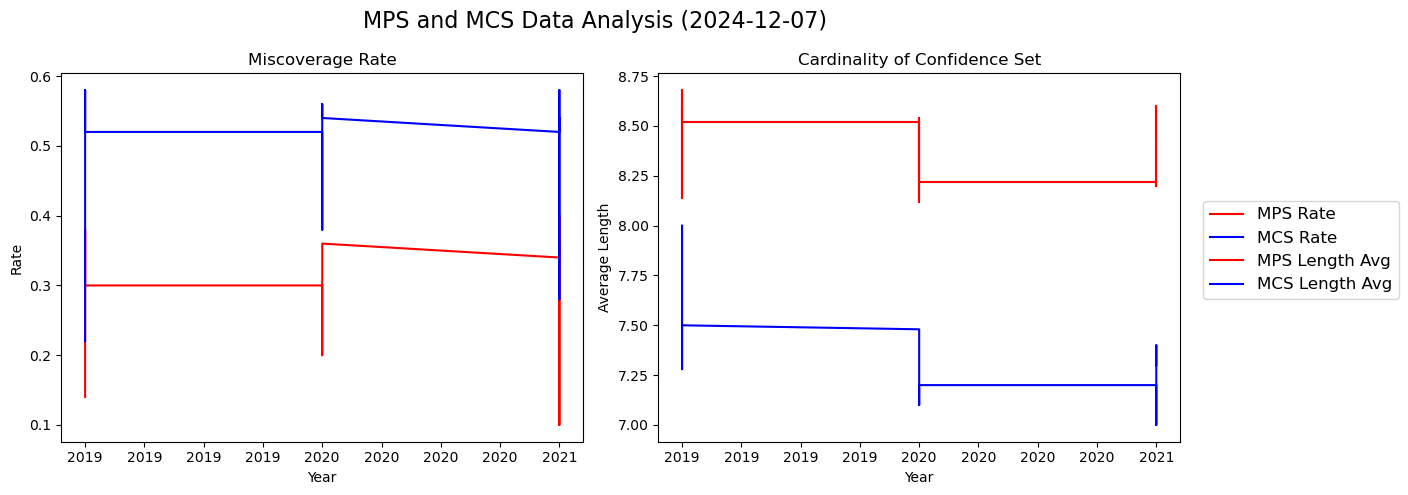

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('MPS_logs_2024_12_07_real_data.csv')

# Ensure the 'date' column is in datetime format
date = pd.to_datetime(NVDA['Price'])

# Initialize variables
df_MPS_rate = [df['mis_cover_rate'][0:50].mean()]
df_MCS_rate = [df['uncal_cover_rate'][0:50].mean()]
df_MPS_len = [len(df['MPS'][ind].strip("[]").split()) for ind in range(len(df))]
df_MCS_len = [len(df['uncal_MPS'][ind].strip("[]").split()) for ind in range(len(df))]
df_MPS_len_avg = [np.mean(df_MPS_len[0:50])]
df_MCS_len_avg = [np.mean(df_MCS_len[0:50])]

# Loop to calculate the moving averages
for ind in range(50, len(df)):
    df_MPS_rate += [df_MPS_rate[-1] + (df['mis_cover_rate'][ind] - df['mis_cover_rate'][ind - 50]) / 50]
    df_MCS_rate += [df_MCS_rate[-1] + (df['uncal_cover_rate'][ind] - df['uncal_cover_rate'][ind - 50]) / 50]
    df_MPS_len_avg += [df_MPS_len_avg[-1] + (df_MPS_len[ind] - df_MPS_len[ind - 50]) / 50]
    df_MCS_len_avg += [df_MCS_len_avg[-1] + (df_MCS_len[ind] - df_MCS_len[ind - 50]) / 50]

# Extract years from the 'date' column
df['year'] = date.dt.year

# Set x-axis values (use the 'year' column for x-axis)
x = df['year'][50:].values  # Start from index 50 to match the moving averages

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot MPS and MCS cover rates
line1 = axs[0].plot(x, np.array(df_MPS_rate[1:]), color='red', label='MPS Rate')
line2 = axs[0].plot(x, np.array(df_MCS_rate[1:]), color='blue', label='MCS Rate')

# Plot MPS and MCS lengths
line3 = axs[1].plot(x, np.array(df_MPS_len_avg[1:]), color='red', label='MPS Length Avg')
line4 = axs[1].plot(x, np.array(df_MCS_len_avg[1:]), color='blue', label='MCS Length Avg')

# Add titles for the subplots
axs[0].set_title('Miscoverage Rate')  # Title for the first subplot
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Rate')

axs[1].set_title('Cardinality of Confidence Set')  # Title for the second subplot
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Average Length')

# Add a common title for the entire figure
fig.suptitle('MPS and MCS Data Analysis (2024-12-07)', fontsize=16)

# Add a single legend for all lines in the right side of the figure
fig.legend([line1[0], line2[0], line3[0], line4[0]],  # Choose one line from each series for the legend
           ['MPS Rate', 'MCS Rate', 'MPS Length Avg', 'MCS Length Avg'],  # Labels
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Format x-axis to display only the year
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Year only on x-axis
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))  # Year only on x-axis

# Adjust layout to make space for the legend
plt.tight_layout()

# Display the plot
plt.show()

# Optionally save the figure
# fig.savefig('TAR.png')


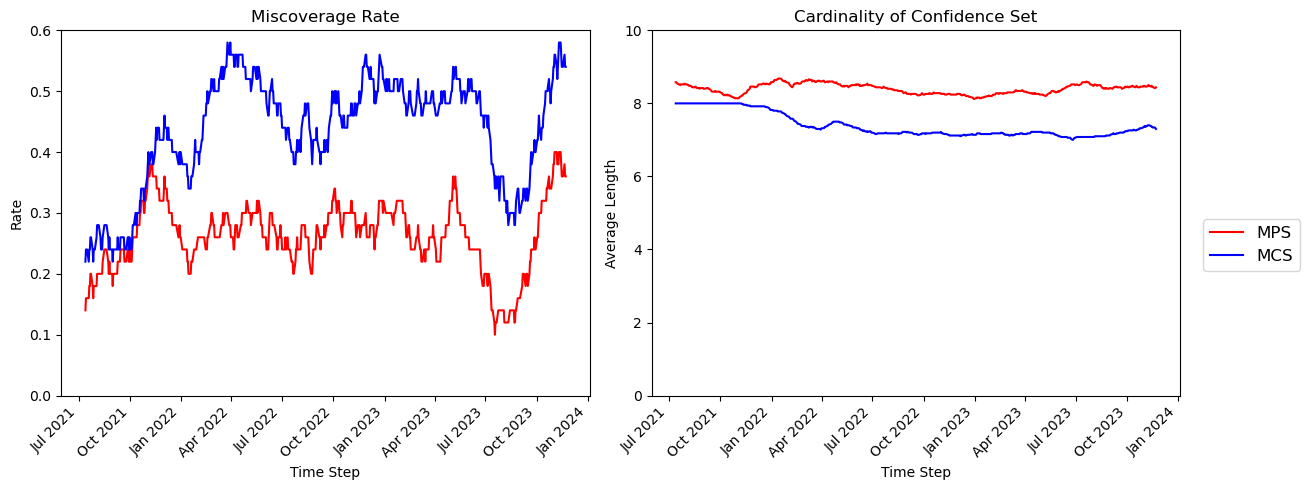

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read data
df = pd.read_csv('MPS_logs_2024_12_07_real_data.csv')
date = pd.to_datetime(NVDA['Price'])

# Initialize variables
df_MPS_rate = [df['mis_cover_rate'][0:50].mean()]
df_MCS_rate = [df['uncal_cover_rate'][0:50].mean()]
df_MPS_len = [len(df['MPS'][ind].strip("[]").split()) for ind in range(len(df))]
df_MCS_len = [len(df['uncal_MPS'][ind].strip("[]").split()) for ind in range(len(df))]
df_MPS_len_avg = [np.mean(df_MPS_len[0:50])]
df_MCS_len_avg = [np.mean(df_MCS_len[0:50])]

# Loop to calculate the moving averages
for ind in range(50, len(df)):
    df_MPS_rate += [df_MPS_rate[-1] + (df['mis_cover_rate'][ind] - df['mis_cover_rate'][ind - 50]) / 50]
    df_MCS_rate += [df_MCS_rate[-1] + (df['uncal_cover_rate'][ind] - df['uncal_cover_rate'][ind - 50]) / 50]
    df_MPS_len_avg += [df_MPS_len_avg[-1] + (df_MPS_len[ind] - df_MPS_len[ind - 50]) / 50]
    df_MCS_len_avg += [df_MCS_len_avg[-1] + (df_MCS_len[ind] - df_MCS_len[ind - 50]) / 50]

# Set x-axis values
#x = np.arange(50, len(df))
x = date[-len(df)+25:-25]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot MPS and MCS cover rates
line1 = axs[0].plot(x, np.array(df_MPS_rate[1:]), color='red', label='MPS Rate')
line2 = axs[0].plot(x, np.array(df_MCS_rate[1:]), color='blue', label='MCS Rate')

# Plot MPS and MCS lengths
line3 = axs[1].plot(x, np.array(df_MPS_len_avg[1:]), color='red', label='MPS Length Avg')
line4 = axs[1].plot(x, np.array(df_MCS_len_avg[1:]), color='blue', label='MCS Length Avg')

# Add titles for the subplots
axs[0].set_title('Miscoverage Rate')  # Title for the first subplot
axs[0].set_xlabel('Time Step')
axs[0].set_ylabel('Rate')
fmt = mdates.DateFormatter('%b %Y')
axs[0].xaxis.set_major_formatter(fmt)
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right")
axs[0].set_ylim([0, 0.6])
#axs[0].set_xticks(date.dt.year)
#axs[0].set_xticklabels(date.dt.year, rotation=45)

axs[1].set_title('Cardinality of Confidence Set')  # Title for the second subplot
axs[1].set_xlabel('Time Step')
axs[1].set_ylabel('Average Length')
axs[1].xaxis.set_major_formatter(fmt)
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right")
axs[1].set_ylim([0, 10])

# Add a common title for the entire figure
#fig.suptitle('MPS and MCS Data Analysis (2024-12-07)', fontsize=16)

# Add a single legend for all lines in the right side of the figure
fig.legend([line1[0], line2[0]],  # Choose one line from each series for the legend
           ['MPS', 'MCS'],  # Labels
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Adjust layout to make space for the legend
plt.tight_layout()

# Display the plot
plt.show()

# Optionally save the figure
fig.savefig('NVDA_2024_12_08.png')


In [216]:
date.dt.year

2       2019
3       2019
4       2019
5       2019
6       2019
        ... 
1255    2023
1256    2023
1257    2023
1258    2023
1259    2023
Name: Price, Length: 1258, dtype: int32

In [210]:
np.array(df_MPS_rate[1:]).shape

(597,)

In [148]:
Loss_nn = pd.read_csv('Loss_matrix_py.csv')

In [152]:
Loss_matrix.shape

(2294, 10)

In [121]:
t=100
errors = []
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [122]:
rf_model.fit(x_train[:t, :], y_train[:t])

RandomForestRegressor(random_state=42)

In [123]:
errors += [(rf_model.predict(x_train[t:t+1, :])[0]-y_train[t])**2]

In [124]:
NN = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_dim=x_train.shape[1]),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
NN.compile(optimizer='adam', loss='mean_squared_error')
NN.fit(x_train[:t, :], y_train[:t], epochs=3)
errors += [(NN.predict(x_train[[t-1], :])[0][0] - y_train[t])**2]

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 1.0263
Epoch 2/3


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.8618
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.8353
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [128]:
LSTM_mod = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dense(units=1)
])
LSTM_mod.compile(optimizer='adam', loss='mean_squared_error')
LSTM_mod.fit(x_train[:t, :], y_train[:t], epochs=3)
errors += [(LSTM_mod.predict(x_train[[t-1], :])[0][0] - y_train[t])**2]

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6863  
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6857
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7183
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [129]:
errors

[0.031175297274147126,
 0.7257866939846029,
 0.2110414374978454,
 0.15274467028326133]

In [120]:
NN.predict(x_train[[t-1], :])[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0.47538576

In [88]:
x_train_LSTM = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
LSTM_mod = Sequential()
LSTM_mod.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
LSTM_mod.add(Dense(units=1))
LSTM_mod.compile(optimizer='adam', loss='mean_squared_error')


In [93]:
LSTM_mod = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)),
    tf.keras.layers.Dense(units=1)
])

In [133]:
Transformer = build_decoder_only_transformer(input_shape=(10, 1))
Transformer.compile(optimizer='adam', loss='mse', metrics=['mae'])
Transformer.fit(x_train[:t, :], y_train[:t], epochs=3, batch_size=32)
forecast(Transformer, x_train[t, :], n_steps=1)[0][0][0]

Epoch 1/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4854 - mae: 1.3352
Epoch 2/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9436 - mae: 0.7593
Epoch 3/3
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9033 - mae: 0.7288


In [137]:
forecast(Transformer, x_train[t, :], n_steps=1)[0][0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


0.034760844

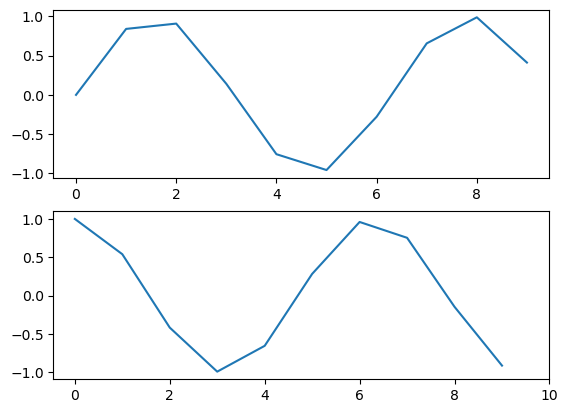

In [213]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.arange(0, 10)
y1 = np.sin(x)
y2 = np.cos(x)

# Create subplots
fig, axs = plt.subplots(2, 1)

# Plot the data
axs[0].plot(x, y1)
axs[1].plot(x, y2)

# Set the x-ticks for the second subplot
axs[1].set_xticks([0, 2, 4, 6, 8, 10])

# Show the plot
plt.show()

In [142]:
pd.DataFrame({ k:[v] for (k,v) in zip(column_names, errors)}, index=None)

RF       NN     LSTM  Transformer
0  0.031175  1.37878  0.11563     0.002195